In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

In [2]:
# J’importe le fichier en groupant Date et Heure pour en faire une donnée Datetime
elec = pd.read_csv('..\CSV\eco2mix-regional-cons-def.csv', sep = ';', usecols = [0, 1, 3, 4, 6,7, 8, 9, 10, 11, 12, 13,14],
                   parse_dates = {'Date_Heure': ['Date', 'Heure'] })

In [3]:
elec[12:].head(20)

,Date_Heure,Code INSEE région,Région,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW)
12,2013-01-01 00:30:00,52,Pays de la Loire,3595.0,127.0,NaN,182.0,0.0,0.0,NaN,32.0,3252.0
13,2013-01-01 00:30:00,75,Nouvelle-Aquitaine,5464.0,240.0,4993.0,175.0,0.0,427.0,NaN,142.0,-518.0
14,2013-01-01 00:30:00,44,Grand Est,4943.0,319.0,9137.0,1109.0,0.0,1418.0,0.0,57.0,-7102.0
15,2013-01-01 00:30:00,27,Bourgogne-Franche-Comté,2357.0,236.0,NaN,106.0,0.0,105.0,0.0,12.0,1894.0
16,2013-01-01 00:30:00,76,Occitanie,5228.0,78.0,2497.0,367.0,0.0,943.0,-13.0,81.0,1273.0
17,2013-01-01 00:30:00,11,Île-de-France,9134.0,685.0,NaN,16.0,0.0,0.0,NaN,142.0,8289.0
18,2013-01-01 00:30:00,84,Auvergne-Rhône-Alpes,8173.0,252.0,12069.0,257.0,0.0,3079.0,-4.0,68.0,-7551.0
19,2013-01-01 00:30:00,53,Bretagne,3050.0,58.0,NaN,107.0,0.0,86.0,-1.0,20.0,2779.0
20,2013-01-01 00:30:00,93,Provence-Alpes-Côte d'Azur,5570.0,537.0,NaN,12.0,0.0,1412.0,0.0,58.0,3548.0
21,2013-01-01 00:30:00,28,Normandie,3683.0,432.0,8200.0,216.0,0.0,12.0,NaN,54.0,-5233.0


In [4]:
# Je change les noms des colonnes pour qu’ils soient facilement manipulables
elec = elec.rename({'Consommation (MW)': 'cons',
            'Thermique (MW)': 'therm',
            'Nucléaire (MW)': 'nucl',
            'Eolien (MW)': 'eol',
             'Solaire (MW)': 'sol',
             'Hydraulique (MW)' : 'hydrau',
            'Pompage (MW)': 'pomp',
            'Bioénergies (MW)': 'bio',
            'Ech. physiques (MW)': 'ech',
            'Code INSEE région': 'code', 'Région': 'reg'},
                   axis = 'columns')

In [14]:
elec.tail()

,Date_Heure,code,reg,cons,therm,nucl,eol,sol,hydrau,pomp,bio,ech
1875451,2021-11-30 23:30:00,27,Bourgogne-Franche-Comté,3120.0,173.0,NaN,635.0,0.0,32.0,0.0,47.0,2234.0
1875452,2021-11-30 23:30:00,24,Centre-Val de Loire,2912.0,83.0,7831.0,1022.0,0.0,1.0,NaN,53.0,-6079.0
1875453,2021-11-30 23:30:00,93,Provence-Alpes-Côte d'Azur,6663.0,1486.0,NaN,35.0,0.0,544.0,0.0,89.0,4510.0
1875454,2021-11-30 23:30:00,53,Bretagne,3208.0,275.0,NaN,672.0,0.0,90.0,-1.0,50.0,2122.0
1875455,2021-11-30 23:30:00,28,Normandie,3747.0,374.0,7498.0,755.0,0.0,2.0,NaN,84.0,-4966.0


In [5]:
# Je crée un DataFrame qui groupe les données par mois, la consommation est moyennée
# J’utilise pd.Grouper parce que l’information qui concerne la date n’est pas sur l’index, je ne peux pas utiliser .resample()
elec_mois = elec.groupby( ['reg', pd.Grouper(key = 'Date_Heure', freq = 'M')]).agg({'cons': 'mean'})

In [6]:
elec_mois

cons
reg                  Date_Heure              
Auvergne-Rhône-Alpes 2013-01-31   9721.351042
                     2013-02-28  10122.952381
                     2013-03-31   8933.862903
                     2013-04-30   7590.017361
                     2013-05-31   6886.875000
...                                       ...
Île-de-France        2021-07-31   5904.016801
                     2021-08-31   5366.420699
                     2021-09-30   6301.477778
                     2021-10-31   7357.659274
                     2021-11-30   9353.977778

[1284 rows x 1 columns]

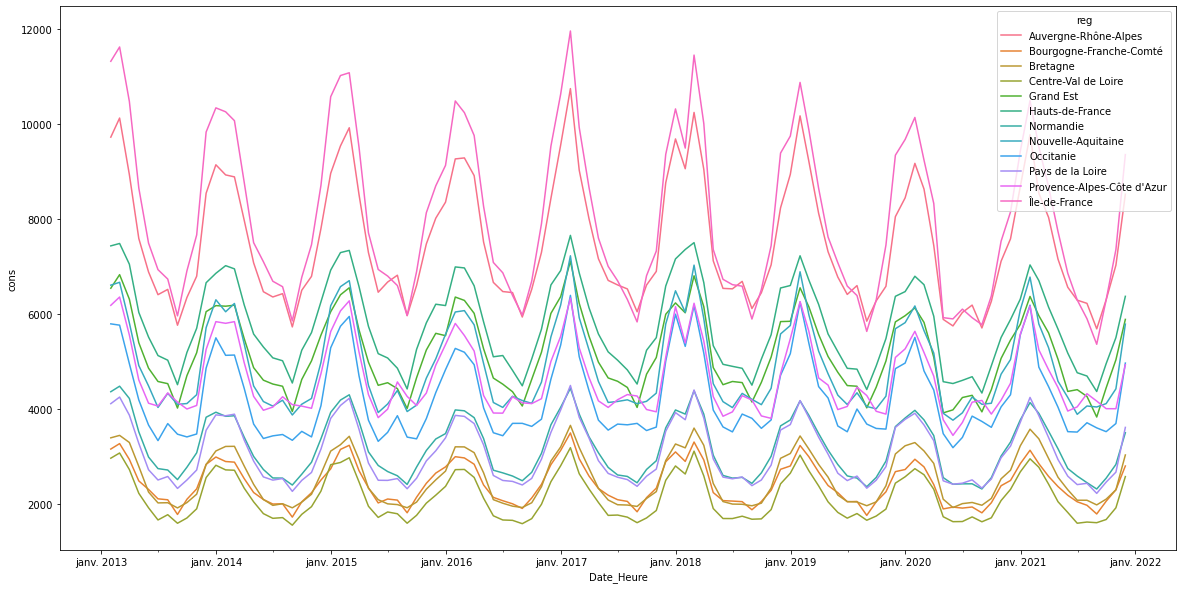

In [7]:
# J’importe la locale pour avoir les dates en français
import locale
locale.setlocale(locale.LC_ALL, 'fr_FR')

# Je trace le graphique de la consommation “région par région”
fig = plt.figure(figsize = (20, 10))
ax = fig.add_subplot(111)
sns.lineplot(x = 'Date_Heure', y = 'cons', hue = 'reg', data = elec_mois, ax = ax)
date_form = DateFormatter('%b %Y')
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonth = [7]))

In [ ]:
# On constate que quelque soit la région les courbes se ressemblent,
# bien qu’à des niveaux différents et des amplitudes différentes

(18597.0, 18961.0)

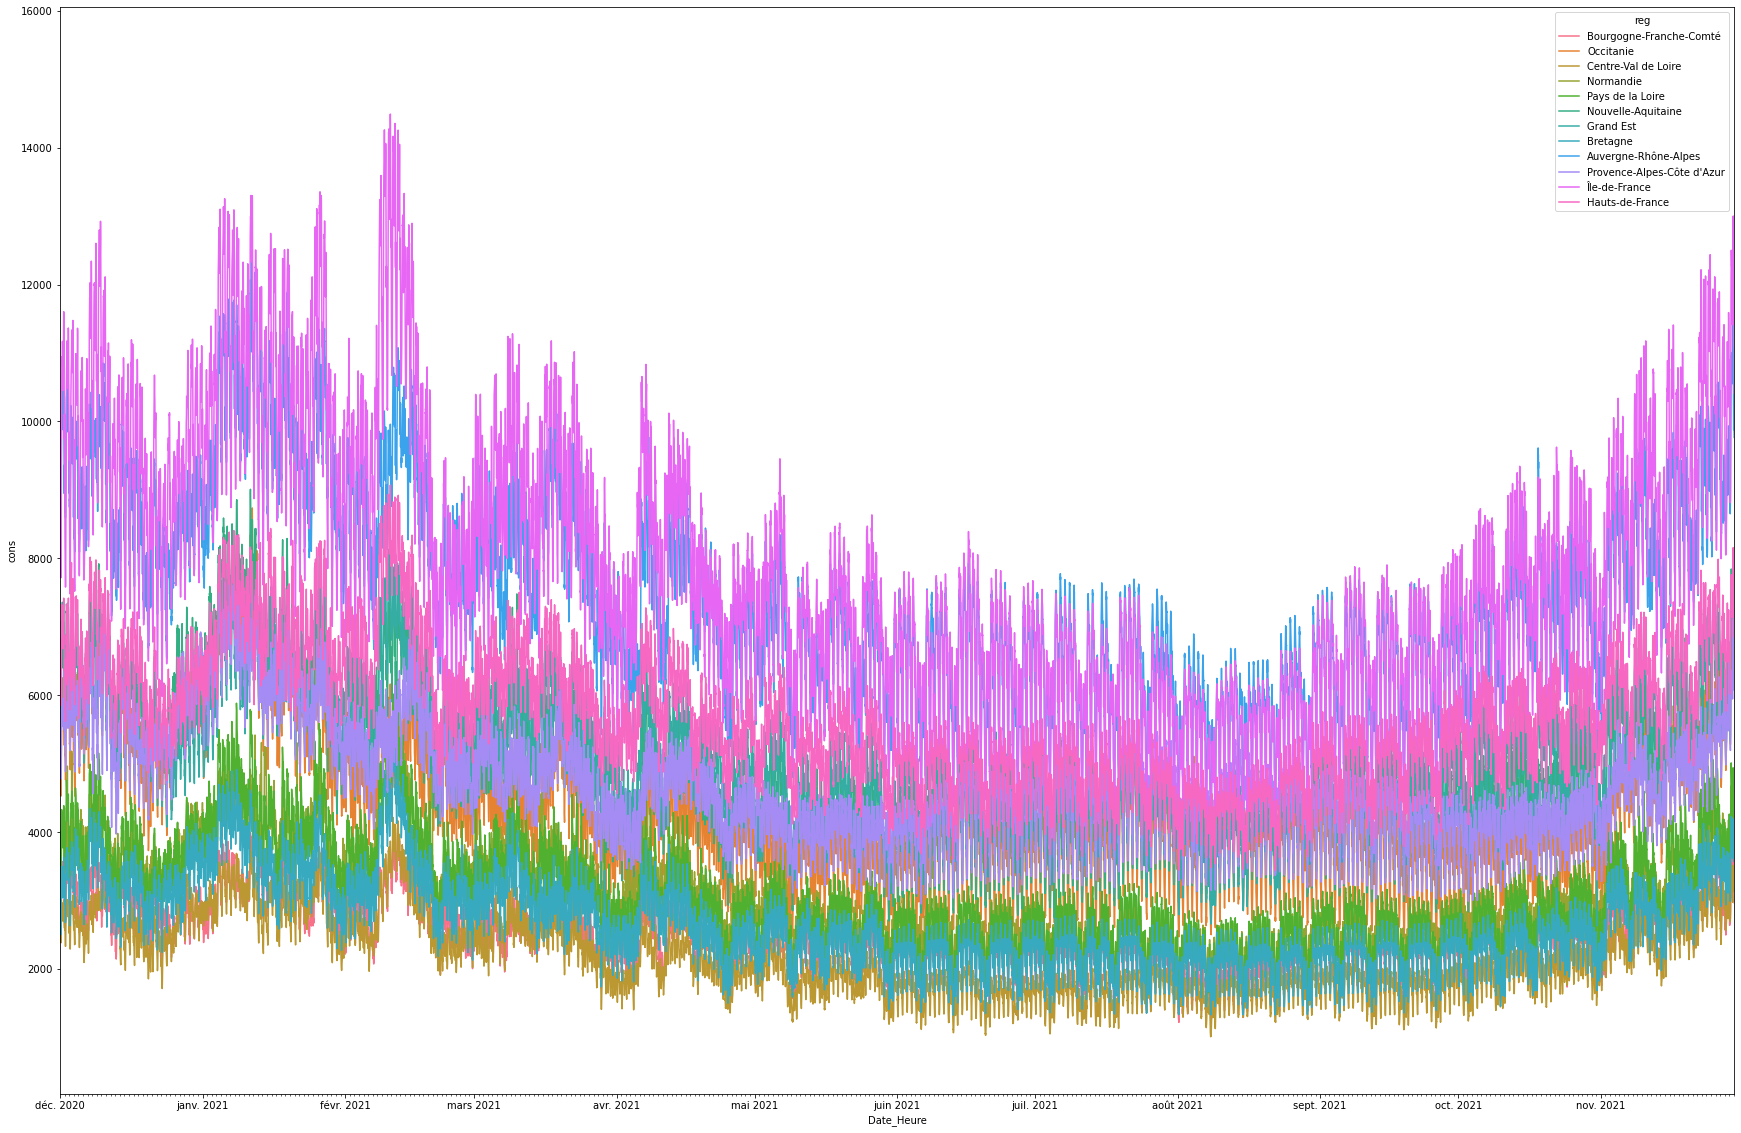

In [27]:
# Je trace le graphique de la consommation “région par région” et par jour
elec_jour = elec.groupby(['reg', pd.Grouper(key = 'Date_Heure', freq = 'D')])['cons'].mean()
fig = plt.figure(figsize = (30, 20))
ax = fig.add_subplot(111)

sns.lineplot(x = 'Date_Heure', y = 'cons', hue = 'reg', data = elec, ax = ax)
date_form = DateFormatter('%b %Y')
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_minor_locator(mdates.DayLocator(interval = 1))
dd = dt.datetime(2020, 12, 1)
df = dt.datetime(2021, 11, 30)
ax.set_xlim([dd, df])

In [11]:
# Maintenant, je fais la somme de toutes les productions (en puissance) (les Nans sont considérés comme des 0)
elec['prod'] = elec[['therm', 'nucl', 'eol', 'sol', 'hydrau', 'pomp', 'bio' ]].sum(axis = 1)

In [13]:
# Je fais également la somme de la production de la région et des échanges d’énergie avec l’extérieur (en puissance)
elec['prod+ech'] = elec[['prod', 'ech']].sum(axis = 1)

In [14]:
# Contrairement au DataFrame elec_mois où j’ai fait une moyenne de la consommation, j’ai fait une somme…
# Je n’obtiens pas de MWH puisque les mesures sont faites toutes les demi-heures mais des MW x 1/2 heure.
# Pour avoir des MWH, il faudrait diviser par 2…
elec_nat = elec.groupby('Date_Heure')[['cons', 'prod', 'prod+ech']].sum()

In [17]:
# Je rééchantillonne au niveau du mois pour ne pas avoir un graphique “trop dense”…
# La donnée temps est en index, je peux utiliser la méthode resample()
elec_nat_mois = elec_nat.resample('M')[['cons', 'prod', 'prod+ech']].sum()

In [18]:
# Somme des puissances mobilisées au niveau national par mois
elec_nat_mois

,cons,prod,prod+ech
Date_Heure,,,
2013-01-31,106515355.0,113690823.0,106461079.0
2013-02-28,98659091.0,103095261.0,98609076.0
2013-03-31,98492373.0,102154088.0,98432845.0
2013-04-30,80269032.0,86822966.0,80211963.0
2013-05-31,73323639.0,85065702.0,73269280.0
...,...,...,...
2021-07-31,65195587.0,79890110.0,65207164.0
2021-08-31,61096040.0,76462798.0,61116880.0
2021-09-30,64161277.0,75806594.0,64190552.0


In [ ]:
# On constate que la consommation est sensiblement égale à la production plus les échanges

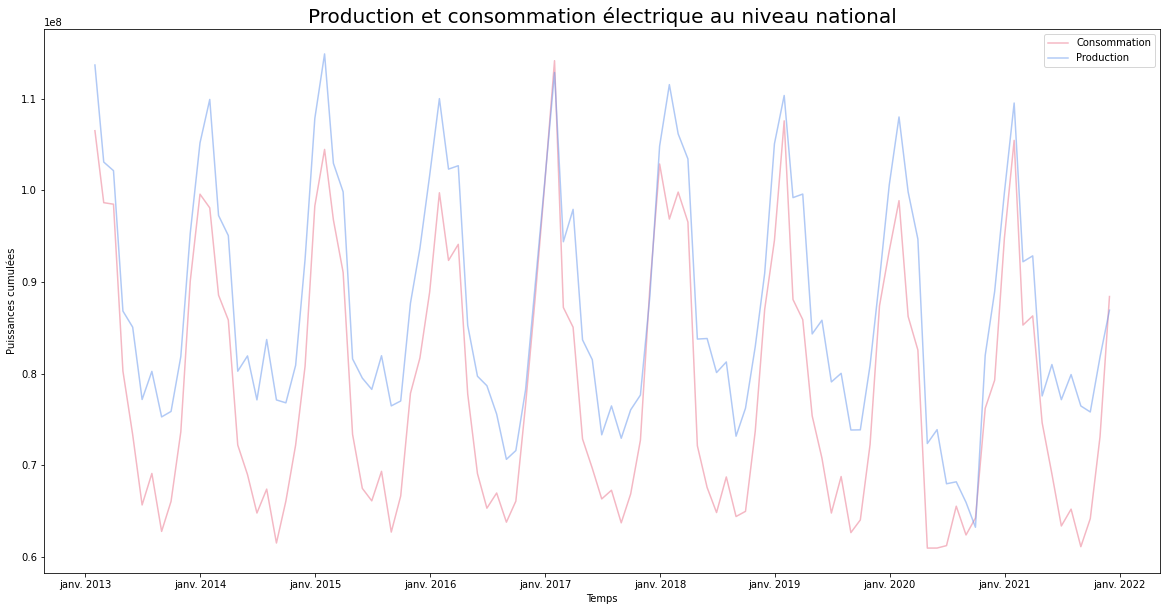

In [19]:
# Je trace les courbes de la production et la consommation
# Quand je trace les courbes de la consommation et de la somme de la “production + échange”, on ne voit qu’une seule courbe
fig = plt.figure(figsize = (20, 10))
ax = fig.add_subplot(111)
date_form = DateFormatter('%b %Y')data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABI8AAAJjCAYAAACFozHBAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjQuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8rg+JYAAAACXBIWXMAAAsTAAALEwEAmpwYAAEAAElEQVR4nOz9eZgs51nej99PLV3ds5xFR9KRZFmWvMmbFtvCOGCDbANxAIc9bAGMCQkQ4xgSs31NMMkvjgPha2LCHsDmGxMcDCYkYQcLYwwYyZaFbMvyJtmyrCPprDPdXfvz++Otqunpqe6uqu6erj66P9d1rjnTa02/XVVv3e/93I+oKgghhBBCCCGEEEIIKcNa9QYQQgghhBBCCCGEkPZC8YgQQgghhBBCCCGETITiESGEEEIIIYQQQgiZCMUjQgghhBBCCCGEEDIRikeEEEIIIYQQQgghZCIUjwghhBBCCCGEEELIRCgeEUIIIYSsABG5SkQ+KyIfEJFjq94eQgghhJBJUDwihJBDQkSuFREVkTeveltGybbptlVvByGLQkRenn2vX77qbZmEiHQAvB3AEMBLVfXc2P2tPF7MgseT1cDPfTWIyG0ioqvejiqIyH0ict+qt4MQsr5QPCKEXHRkk+jRf4mIPCoify4i37zq7TtsHgsTxnWawJP5EZFbs337daveljn4GQDXAfhiVf3sqjcGuGg+V0IWhoi8Odsnrl31thBCyKpxVr0BhBCyRH48++kCuB7AVwJ4kYg8V1W/f2Vb1T6eDmCw6o0gZIG8A8DfAGiFKDOOiFwB4EEAX6KqH1/19iwYHk9WAz/31fCtADZWvRGEEHIYUDwihFy0qOrrRn8XkZcA+BMArxaRN6nqfavYrrahqvesehsIWSSqeh7A+VVvxyRU9SHsidsXFTyerAZ+7qtBVT+16m0ghJDDgmVrhJDHDKr6ZwDuASAAPgcAROR1mSX9VhH5JhH5WxHZHS3zEpErReRns/KvUEQeEZHfEZHnlr2PiGyLyP8rIg+IiC8i94jI92PCMXdaydW07BYRuVpE3iQiH83e54yIvFdEfjS7/9bsdZ8A4AljpXxvHnmd0qwMETkqIv9RRD6Svf5ZEfkjEfmikscW5S4icrOI/F8ROSciAxH5CxH5vLK/bxoi8rki8nYReSj73D8tIr8oIleNPOba7G/8wpG/RSf9TRPexxaR7xKRvxKR8yIyFJGPich/E5GnHOZnkn13flRE7haRCyKyIyIfF5G3lX3fROSfiMi7Rrb770Xkh0XEK3nsfdm/LRF5Y/Z5DkXkThH5yuwxjoj8yMh36uMi8soZf9stIvKH2TacFZHfFpHHZ497ooj8ZrbPDEXknSJyU8nrPVVE3iAit2ePDUTkfhH5JRG5euyxbwbwzuzXHxsb81uzx0zbb56bbePDI+/zcyJyZclji5IVEfkX2efri8ipbNuOjj9nGtnn+z0i8jfZ+A5E5P0i8koRqTwnE5GNbJzvFJG+mGPWX4vIN055zpeIyP8e+bs/LSL/K//u1v1cReSlYo5d52Xk+CWTjycnReRXss8u/959m0wolZMp5bYyctwuue9p2bh9Ovs7T4nIb4jI9dM+07HX6GRj8vvZ9yMQc3z9UxH5RxOeM/GYIzVLn7LPVWX//piP2X8Sk5c19f3FHCtVRP7xhPd4fnb/b43dXvm7taaf01eKyH8XkXtH/r47RORV4/tg9r3+tuzXT47sD/eNb0PJ+1hizit/l71HP/v/d4+/z+jnIiKXijm2fDb7Wz4oIt9e8vjanz0hhMwLnUeEkMcakv0cn+z9awBfDOB/w1xAHQUAEbkOwLsBXAXgzwH8DwCPB/B1AL5MRL5GVf9P8eLmov3PYMSpDwB4K4BjAH4UmcCxkD9C5BYAfwTgEgDvAvA7MNb5ZwB4HYB/D+A+GHfDq7On/fTIS9w54/WPAfir7PX+LnvupQD+CYA/FpHvVtVfLHnqLQB+AMBfA/hvAK4B8DUA/kxEblbVj1T8+74dwC8DCAD8HoBPA3gKgH8G4GUi8vxsxfdc9je+HEYkG3Vz3FfhfToA/i+AL8re4zcAXABwLYCvghn7j2aPPYYlfiYiIgD+EMDnjTw2hvm+3QrgLwHcMbLtrwfwwwAezbZ7F8A/AvB6AP9QRL5YVaOxbXFh3HeXAPhfADoAvhHAb4vIlwD4HgCfC+APYD77rwPwMyLyiKq+reRv+xwAPwjgL2DG6wYAXw3ghuyi9d0wgu2vw4zPVwP4ExF5oqrujrzOVwP4Lph97z0AQgDPxN5436Kqn8ke+7vZz2/L3ve2kde5r2QbC0TkywH8Nsxx4O0A7gfwXADfDeArROTzJzgSfwLAP4Q5PvwxgBcB+E4ATwbw4mnvOfLebvb8fwjgIzBj5mev9TMwn/u3VHidYzDHomcDeB+AX4URpv8hgN8QkWeq6mvHnvPjAP4tzHfkd2G+61fBfNf+KYA/Rb3P9WsBvBTme/ILMPvLtG0+ATOuT4T5TrwbwJXZc/941t9cFRF5KcyxMP+sPwbgapjv15eJyItU9X0VXuoSAP8l2+Y/AfBItr0vA/D7IvKdqvrfFrXdU/gNAC+E+ZwvAPhSmGPJ5QAOCApjvBnAP4cZz98ruf9bs59vyW9o8N1ax8/pDQBSAH8L4DMw5/oXw/wdn4P9++CPw5S735Tdfy67/Rxm8/8B+CaYfe2/wcw5vgrAzwF4AYCy/MVjMOeYEOb41IXZ135VRFJVfcvIY9vy2RNCHkuoKv/xH//x30X1D2aSpiW3fxHMpDEF8ITsttdlj+8DeHbJc/4ou///Gbv982Au7E8D2Bq5/Ueyx/82AGvk9usAnMnue/PYa91Wtr3ZfS/PnvPykds6AD6Z3f5NJc95/Njv9wG4b8bnddvYbb+Y3f6LAGTk9qfAlAMFAK4duf3W/HMf3dbsvn+R3f5zFcfvqTCT548BeNzYfS8GkAB4R9XPcMZ7vT7btt8D4I3d5wG47LA+ExjhRcf/tuw+C8Dxkd//QfbYTwG4YuR2B+aiWQH8SMn3QLP7vZHbX5jdfgZGFDs2ct8Ts7F4/9hrjf5t3zx236+MvN74fvOj2X3/auz2x41//tntX5KN989PeP/X1dhvtmCEtgTAC8ce/4PZ4/947PY3j3zO14x9zu/K7ntexe/a67LH/wwAe+R2e+Qz+4qR269F+fEi36YfGLu9CyM+pgBuHvsMFcAnMLY/Zfdf3eBzTWE6xFU9nvxSdvsbx26/BUBU9p6Yctwa+SxvHbntOICz2Rg/Y+zxz4QRzt5Xcay80c9l5PajAO7Ovtu9WX93yZhdW/H9b8sefweAS0Zu34Q5LiYY2e+nfO4fgTkunSj5+84AOAXAmeO7tY6f05NKXseCEdEUwOfW2SaUnHtgBHmFEeC2xrbrdpScu7F3PP1v2H98eAbMXONDC/iO3ocpcwH+4z/+479Z/1i2Rgi5aBFT2vA6EfkPIvJ2mMmvAPhpVb1/7OG/pKrvH3v+1TAXXp+CcR4UqOp7YFxIl8Csaud8O8wE+wdUNR15/CcBvGkxfxleBnNh+Xuq+hvjd6rqp+d58cwh8U9hLrZ+WFV15LU/CvN3dLC3cj3KX6nqm8du+1WYye/zKm7Cd8M4B/6V7rlN8vf/cxih52Uisl3x9UoRERvGaTME8F2qGoy9V6Cqj2SPPczPZDh+g6qmqnp25KZXZD//f2ryc/LHxTAuuhTGtVPGq0f/VlX9Sxgx8jiAH9SRlvGq+gmYlfAbss9rnHer6lvHbstXx8/DrPKP8uvZz5vH/r7PjH/+2e1/DOCDMM6HefkKACcAvC37m0f5KZgLqy8WkWtKnvvvdCTbJPucfy37deb3OitTeSWAhwB8n6omI6+VwIyZotyNMPo6J2C+h7er6vgxyYcRwQTG8ZDzvdnPfz2+P2XPe2DW9pfwv1T1D6s8MNt3vhnADozoM/ret8O4MxfBt8I4N35MVT809j4fhHHGPVtEnjHrhbJ9/8DnoiZL61dh9pXPWcRGz+AHVfXMyPv3YT4vC0Z4m8VbYI5L3zB2+8tg/oa3Zt/lRt+tdfyctCSgPjtX/5fs10Uca/Lj8w/piMMy264fzH4tOz4PAHz/2PHhQzDH4KePnvNa9NkTQh5DsGyNEHIx82PZT4Wxmf8lgF9R1f9e8tj3ltz27OznX+rB8h/A2Pv/afa4X88mdk8G8OmyCSrMCuWPldxel+dnP/9gAa9VxtNgSuD+anRCPsKfA3gt9j6fUW4fv0FVIxE5BTOZrcI/yH5+oYiUTX4vh3FrPBUjZVwNeBrMKu3fquqDFR677M/kQzDlhN8oIk+AKSt7N8zFXDj2Es8Zed/x175XRB4AcJ2IHBsVgwCcm/DdfBDGHVf2eX4G5vO+Ivv/1L8tey0AuHP0ImjktQBTSlSQlex9M4yz5SaYz2VUrBr/+5sw7TOLReRdMKLss2EE41HK/s5cpK3yvX4qjHD1UQCvNX/uAYYwHbOm8Tkwn8uBjKAMN/s5+jrPhzkGVhJ7KlJ2vJxEvu/8ZXZhO85t2MuVmYf8uHHThM/mqdnPp8Psa1MRkWcCeA2AL4ApB+qOPeRxzTazFvN+734dpoT52wD87Mjt+ec9WgbV5Lu1dp9TJpK9Bqa07YkwbqBRFrG9z4ER8G8rue8vYBxRZeeKj6rqhZLb87/lGIwIC6A1nz0h5DEExSNCyEWLqpZeoU3goZLbjmY/J7X7zm8/Nvb4UzXeown5+x1wESyIun/3KOcmPCfGfjFgGieyn6+Z8bitiq83iWPZzyqf49I/E1VNROTFMNk0XwvgP2V37YjIW2AcT/kqdpXtuSZ73Oj7T+pAFmfbUHZ/nP10S+6b9vgD92UiTdlr/b8w2VyfhSkV/Qz2HFgvh8lLmpdFj2H+d1b5Xuff6adguoA86zudv87nYLqrYPR1jgE4q6oHHG1zUOdYdljHxfyz+c4Zj5t53BCR58OIjA5Mht3vwWTppDCuua+AKRtaKmPCb07l752qPiAifwbjqHu6qn5YRC6Hyau6U1U/MPLw2t+tdfucskynv4MRyt8LI66dyR57DMC/wmK29yiAMyWif34MfBRmEWSccxNer+xvacVnTwh5bLGW4pGI/CqALwfwsKo+a8Zjr4FZWTkGc9D9IVX9/aVvJCFk3dCS2/KL3ysmPOfKscflP09OePyk10kB04kpLyEY4VjJ489lP5e1qlj3717W+x+dsAq7KM5lP6t8jofymWSlad8H4PtE5MkwIev/Aqbk6Rj2wlxHt6fMSbTsMVoY2cXsq2ByOj5PVXfG7p/YQawmq/xe56/5DlX96qmPrPY6b1TV76/4nHMATohIb4ECUtnxchLzHBcPdMvKODblfW5S1buqbdpEXgugB+BFqnrb6B0i8sMwF+bjKCbPq4/NuT3z8BaYZhDfBuCHYBx+Dva7joBm3611+5z+GYxw9OOq+rrRO0TkH8CIR4vgPIBLRMQddy2LiAPTaGHec1uTz54QQuZiXTOP3gyzalKF1wL4n6r6bJia759b1kYRQi468gykF2QTvnFelP18HwBkF70fA/A4EXlSyeNvnfA+eZbN40vuK8u1+JvsZ9V2vAmqu34AE7I6AHCziJSVRuz7u5dA/ve9sMZzEqDIMarKPTAX1jeKyFUzHnvon4mqfkxVfwVGQNrF/ouB/Lt56/jzMtHpagCfnLAi3zaeCDMf+eMS4ejq7P5x8nK4OuM97TNzYDogAcv5XufftednGUBNeS+MqFJn3/gbmKyaKvOmJp/rLO7B3r5ztOT+Wyc87yyAkxM+r2nHxTqfzSSeDOMcua3kvi+c8JyzKDmGZ8ekmxewTU35HRih4p9m2VvfBuNkGc/La/LdWrfP6cnZz98uuW/S9jY91lgw5WTjfEH2WvMeZ5p89oQQMhdrKR6p6rtgbKYFIvIkEflDEblDRP5SRJ6WPxzAkez/R7GXxUAIIVPJwij/BCYH5dWj94nI58IEh54F8I6Ru34N5tj6n7KJev7462DcFWXk+SH7yi1E5CUwXVvG+d8w4b7/uMyVISLjTprTAC4Tkd6E999HZrV/K0x5wr8be+0nwfwdEUwr4mXwX7PXf6OIPHX8ThHpiMj4Bc7p7GdZ2HEpWR7Pz8Gs3v6CiOyz+Gfvc1n22KV/JiJyXZZhMc5xmPKDUdfIr2Y/X5tvY/YaNoD/DPMd/JWm23LI3Jf9fMGo+CciWzAhx2XCbe3xhmlFfwYmU+r5Y/e9Gkak+tPRYOxFkTkKfwbG3fSmsn1RRK6cFeasqg/DfA9vEZEfLRO1s/nQdSM3/Uz286dKjg3jx4smn+tUMufFWwFsYywwW0RuweSQ8PfCjP2+Vusi8nIAn1/y+F+DEeh+TEQOhJiLiCUit1bc7PtgnCM3jr3Gd2ByoPJ7AVwjIl8ydvtrsZiyy0ZkbrP/CeOw/D6YTLHfz75Lo49r8t26D+v1Od2X/bx19EYReTaAH57wnCb7RH58/o8isjHyPhvYayIw7/H5PtT/7AkhZC7WsmxtAr8E0y3no9lF3c/BtHR+HYA/FpHvhQnF+6LVbSIhZA35LphOJz+ZTXZvh1k1/TqYVdpvH3NL/BSArwTwNQDeJyJ/BCNcfz1Ma+9/XPIevwaT7/PDInITTJjrU2GcRe/IXqtAVUMR+ToAfwzgN0TkX8Csundhwkxfgv3H9z+DybD4wywUOADwAVX931P+7h+CWYF+ZRZa/U4Yq/0/gbkIfKWaDnILR1XvEZFXwEzAPygifwjgXpicnGuy7XoEJog3589gxuR3ROT3YYSW+1V1lpjz4wA+F6b70L0i8n9gAkkfD9Np7zUwbldg+Z/JTQDeISJ3wJRwPQjgMhjHkYu9DCSo6ntE5CcA/ACAu8V0E+zDfGeeBRO0/ZNzbMuhoaoPichvwriD7xSRP4bZZ74YgA8TIn7z2NM+ApOL9A0iEsIEXCuA/08PdlLM32c3+179FoC/EJHfyp73XJixfgimRHBZ/HuYMf4umG6Bf579DZfDZCF9PoD/B7PDnF+ZPf7fAfgWEXk3TJ7QVTD7/+fAiM6fBEzHOhH59wB+FMCHReR3YQJ4T8K4rf4GJlcKaPC5VuRHYI5Lr84Eo3fDCGlfD+D3UX5c/BkY4ejnMyH90zCf3+cB+D8w8QUFqnpaRL4W5pj5N1nWzwdhjtPXwARqn8DBUOEyfhrmAvzdIvI/YcqQboH5vN4Ok0k2zn/OnvO/RORtMELl58GUSd2GyQ6rw+AtMCVb/3Hk9zJqfbewfp/Tr8Mc039aRF4EE2D/FJjv0u/AfB/H+bPsOb+cHWd3YRoP/NdJb6KqvyEiXwFzbvhgts8pzNzgOpiKiHm7DP406n/2hBAyH6q6lv9gnAB3Z//fgrlQuHPk34ez+74fpj0tYCYOHwJgrXr7+Y//+G95/2AmaVrxsa/LHn/rlMc8DsDPA7gfpuvTozAuhs+Z8PgjMAHAn4G5+L0HphX3E7P3enPJc54JcxG1AzM5vQ3Gev7y7DkvL3nONTBC+Sez7ToN4G8B/D9jj9vMtv8BmHKFfduQ/X5byesfgxEsPgojOJ2DcWJ9Scljb81e53UTPpP7ANxXcxxvgBFu7s/e/wyMqPKLAF489lgbwOsBfALGAVT6N014Hwfmoum92Wffz/7mXwLw5MP6TGBKzV4PI1Y+lL3+AzBd9f7RhNf4BpgL8Z3su/ZBGAGiW2cMsu9b6T6TjYECuLbK3wZzfi79nk/6vsF04/oPMGWfPoxQ8LMwF/ul2wZzIftnMBdNKUb2Y0zfbz4HRmB4BGa/+RTM/nFVlb+96vhO+NsFJrfqz7LvcwhznHg3jMDy+CqfI0wW0CsBvCf7+4Ps7/gzGBfViZLnfClMx7Uz2eM/nX0O4/tSo8912vhmt18BIwg/gr0528tnfJdeACO6D2BKr/4vgBsx5bidfW7/FWYf9bPn3QPjCvzKGmP15TDC2g7Mfv7HMCVH075b/xhmgcGHOR7/JoybZuL3qMH+WPr+kz73kfs/mj3mNIDOlMfV+m6t4ef0DJhw6YdhjvV3wAhr12Ly/vb9AD6cfRaK/cft0m2AcX9+T/Z3DrJ/dwD4lyi5Dpk2fpM+l7qfPRqch/mP//iP/0b/iapiHRGRawH8H1V9logcAfARVb2y5HEfBPBSVf109vsnADxfx+y6hBBCCCHkcMlKyd6JkhBjQgghhLSHtcw8GkdNN55PZmUcEMNN2d2fgrFKQ0SeDmNXfmQlG0oIIYQQQgghhBCyZqyleCQi/wPAXwO4XkQeyMLhvhnAd4jIB2Bs+1+RPfxfA/jO7Pb/AWPhXE+7FSGEEEIIIYQQQsghs5aB2apa1n0IKGlDq6ofQnlXDkIIIYQQQgghhBAyg7XNPCKEEEIIIYQQQgghy2cty9YIIYQQQgghhBBCyOGwdmVrl156qV577bWr3gxCCCGEEEIIIYSQi4Y77rjjUVW9rOy+tROPrr32Wtx+++2r3gxCCCGEEEIIIYSQiwYRuX/SfSxbI4QQQgghhBBCCCEToXhECCGEEEIIIYQQQiZC8YgQQgghhBBCCCGETGTtMo8IIYQQQgghhBCyeqIowgMPPADf91e9KaQG3W4XV199NVzXrfwcikeEEEIIIYQQQgipzQMPPIDt7W1ce+21EJFVbw6pgKri9OnTeOCBB3DddddVfh7L1gghhBBCCCGEEFIb3/dx4sQJCkdrhIjgxIkTtd1iFI8IIYQQQgghhBDSCApH60eTMaN4RAghhBBCCCGEkLXloYcewjd8wzfgSU96Ep7xjGfgS7/0S3HvvfeuerPm5r777sNv/MZvFL/ffvvteNWrXrWSbaF4RAghhBBCCCGEkLVEVfFVX/VVuPXWW/Hxj38cH/rQh/D6178ep06dWvWmzc24eHTLLbfgTW9600q2heIRIYQQQgghhBBC1pJ3vvOdcF0X3/Vd31XcdvPNN+MFL3gBXvOa1+BZz3oWbrjhBrztbW8DANx222249dZb8bVf+7V42tOehm/+5m+GqgIAfuiHfgjPeMYzcOONN+Lf/Jt/AwC4//778ZKXvAQ33ngjXvKSl+BTn/oUAODlL385vvu7vxsvetGL8MQnPhF/8Rd/gVe84hV4+tOfjpe//OXFtmxtbeEHf/AH8dznPhdf9EVfhPe+97249dZb8cQnPhG/93u/B8CIRC984QvxnOc8B895znPwnve8p9iev/zLv8TNN9+MN77xjbjtttvw5V/+5QCAM2fO4Cu/8itx44034vnPfz7uuusuAMDrXvc6vOIVryjeY1FiE8UjQgghhBBCCCGErCV33303nvvc5x64/Xd+53dw55134gMf+AD+9E//FK95zWvw2c9+FgDw/ve/Hz/90z+ND33oQ/jEJz6Bv/qrv8KZM2fwjne8Ax/84Adx11134bWvfS0A4JWvfCW+9Vu/FXfddRe++Zu/eV/Z2NmzZ/Hnf/7neOMb34iXvexl+L7v+z588IMfxN///d/jzjvvBAD0+33ceuutuOOOO7C9vY3Xvva1+JM/+RO84x3vwL/9t/8WAHD55ZfjT/7kT/C+970Pb3vb24r3eMMb3oAXvvCFuPPOO/F93/d9+/6+H/uxH8Ozn/1s3HXXXXj961+Pb/3Wby3uu+eee/BHf/RHeO9734sf//EfRxRFc3/OztyvQAghhBBCCCGEkMc04T2fRHphd6GvaR3ZQudp1dvJj/Lud78b3/iN3wjbtnHy5El84Rd+If7u7/4OR44cwfOe9zxcffXVAIxL6b777sPzn/98dLtd/LN/9s/wZV/2ZYXD56//+q/xO7/zOwCAb/mWb8EP/MAPFO/xspe9DCKCG264ASdPnsQNN9wAAHjmM5+J++67DzfffDM6nQ5e+tKXAgBuuOEGeJ4H13Vxww034L777gMARFGEV77ylbjzzjth23alvKZ3v/vd+O3f/m0AwItf/GKcPn0a58+fBwB82Zd9GTzPg+d5uPzyy3Hq1Kni720KnUeEEEIIIYQQQghZS575zGfijjvuOHB7XopWhud5xf9t20Ycx3AcB+9973vxNV/zNfjd3/3dQvAZZ7RTWf46lmXte03LshDHMQDAdd3iOaOPG33MG9/4Rpw8eRIf+MAHcPvttyMMw5l/d9nfl79P2d83L3QeEUIIIYQQQgghZC6aOoTm5cUvfjF+5Ed+BL/8y7+M7/zO7wQA/N3f/R2OHz+Ot73tbfi2b/s2nDlzBu9617vwkz/5k7jnnntKX2d3dxeDwQBf+qVfiuc///l48pOfDAD4vM/7PPzmb/4mvuVbvgVvfetb8YIXvGDhf8P58+dx9dVXw7IsvOUtb0GSJACA7e1t7OzslD7nC77gC/DWt74VP/qjP4rbbrsNl156KY4cObLwbcuheEQIIYQQQgghhJC1RETwjne8A69+9avxhje8Ad1uF9deey1++qd/Gru7u7jpppsgIviJn/gJXHHFFRPFo52dHXzFV3wFfN+HquKNb3wjAOBNb3oTXvGKV+Anf/Incdlll+HXfu3XFv43fM/3fA++5mu+Br/1W7+FF73oRdjc3AQA3HjjjXAcBzfddBNe/vKX49nPfnbxnNe97nX49m//dtx4443Y2NjAW97yloVv1ygyzcrVRm655Ra9/fbbV70ZhBBCCCGEEELIY5oPf/jDePrTn77qzSANKBs7EblDVW8pezwzjwghhBBCCCGEEELIRCgeEUIIIYQQQgghhJCJUDwihBBCCCGEEEIIIROheEQIIYQQQgghhBBCJkLxiBBCCCGEEEIIIYRMhOIRIYQQQgghhBBCCJkIxSNCCAEQxYq/+UiAvp+uelMIIYQQQgghFbFtGzfffDOe9axn4eu+7uswGAwav9att96K22+/vfbzzp07h5/7uZ8rfn/wwQfxtV/7tY23o41QPCKEEABn+ykePp/g9C7FI0IIIYQQQtaFXq+HO++8E3fffTc6nQ5+4Rd+Yd/9SZIsfRvGxaOrrroKb3/725f+vocJxSNCCAGw6ysAIIx0xVtCCCGEEEIIacILX/hCfOxjH8Ntt92GF73oRfimb/om3HDDDfB9H9/+7d+OG264Ac9+9rPxzne+EwAwHA7xDd/wDbjxxhvx9V//9RgOh8VrbW1tFf9/+9vfjpe//OUAgFOnTuGrvuqrcNNNN+Gmm27Ce97zHvzQD/0QPv7xj+Pmm2/Ga17zGtx333141rOeBQAT3/vNb34zvvqrvxovfelL8ZSnPAU/8AM/cEifUjOcVW8AIYS0gbxcLYxXvCGEEEIIIYSQ2sRxjD/4gz/AS1/6UgDAe9/7Xtx999247rrr8FM/9VMAgL//+7/HPffcgy/5ki/Bvffei5//+Z/HxsYG7rrrLtx11114znOeM/N9XvWqV+ELv/AL8Y53vANJkmB3dxdveMMbcPfdd+POO+8EANx3333F43/2Z3+29L0B4M4778T73/9+eJ6H66+/Ht/7vd+Lxz/+8Qv8VBYHxSNCCMGI8yim84gQQgghhJC63P2pEOcHi51LH90QPOuaztTHDIdD3HzzzQCM8+g7vuM78J73vAfPe97zcN111wEA3v3ud+N7v/d7AQBPe9rT8IQnPAH33nsv3vWud+FVr3oVAODGG2/EjTfeOHOb/vzP/xy//uu/DsDkLR09ehRnz56d+PhJ7w0AL3nJS3D06FEAwDOe8Qzcf//9FI8IIaTN5OJRwLI1QgghhBBC1oY882iczc3N4v+qk+f4IjLzdt/3G2/ftPf2PK/4v23biOP2lkFQPCKEPOaJE8UwyMvWKB4RQgghhBBSl1kOoVXyBV/wBXjrW9+KF7/4xbj33nvxqU99Ctdff31x+4te9CLcfffduOuuu4rnnDx5Eh/+8Idx/fXX4x3veAe2t7cBGLfQz//8z+PVr341kiRBv9/H9vY2dnZ2ar33+973vkP52xcFA7MJIY95BoERjCxLmHlESItIhwH6f/o3SHebt9wlhBBCCPme7/keJEmCG264AV//9V+PN7/5zfA8D9/93d+N3d1d3HjjjfiJn/gJPO95zyue84Y3vAFf/uVfjhe/+MW48sori9v/y3/5L3jnO9+JG264Ac997nPxwQ9+ECdOnMDnf/7n41nPehZe85rXVHrvdUOmWajayC233KK33377qjeDEHIR8ZkzMe74WIgT2zbOD1J86XN7q94kQgiA+JGzCN73IXg3XQ/niktXvTmEEEIIGePDH/4wnv70p696M0gDysZORO5Q1VvKHk/nESHkMU8/yzs6vmUhThRpul6iOiEXLVFkfq7ZQhchhBBCyMUGxSNCyGOeXV/R8yxseCYUj6VrhLQDzXZGTdIVbwkhhBBCyGMbikcr4s5PhrjnM9GqN4MQAmDXT7HpCTqOEY8ChmYT0go0dx4lyWo3hBBCCCHkMQ7FoxVxYZji7C5XUglZNaqKvq/Y7gk6Wf/JMKJ4REgb0DAXj3i+JIQQQtrKuuUok2ZjRvFoRXiuIOAFKiErJ4iBKFZsdi14bl62xn2TkDagUVa2phSPCCGEkDbS7XZx+vRpCkhrhKri9OnT6Ha7tZ7nLGl7yAy6ruAcnUeErJy+b/bDre5e2RozjwhpBxqE5j90HhFCCCGt5Oqrr8YDDzyARx55ZNWbQmrQ7XZx9dVX13oOxaMV0XEEQQykqrBEVr05hDxm2c06rW11Ba4DQISZR4S0hYiB2YQQQkibcV0X11133ao3gxwCLFtbEV1XANV8XkwIWRG7Q4VlCbodgSUC12bmESFtgZlHhBBCCCHtgOLRisizVZh7RMhq2Q1SbHalcAB6rrBsjZAWoKrQONsZ2W2NEEIIIWSlUDxaEZ5rfvoUjwhZKX1fsdXdKx01JaXcLwlZOVEMKDBILIZwEkIIIYSsGIpHK6Lo6kTxiJCVkaaaiUd7h8KOw25rhLQBDSPsJjb+4vwlODPgPkkIIYQQskooHq0IL+vqROcRIatjECpUFZsjziPPFYq6hLQAjWL0ExsA4Ecr3hhCCCGEkMc4FI9WhGMDlsVsFUJWyV6ntVHnkdkvWSZDyGrRMEKoFsSyEDHyiBBCCCFkpVA8WhEigq4rdB4RskJ2h6aD0/7MIyMc8WKVkNWiUYwwFcBxkMTstkYIIYQQskooHq2Qjstua4Sskn6g6LiCjjNStpb9n7lHhKwWDUIEqQVxbYq5hBBCCCErhuLRCvFcoXhEyArZHQvLBoBOFmbPfZOQFRPFCGEDlo044f5ICCGEELJKKB6tEM+heETIKtkdpvtK1gAULiTmkRGyWjSMEFguIEBC5xEhhBBCyEqheLRCPFcQxEDKYF5CDp0oUQTR/k5rgMk8Ali2Rsiq0ShCZLkQSxDReUQIIYQQslIoHq2QriuAKiI6HAg5dHaHBzutAXvOI7oCCVktGsYIxAbEAvOyCSGEEEJWC8WjFdJxzU9epBJy+PT9g53WAMCxBbYldB4RsmLiMEIMx5StqUBTKkiEEEIIIauC4tEK6TKYl5CVsRsoIIINTw7c57nCzCNCVkzgpxDbMs4jFSCheEQIIYQQsiooHq0Qj+IRIStjd6jY9IzLaJyOA4TcLwlZGZqmxv1nW3AcIFaBMjV7rVFVJCmPq4QQQsi6QvFohXhZtorPi1RCDp1dPz0Qlp3TcVi2Rsgq0TBCkFqAbWPLEyR0Hq09p86l+MP3+1wwI4QQQtYUikcrxLEBy2J5DCGHjaqi7+uBvKOcDsvWCFktUYxQBWJb2PAEMQRg5tFac2Y3RZIozg84joQQQsg6QvFohYgIPFfoPCLkkBmGpnxivNNaTscBAjqPCFkZGoSZ88jCpmchUUESs2xtndnJmhRcoHhECCGErCUUj1aM5zLziJDDpu+bfW5a2VqSKOKE+yYhq0CjGKFacF0bXsfsp3FE0WGd2R2a4+mFAY+rhBBCyDpC8WjFeK5QPCLkkNnNxKPtCc6jPI+MuUeErIY888jzbDiuDQCIKB6tLUmq6AeZeDTkOBJCCCHrCMWjFeM5FI8IOWx2/RS2LfDc8vs7bi4eHeJGEUIKNIoRpha8rg3XpfNo3en7Cqhiw7Ow6ytSdl0jhBBC1g6KRyvGy4J5U+VEipDDIg/LFplUtmZ+0nlEyGrQMEJoOei6AsfOxCOWka4tudvzqktspKkWvxNCCCFkfaB4tGI8V6CqiOhwIOTQ2PUnh2UDJvMIAEK6AglZDVGMUBx4rrBs7SJgJytVu/K4GUuWrhFCCCHrB8WjFZOXzbB0jZDDIUkVg9A4jybhZWUyAUVdQlZC4oeFeOS6ZqoSxxQc1pVd35SsHd0QWJYwNJsQQghZQygerZhufpFK8YiQQyHP3pjUaQ0AXBsQEZatEbIigiCB2BY6jsDpGLdKQvFobdn1U2x1jXC01RU6jwghhJA1hOLRisnLYygeEXI49LOsjWllayKCjsPMI0JWhe8ngGWbzKPMeRQx82gtUVXsDhVbPTPfObJh4cKA4tE6EycKP+T+SAghjzWWJh6JyK+KyMMicveE+58mIn8tIoGI/JtlbUfbyZ1HPsUjQg6FHd9ctExzHgGm4xozjwhZDUGYQBwLHRdwbQEgiCnmriXDUJGkiu1MsD/SE/ihUpxfYz7ymRjv+pC/6s0ghBByyCzTefRmAC+dcv8ZAK8C8J+XuA2tx7EByxK2BCfkkOj7im5HsgvSyXQcYeYRIStAoxhBahXOI8sS2DYQUWxYS/LOaqPOIwB0H60xZ3YT+JkoSAgh5LHD0sQjVX0XjEA06f6HVfXvAETL2oZ1QETguULnESGHhMnemH3oY9naesOLmvVFwwhhapnMo8yd61ig82hN2RnuLxU+0svEoyHHcx1JU8X5LPCckQuEEPLYgplHLcBz2RJ8ndkZpoiZxbE27PrTw7JzPIeB2evKI+cT/MH7fGZyrCkaxQjUgu1acLJZim2x29q6suuncB2TIweYOU/HFTqP1pQdX5Fm4jxd84QQ8thiLcQjEfnnInK7iNz+yCOPrHpzFo7n0Hm0rsSJ4i8+GOATpziDWgeCSBHFiq0K4lHHNeWkqXLfXDfODVKkqbKj05qSO488z4KI2VddW0DtaD3ZHSq2e3tjKSI40rOww/1zLTnX3xs3Oo8IIeSxxVqIR6r6S6p6i6rectlll616cxaO5wpPwGvK2b65SKXDYT3YzcKyq5WtCaCKiLrg2jEIzP44DLhfriVRhEAtdD2nuMmxhQ7PNcWUCu8X7I9sCC4MFEpxfu0410+BTAgM6M4lhJDHFGshHl3seJnDgZOo9ePsrhEjaN1eD/p5cGulsjXzk6Vr60cuHvUpHq0lGkQIU4HXtYvbbEspHq0hQaQIooNuzyM9C0mqxb5K1ofz/RTHNs14MnKBEEIeWzizH9IMEfkfAG4FcKmIPADgxwC4AKCqvyAiVwC4HcARAKmIvBrAM1T1wrK2qa14rkBVEcYmC4CsD2cK8YgTqHVg11dYlqDnVShbc7KV1Uix3Vv2lpFFUjiP6AhcSzSKEKqN7oh45DoWBuwMvnbkbs/t3v61yr2Oa4rN7qFvFmmIKQdWXHe5g52BInhMt7whpF08cj7B+UGKJ1/Ji0myPJYmHqnqN864/yEAVy/r/deJXDAKIoXnzr6oJe1AVUecR7xIXQd2/RSbnsCSaplHAF1l64aqFqJRP2CmyjqSBDFCyykEXABwbCBOVrhRpBG7E9yeW10BRHBhmOJK2GVPJS3kwtCEZR/bEnhnhWVrhLSITz2a4OHzCcUjslRYttYCvBGHA1kfdn0TvmxZ7Mq1LvQrdloD9vZLju16EURmddyyhCUxa0oYxIBloeuOikeCOOV4rhs7w7TU7enYgk2PHdfWjfNZWPaxDQsddgompFUMQ0WcMAaFLBeKRy0gdxtRPFovctfRZUcsulPWgFQV/UArhWUDgJv5Mrlfrhe52+j4poUwYk7OOuL7CcS20RlZPHVsQZKw++G6seubvKMyt+eRDcGFIcdznTg3SOE6gg1P4Dl0HhHSJvzQNCFIqMmTJULxqAXkq6s8Ca8XZ3bNJOr4loU05UVq2xkGxm5fJSwbAGxL4Nh0la0beYe1S4+Y0xvdR+tHECaAPeY8yrofJixdWyt2h3og7yjnSM9CP+C5c504109xdMOCiLBTMCEtYrRknyXeZJlQPGoBjg1YljB4cM04209xfMsqnGMUGdpNnr1RtWwN2OuESNaHQTZ5OrFN8WhdCfwUsO19mUeuYxpLRBQa1oY4UQzCyYL9kQ0LUKX7aE1IUsXOUHFs0xxbOw47BRPSFoKRfZHnSbJMKB61gHwFx+cKztoQxYqdQYpLtix0bAYrrwN7wa3VD3sdh6LgujEITOOB3O3Qp3i0VmiaIogVcsB5ZBvnEe34a0M/UECniEc9c/sOc4/Wgp08LDsTjzwXmet6xRtGCIE/0l2W+yRZJhSPWoLH4MG14mx/L1clz+WIKDK0ml3flBl2avSY7Di05a8bg0Cx4Zlxtm3BMOSF6TqhYYQwtWDZFpyRJlz5/6OI47ku7A7NWE0qW9vwBLZtOq6R9nMuD8veNKJf0eyFcx9CVs5wn3jEfZIsD4pHLcFz6DxaJ87upoAIjm1ZRWkFHSrtpp8Ft0pJcOskjC2f47pOGPHIZHJsekLn0boRxQhU0M3GMMdxzXSF4tH6sOsrIDKxVFhEcKRnsWxtTTjXT9FxBb2OGc8Om70Q0hroPCKHBcWjlsDgwfXizG6KIz2Bawtch2Vr68Cun9YqWQP2Mo+Y6bAepFlg5EbWFrznCTOP1ozceeR59r7bHcfsu3HEWfG6sDNUbHQEtjVZsD+yIbgwSHmMXQNGw7KBvU7BIfM6CVk5o86jKOXxlCwPikctgRep60OqirO7JiwbADrZNQ4dKu0lThR+qLXCsgGTeZSmiphmh7Ugb1O7ka2Mb2biEY+r64NGMYLUQre7v77UdXPxiDvjurDrp9juTT/mHulZiGKFTwGi1cTJ/rBsgGVrhLQJP1TYWQYrnUdkmVA8agmeazrJ0L3SfnaHprXwJZl4ZFnGfUTxqL00CcsGsFeSSFfgWpC7jHq586hjIUl4XF0nNIwQqgWvO8l5RPFoHUhVsevrzGPukQ2zr15gaHaruTA0Ivyxjb3xzPMD6ZonZPUMIy3EemYekWVC8agleFnoMk/C7efsrpnk5uIRsNeylrSTXd+M2aSuP5PIMx04tuvBILNt52Vrm9lPlq6tD2kYIUgni0cR262tBcPAdObaquA8AsDQ7JZzPgvLPrq5N55cOCOkPfihYtOzYFlC5xFZKhSPWkJh/6V41HrO7KbwXCkuUAHAZUv3VtPPgltHx6wKHdry14phYMY5D3TdKMQjXpiuC6EfA5YFr7NfPLIdgQUg5jlyLdjJ3J7bMwR71xH0PAsXBhzXNnN+YOY9+bE1x3PZ7IWQVaNqohm6rsC1gYjOI7JEKB61BI9dK9aGM7spjm3t7wTUcQQRBYbWsuubHBzHriceeZktn8LgejAIFF0XRUBvIR6FHL91IfBjwLbQdfffLo4DWxQRA8jWgt3MSbTVmz3NPNITOo9azrl+iqOb1oFupZ4jDMxec+5/OMYnT9Fevc5ECZCkim42z6XziCwTikctoevS4bAOBJGi76f7StYAlq21HdNprZ5wBIyUrVHUXQsGoWLD29s3HVvguey4tk74QQpYdrHv5YhtwZEUCc+Ra8Gur/BcKdyb0ziyYWF3aMrcSPsoC8vO6bict647n3g4xn0PcwK7zvjZAlm3AzqPyNKheNQSHNvUjwdcwWk1Z/sH844AExzJCVR7GQRau2QNABzL7JcUBteDQbDXaS2n51E8WieCYQyxraKUu0AEjignxWvCznB2WHbOkZ5pGJI3NiDt4sIghari6MbB8fQcoWN+jVFV9H3FIGRX0nVmmIlHPZfOI7J8KB61BBGzQs6TcLs5u5tCRA5MojqOIEkUCVdOW0eqiijWojS0DiKCDvOs1oI0VQxDLTqt5Wx6FsWjNSIIU8C2D+6vtg1HlN3W1gAjBKUzw7JzjmTnU3ZcayfnsjyqMueR55qSfbrG1pNhaMaOXUnXmz3nkcCx2W2NLBeKRy3Cc5h51HbO7qY4unEwOye35kc8+baOfEzcCuUTZXQcoatsDRiGCqgWHdZyeh0xE2Suqq4FQZjCcqRoA55jytaUk+I1IIyBKK7uPNrsCixLcGHIsW0j5/smLHs0hyz+7CMIPvCRYu5D4WE96Y8srAyZDbi2DCPTLKRL5xE5BCgetQh2rWg3qSrO7qY4vlVS919MoDh+bSMvcxlr3lSZjiPMPFoD8lDsg84jQZpqsTJH2ovGMYJU4HXsA8G8yMUjHmNbz04Wfr1d0XlkiWCrK3QetZRzgxTHxsKyk0fPIT51eq/ZC/fLtWQwUio6pEN3bTGd1kzMAjOPyLKheNQiPFcoPrSYCwNTllYmHrnZKjknUO0jXxF1GjqPzH65wA0iSyEvTSvLPBq9n7QXDWOEqQWvUzI1sSzTbY3lMa0nzy6q06TgyIbFjmstZFJYtkYRoIqObcaarvn1ZNc3jhUAGITc/9aVYWg6rQEonEfMsCLLguJRizCZR9zh28rZ3fKwbABFuCvL1tpHPLfziI6ydWAQmElwr3PQeQTsOZNIe9EoQqAWPO/gzioicATstrYG7PopbOvgvjiNIz2BHypFiJZxfpACqjg6Lh5l3V06lpkX0Z27nvSDFNtdgW0Ly9bWGD9U9NxcPDLXkQm1QLIkKB61CM81HUfocmgnZ3dTdDvlE2KWrbWXfEzmyTxiIGj7GWad1izrYOYRhB3X1oHCedQtV3pdRxAn7ArUdnaGiq2eHCw9nEIRmk33Uas418/CsjdKnEcAPJjxout6PekHio2uYINdSdeafc6jbA4U81BKlgTFoxbh5aVPXMFpJWeyvKOyCXFetkbxqH3kbrDOHOIRwEDQtjMo6bQGmAyAXocT43VAwwhBaqE7QTyyLUBTTorbzq6v2K4Ylp2z13GN+2mbON83i2bdsUUzzU6IDhJYlnHNk/VCVdH3FVuexXPkGhMlppFEvrDtZqdPNpcgy4LiUYsoggcpHrUOP1IMghTHS1rVAoBtGdsvxaP2UTiPGpat5fslx7bdDIL0QN5RDldV14NoGCEF0O05pfc7DgBNkbCTTGuJE8UwSLFVMSw7x3PMsXaHzqNWcX6QHixZS1MUO2GSsrR7TRmGxlG92RVsdFi2tq7kzUAK5xFjNMiSoXjUIti1or1MyzvK8RwGK7eRKFE49sFypqp0GIbeepKsm9pGifMIMCHag4AXpW3H92MAgm53gnhkW4Cyk0yb2QvLrje9FBFs9xia3SaiRLHj68GStXDEZhTHWV4n98l1o5/tq5ueoOeZ8nweW9ePXDyi84gcFhSPWgSdR+3l7G4Ky5IDK3CjcPWtnYRx85I1YKRsjftla8lXTCeKR54J402YW9VqAj+B2BY6bvk4OrYAmiKm86i17GbiT51OazlHNgQ7A0XKTKtWcCELyz7QaW1EPNIkhecIF1fWkH7mxs2dR4DJDiTrxTCbm3aLwOws84jnSbIkKB6tCFWFxvttKq4N1o63lDO7KY5uCOwp7hXXYdlaG4lihdOwZA0YLVtb0AaRhZOXpE0Tj0YfR9qJH8SAbRWT4HEcG0CqiCkCtpYdXyEizcSjnoUkVe6nLeFc3wiBBxbNRp1HSYKOK/tuIutB39ciE7DnmTFmV9L140DZWra7RjxPkiVB8WhF+H/1foQf/Pi+20SE9t8WkqaKc30Tlj0N05XrkDaKVCZK5nMeMQy9/eSrpZNag+fiETMd2k0QJBDbnug8ch0LqlxRbTO7fooNr1mZMEOz28W5vqLnHRRzdWSio3FinEcRuyCuG7tBis2u6YpI59H6MgwVnru3uE3nEVk2FI9WhHgdpMPgwO2ew7K1tnF+YEIFL9mabl9h2Vo7iWItBKAmWCJwHYq6baYfmBXU8Y5AORvZqmqe8UDaSRCqKVubsL86Tl62xnFsK7tDrR2WnbPVFUCEuUct4VzfOK7H0VF7fJzAc03uXMJhWysGvmIzW1jxXFP5wAWW9cPPxKMcZh6RZUPxaEVI14MO/QO3e67A50VqqziThWVXcx4ZoYm0hzDWuZxHgBlblq21l2Fo2tRaUj7OXU6M14IgSNFxJ4+j6wigyhXVlpKqoh8otmuGZec4til3uzCgCrFqoljR99MDeUcAoFEECAABNCtbA7jwuU7k++pmtrAiYsrXWDK6fuTznxzLMs5PnifJsqB4tCJkw4OGkWl5OoLnMjenbZzdTdHzrIklMTlFsDIP2K1BVRElgGvPJx5xv2w3gyCdun+KCDY8QZ8d11qLqsKPFJ43eVpi2xYzj1rMIDCLJ02dR4DJPbowYAnUqjmfCXil4lEQQVwXsGwgC8wGgIALLGuDH2b76kg2Wa8jGIY8R64bfqQHXNeuza6kZHlQPFoRVtcDAOhY6ZrJPAInTi3ibD/FJTNcR8BeS/eIIkNrSFKTWTWpDKYqHQfsJtNiBoFODMvO2egI8xzaTBQjVAteZ4p45Fh0HrWYnaHZv7YaOo8A4LIjFgZBirN97qurpAjL3ih3HknHhTi2yTzKm0rQebQ25CXcGyPi0YZH59G6kaSKMNIDi2eOTecRWR4Uj1aE9LoAcKB0zXMFqsoSmZYwDBXDoNy6PU7hPKLI0BrysXAXUbbGiXEriRNFEFUQjzwpWhOT9qFhhCAVdL3J2XKWY8EBM4/ayq5vBIftBp3Wcq46YcO2BJ9+lJOgVXJ+oNjwrH1ZKjkaRhDXgTi26baWLc5wgWV92PUPCr29jsl2TOjsXBvGO63l0HlElgnFoxUhmfMo9cN9t3v5SZgXqq3gzK6R7qs4j3KBgi1r20OUrbwspmyNjsA2kucYVRGPoljpDGwpaRAa51F3ik3QtmEj5YpqS9kdmvKJecR61xZcdYmNB04nFAlXyLl+iqObE8YxiiFeB7BtaBwXAhPnretDP0hNkwl37zZ2JV0/8rHquXQekcOD4tGKkG7HhA2WOI8AnoTbwtldc4It6zgyTr76FnLC2xqiwnk03+t0nL38JNIucpv9xoxMsrzj2oAT41YSBzESFXR7U3ZWETiiiGPmcrSRHT+dq2Qt55rLbCSJ4sEzPOCugnBKWDaQdVvLnEcaJ7AtgWMzF3Cd6AeKza5AZH/mEQCWrq0Rk5xHjs1ua2R5UDxaEWJZEM8rzTwCaP9tC2d3UxzftGBZVcQjlq21jSirfFhEtzWAY9tGCvFoStCyuT+bGPscwzbiD83O6nUnl62JbcMRRUTxqHWoKnaH+wN4m3LJloWtnoX7H6F4tArOT8s7UoXGMaTjAraF3N6Q53WS9aDvK7bG3Lp0Hq0fw8xowMwjcphQPFoh0u0gpfOotSSp4vxAcbxCyRpgDtaWJSxbaxG5C8ydfD1aCQaCtpdBoLAsgedOf1whHrGbTCsJMvGouzFlIG0LtijiiGPYNoLIrHRv9+afVooIrrnUxtndBDtDjvVhM63TWj7BkY4Lse2iY3DHEc5b14RUFYNAsTnmEuy6AghDs9cJP1S4jnH+AYAGIdKdPjOPyFKheLRCrF4XOpZ55NqAZXEFpw2c76dI0+riEWDKm+hOaQ952dqinEdsRdw+BmGKDW+//b4M1za5ZJwYt5MgSACx4HWmOY8sOJIi5jG2dexkYdmLcB4BwOMvdSAiuP8RHnQPm3N9E5Zddt7UzM4rHTevjQEAeC7nPuuCHyrSVLE55jyyLEGvI3QerRF+qPtK1sKPfQr++z5cOI+Y00mWAcWjFSI9DxoExcoNYFbcOg6dR23gzK4Zl3rikTDzqEWEsZkQ2XMe6Yo8K06OW8cw0Jl5R4A5tvY6FI/aij+MIbZlVr8nYVnMPGopu8Ose9MCnEeAcXtecdzCA6cTpOz+dKic60/LOzILnjKSeQTkZWscp3Ug77S2WSL0bnQEQ54j14ZhpPvCsnUYQMMIjm2Eo4SnSrIEKB6tEOl1AcUB91GXJ+FWcHY3xYY342JmDNPSfYkbRWoRJQrXxkxXyiyYedReBqGiN6PTWs6mR/GorQRhCthWIdSWYllwoLTjt5BdP4Vj7+/eNC/XXOogjBQPneMV0GERxopBkOLYhE5rhfPI6xjnUZpCVU3ZWmxKoki76Rfi0cFLwF5H2FRijRh3HmkQAmkKJxtarrOQZUDxaIVY3Q4AQP2DodkMzF49/UCxXaHL2igdhx1H2kQY61xto3McW2BbFHXbRpQowkiLPKNZ9DLxiFbu9hEECTxXpjYnMGVriiTmGLaNnaFiqze7fLQOlx210O0IPsXStUNjWlg2AGieeeQ6ECsrMU3MvgvVokkFaS/9IIVtlQu9PU9MWRuPr60nTRV+tD8sO3cGOjD7MTuukWVA8WiFSK8LANCS0GxepK6eYbjfDlqFjsOQujYRxYBrL+ZipuMKQk6MW8Ww6LRW1XlkIUmV2VUtxI8UHXfGlCTrtpamtOO3jV0/xVaJk2EeLBFcc5mDhy+kGAQc8MMg79406ZiqUWatdh3jPAKgcQIvcwxy7tp++r5is1su9G50BKpatIAn7cWPFNA955GmaeEMtAvxaGWbRy5iKB6tEOl5AIC0zHkUMehslcSJIor320GrkAsMXLVpB1Gi08tgauAxDL115CVoG51qp7K8vG3g80K0bQRhCs+bPo6SdVuDKu34LSJKzMXmdm9xrqOcay41AsWnH+VV0GGQdxSd1GRCgwjiOBDLgmTiEeIEnbxTMM+RracfHAzLzsnPkQzNbj+5wJdHa+hIpyU3E48i7o9kCVA8WiFiWZCOCx3uzzzqOEb5p8thdfjZBKpXUzxybVq320QUYyFlawBLEttIns1Q3Xkk+55H2oEmCYJE0PUmd1oDAIjAycSjhA7P1lA4AGueL6uw4Vm47IiFTz2acFHmEIgSkxHoTNoVo3ivg4SdOY+SBF6eC0jnUatJVTEItDTvCNib8zIbsP0Mx65T8pI1gM4jslwoHq0Y6XUPlK3ldci0/66OfNWlrvPIY1euVhHGi3MeMQy9fQyy7IaqY8yJcTvRMEaoFrxZ4lFWtqapIuKkuDXkpdqLEurHueYyG8MgxaMXaDdbNvk5c1J2lYYRpGMmqaPOI69wHh3KZpKGDANT9lvWaQ3YO0fSedR+/LHrlFHxyFFzgozYqZIsAYpHK8bqeaVlawDFo1USjNlBq5Jbt2kVXT1pqogTrZV5lJzbmVgu2nFpyW8bg0CxMSG7oQzHFnguO661jTgIEavA604Xj/aVrdF51BpyIW9R+XLjXHHMRscVfOoRKobLJox0YskasF88gm0uITRJ4ToAhHmdbaefnfsmla3xHLk+DEOFbQnc7LS5Xzyi84gsD4pHK0Z6HnQY7Ltg9Vg7vnLG7aBV2WvpvvBNIjXJL2imTYRHSXf68P/2LiQPnym9v+MIkoQXrW1iEGjtUpkNz+LEuGUEA2Pp63ZnWMisrGwtZeZRm8gXS9wFuTzHsS3B1SdsPHQuoTixZMJk+jlTwwjiZs4je6/bmiXCXMA1oO+b8ZkWbp93JSXtxg+N6yhfPNsnHrHbGlkiFI9WjHQ9QHXfTk/n0erxQ9Pi3am5kpqvAHACtXryMXBnVMLkpBd2AQDaH5beX2Q6cGxbwzDUynlHORucGLcO3zdKb7dXrWwNoIjbJpbtPAKAay51kKaKB05zZWaZhLFOFAFVFRpFEC9zHo10WwPYKXgd6AcpbFuQD2EZGx2LZWtrwDDUfQvcGkRA9qskCSxL6DwiS4Hi0YqRXhcAoMO90jXXBizLdFwjq2EY1u+0BuyVrVFgWD3FBU1V59HuwPwcyyDLoausXUSx6YhY1x244QmGoTJ8t0UEA7NTeRudqY8TETgWjPOIk+LWENUU6ptwZMPC8S0Ln3okYSfaJTK1bC1OAMWe82gk8wgw50jOW9vNrm86rU0r9e51zDmS+1m78aP91ykaBMaQAABxAtfey6MjZJFQPFoxVs/s6DqSeyRiAmC5grM6/FDRq5l3BACOZYQ/CgyrZ6+UomrZmhGPdCyDLCePeaAw2A7y7IaNGe3dx9nwTDfLId1HrcHPUna9WWVrAFzbgjLzqFVEicK2BZa1POcRAFxzmYOdYYqzfY79MlA1QfSTxCPNOkZISbc1wDiPeH5sN31/clh2zoYnSFNl+HmLUVVznTIqHvkhrM2e+X+SwLHpPCLLgeLRipGuWWlNB+Md12j/XSXjin5VREx4HSdQqycXj6p24sqdR6MuwFE6bEXcKor24A3K1gBgQFt+awj8BGLblY65tg1mHrWMKF6u6yjnqkts2LbgU4/wqnYZxKlpNDHpnLknHmXOIxHAsoBCPOKiZ5tJVTEIFJszFlx6+TmSCyytJYiNgDTa1EeD0DiPRIAkgWMz84gsB4pHK0YcB+I6B9wOHVcYmL0i0lThR2gkHgFm7CgerZ6wRg6HRrHJHRM5IOTm5OIRV+PawSA06kFt8ajDiXHb8MMUriOwKzhXxLHgIOWkuEVEyfQOXYvCtQWPu8TGZ84kLMdYAnsLLtOdR4UNF6Z0TUfK1uJEkbA9eCsZBqYUbWuW8yg7Rw4DKvRtxQ/3N/XRNIVGMaTbgdhmn6TziCwLikctQLreAfGIzqPV4UemFXSTsjXATKAiCgwrp04HoNx1ZJ84eiDAPqfjmJVWCoPtYBAoHFtqOx56Wd4DxaP2EAZJ0ShiFmLbsCXlpLhFRMlyw7JHueZSG0miePAMvwCLJi+3nygeZRObPPMIADJ7AwA2e2k7ean3rLK13HnE0Oz2ko9NvsitWdiYeJ7ZJ5OUmUdkaVA8agGy0T1QKmO6VoCBdSvAHzso16XDdrWtwHSNEVhTgiFz0p0+AMC+7BLze0npWp5FxrFtB4PAdFqbFvxZhiWCXofiUZvwI4XXqTgdEcmcR8vdJlKdKFY4FcuD5+X4loXtnsXStSUQzlhwyRdVZKRVl1jWXuYRm0q0mr6fiUczytZcW+A6PEe2mQPOo3zf7LjGDcjMI7JEKB61AKvrHbhY7Tgm1JUn4cNnGO0/KNel49Cd0gZMDkf1TmviOLCPHwEA6JSOa8w8ageDUGuXrOVseJwYt4kgTKuLRzbL1tpGlACdQ3IeiQiuuczG2d0UFwYsq1kk4YyyNUQxYNsQa2RfHXEedeg8ajW7fgrbFoxofxPJO66RdjIMFZYlRT5ZIR51OyaHjN3WyBKheNQCpOsBabpXTw6gmx3ceRI+fOZ3Hplua3SNrZYo0UolawCguwPIVg+Sdz+cFJrtspNeG9As+HM+8YgXnm1A1XT18Sp2zRPbhg0GZreJKK5+rF0EV59wYFmCTz/KZfVFMrNsLQj3Oq1ljGYeedldzOtsJ/1AsVnRrdvzhE0lWowfmrDsfCxz8cjyOgecR7wWIYuG4lELyC9Y0xG3Q7GCw5PwoeOHgGXVz1LJ6TjIWkkvdrtIPcI6zqOdAaytjSLAPp3oPOI+2QbCGEgSRa+qW2WMDc9kytG9snqSMEaUCjyv4gHXtuBowrFrCama/eiwMo8AU9a/3RPs+FQQF0kYKyAyuWwtivfnHcE0fUFqxiHPPKI7t530fcVWt9o5cyMr7abw0E6GYx2hTcMXmDD7zA3o2OZaJOFhkiwYikctwNroAtjvdujS/rsy/EjR69TPUslxi7p/jt0qqdoBKPUDaBzD2toAAEjvYAZZDksS20Fup5/HeTT6OmR1BH2zYtrtVbOuiGXBZuZRa8ibQ7iH0G1tFMeWvEM8WRBRrHBtTMwJ1DA64DyCvec8si3AtkxeJ2kXaWrcurPCsnM2PEGSKCLuY63ED3VftIYGEaTTgYgUOWRO1r2ULl2yaCgetQDpHiyVyVdw8oA7cngMQ21csgawpXtbqFpKoVmnNWt7E4BxAo53P8zxsrK1lKtxK6WflZxtNhWPsv27z9yjleMPzYGy263oPLIsOJoiZjvwVpA7wJo6dZviMM9j4YTxlLwjZM6jTmffbaNlayJimr1wgaV1DEPjIqp6zsxdvcwGbB+qaq5T3FHxKIB0MlfgSLc1AHTpkoVD8agFiOsAto105ILVtYFLtm185MEY9z1MFeIw8UNFr2Lb6DLyyVfECdTKyMPmKzmPdocAUDiPrJ6HdDA5MBuqxWo7WQ3DbELbayoeZdb9ISfGKycXj7xehRRXYKRsbYkbRSqT5+QcZtkaALgWOwktmiBSjBuLRinLPIJtAeneQHRclq21kd2801oN5xFAd24bCWPjJNtXtuaHJiwbe4Kukx2TeZwki4biUUuwet6+Dk8iguc/tYPLj1q4674QH34gYu3xIaCq8KP5nEd5aCTLm1ZHnJqxrLIanu70TXvTbNVGel1AtQggHCVftTvPLj8rZRAoXEcaX7B6jimv6DM0e+UEQT3xSGxTtpamioTuo5UTJcbRoB+7b6LovgxsGxz/BTOt1FvjGFA9mHlk24ACmuSh2XQetZHcZbtZMfMoL4mi86h9+CUdoTWMIF7mCrRtIE1hW+ZxdGiSRUPxqCVIzzuQs+LYguc9uYNrLnPw0QcjvP+TEVJOlpZKUKLo14WZR6snd31VyeFIdwdFyRqwV0aaluQeXXrEgmMLHjzDpZxVMgibd1oDjDi/4QmdRy0gGJp9qbtRsV2XbcNW8xyuqK6eKFEgiiEPP4LkoUcP7X1dW5jHsmCmuXU1s5jJeJ93p6iNAWBKu5nV2T76fgrHlmJxcxadbIFlGHKBpW2Md4TWrFt34TyyzT7piBk7nifJoqF41BKk1y29WLUswU3Xurj+cS4eeDTG3340pIq8RPKD8jxla65tLk7Z0n115BcVnRnOFFU14lFWsgaMBtgfXEW3LcEVx2189mzCVe8VMgjmE48AY8uflnk0CFJ89LMRbrvbx59+wGfO1ZLwwwSOBbjT6mVGEYEjmnW05Jismig2rhPXUqQ7/UN7X8c2Cz1cUFscYTQ5J1CjLAX7QLc1c6Ga5x6ZphJsD942+r4Jy67aCIYLLO2luE7JxaPQ7JtFHlm2TzpqxCNeM5JFQ/GoJVhdD0gSaEmYiojg+se5uPm6Dh69kOKvPhwUBw+yWMYV/SaICDoOnUerJCycR9Mfp8MASFPIiHiUr95M6rj2uEtsRLHikfNckVsFqqZrzEZnvtPXhnewFXEQKT55Ksa7PxzgTz/g48OfjhBEikGQMudqSQR+UjSIqILYNhxRQJVdZFpAlCiQKBxJkWbNBw4DO+skRPfRYkiyMtCJzqMgv0Adcx5lLoeibM01oh7dDu2iHyg2vXrnzF5HMOC1RusYRgqIIDcB5hELedlaLui6oPOILIeKS31k2Ugv67jmByZAu4RrLnPQ7Qj+7mMh/vLDAZ7/1A62e9T/FskwPFhL3ASXLd1XSn6hPyswO18pH3UeieNAXAdpifMIAC47YsF1TOnaFccPucUQKUpLF+E8ihPTteT0ToLPnE7wyIUUqortDQtPu9rF4y6xcXo3xZ2fCBEnWkvkINUIwrTe52pbRjxK6TxqA1EMSBrDBpD2h9A0hVjLn5fkeXbGAcr9cl7CWefMzHk0Pj8VOxvrxFyoetnz/UgrlY2T5ZOmZsHlqkvqjUfPE5xjvmPr8ENF1wWszEWmfiYeZQufyI6/liYAbJ4nycKheNQScvEoHfj78lfGufyojc9/moe/vTfAuz8c4HlP6eDENi9gF4UfqXEOVWz8M4ncuk1WQ9XMo3yl3Nrq7btdet2JziPLElx53MZnziSIEy06WpDDYTBnp7Wc3Ln0Z3cFUFVseBaedIWDq0/YOLKxd/F7YZiHTs71dmQCfqjYqrEiLrl4pHQ3tIEoUTiaQgSm0cDA3+fkXBbsJLRY8nNm/cwjcxlRlK25zHxsG4PQOGyrdlrL6XUEYaSc57SMYaj7w7Jz51He9CVzHtlpCstyeIwkC4e2lZZgdfecR7M4tmnhhc/w4LmCv/5IiM+coUqxKIahCcu2KtaFT6Lj7E3GyOETZists7qt6e4A0vMgzthqas+bui9edYmNJGHp2ioYZB3SNucUj45vWzi+ZeHay2284OkeXnKjh2c83t0nHAGjebDcn5dBGKXw6pQgWhZs5OIRx2TVRDHg6N7VyWHlHuX7JfM8FkNQiEfl92sUASIHz5X5QCR7gdkAkFW5kRbQ97NOazXPmbm7d8jStVbhh/ub+mgQArJXtoaRHDLX5jGSLB6KRy1BvA5gWRPdDuNseBZe8HQPxzYt3PGxEDtDXsQugtwOOi8dlq2tlCg2DiF7xhFuPCw7x+p5U9tOX3rEgucKPsOua4dO4Tyas7S06wpe+IwubnhCB5ds2xODRF2b2SrLIlVFEAHdbg33rGXtBWbztLdyokTR0cS4p+UQxaP91VJkTsJZzqMgOph3BOxlHuXd1pxcPOL8py3sZuLRVrd+5hGwd84l7eCg8yiCdDrFHCbvtobUdNij84gsGopHLcLqeUgrOI9yOo7gmY83J/NpXYNIdfxI5wrLzmHHkdUSxlp0vZuEpinS/qC0TFR6XVOCkdmBx7HElK6dOpfQ/XDIDEOTPXRYNnqXzqOlEQQpoCk8r7p4JMw8ahVRonDSGOJ1YG1uHFpotlOIuvwOLIJZOYEaRaV5nLJnzcyeb37l4ll7GARGRKja0DJnIysnpnjUHqLEnPe67qh4FOwXdkcEXcfm3IUsHopHLUK6HnSK26GM/GQQ80Q9N6p6QNFvSscxIYVcFV0NUTK5a0yODnxAUeo8kqyMNJ3iBLzqEhtJqjh1jss6h8kg0Lnzjurg0Hm0NPyBEWe9Os4j24bNzKPWEMWAncaQjgtrawPpzmGJR+YnvwOLIZxVthbGe2Uxo2T23rzbmmUJXEfoPGoRfV+x1ZWpi2lldF0znixbaw9lHaHVD/fCsrFf0KXziCwDikctYlbOShn5hU3Ig8PcxAmQjCn6TcmFC66+rYYorhOWXVK2ttEFAOiEjmsAcMm2hW7HdF0jh8egQcvhecidR8wwWzzB0Ow73W71JXGxLVgC2ELxqA1EicJNY4jrwtrehPoBNFp+DuNeYDb3y0UQxgrbFljWpMDssNx5ZFmASJF5BJjco4DHy9aw6ys2a5asAca53XUpHrWJso7QGkb7hd0RQddh5hFZAhSPWoR0PWgUFys4VcjP5bywmZ+yg3JT3EI8mvulSAPCWFEyz91HutM3IYObvQP35as40zLIitK18ylPzofEIt2BVTHZWVy9WwbBMHMe9WrUU2Sr544o4pT73SpRVROYnUSQjgPJSoAPo3SNzqPFEsZ7eUVlTHQewTgdNN4vHoUMzG4FaaoYhFqEX9dlwxOWrbWIwnmULXJrmh4Qj0YFXZdzF7IEKB61iD23Q3X3kSUm+4MXr/PjRwftoE1h3f9qiRKgMyMTJ90dwNromRPtGOI4ENdBOsV5BACPu8RGmipOneXZ+TDwIzMZbjoRbgpX75aD72fOo40aXQqyPAcbdB6tmjgF0iSBg9Q4jzIX52GEZltCUXeRhLFOLllLU+MsmrQiY4JVil89h86jttAPTInvVrfZObPXEQxD5i+0heFY2ZpmKu24sCu2EXRdh3MXsngoHrWIKjkrZeThzGQ+xhX9eWDZ2mqp5DzaLQ/LzpFed6aQe3zLQs+z2HXtkBgEZhJ72OKR6/AidRn4fgJbFG6NFpeSWfIdpCxZWjFRrECSwrUU0nFg9TyI4xxexzUbdJ8tCHPOnFSyll2glnVbQ3ahuq9sjd3W2kLeTGdzDueRHyoS7metwI9MwxA7Ky/Nm7occAU6NpDsdVtj8x6ySCgetQjpGfFoWs5KGVSWF8O4oj8PHZatrYw0VSQzArM1SaADH7J1sGQtp0oGmYjgquM2HrmQUig8BOadCDfFpfNoKQRBgo6kEy9KS8kmzUY8WtKGkUrEiXGluJICrhlD2eodasc1fgcWQxRP7rSWt2IryzwCYNyAI91BOo4gihUpBYeV0/ezc2aDzCMARXMKn7lHrcAP9UBYNoB9gdlAVkqaZR6psnkPWSwUj1qEeB1ApHZotmsLDiGf8qJnXNGfB9cBIEJBYQXk4fHulLK1vbDsyc4jq+chrdD98KqsdO0hlq4tnUGggMihZh4B+UUq9+VFEwQpPKdmF6C8bE2Ugt6KiRLjPHJECwHQ2t481I5r3C8Xw9SytUnuhoyyzCPzmovdRlKfvp/CdWTi2M4iP9cy96gdDMfFo0muQMsy3day65mY4hFZIBSPWoSIGLdDzbI112Fg9iIYPyjPgyVi3Aocl0Mn/8ynla3plE5rOdLrAqrFxHkSxzYFG57FrmuHwMBXbHQmdwRaFq4tiDi8CycIU3Q79aYhIgKIwEHK1dQVE8YwZWuihSvF2t4EkqR2+X0T6DxaDKkqoniyW1dnOY8ce3+3tex1mHu0evqBYtOrKdCPsJHNidlxrR34kaI3Eq2hQWgav4xnHmXOI7doLMDxI4uD4lHLsLpe7UmXy8DshTBuB50XZlGthlw8mla2lu4MABFIFlJfRtUMMhHBVZeY0jXmPCyXfpAeet4RQIfDsgjCFJ0Gx1yxbdjMPFo5UaLmAmWk9PAwQ7Mdi5lHiyB3rk8Uj4IKmUcjKl7+MJ4PV0/f18Yla0DmPBLBgOLRyokTRRgdLFsT1z0oDmYh9k7mwKfIThYJxaOWId3ZOSvjUKRYDH6kCwnLzuk4nDytgqpla9bWxtTVuL3uh7NL1x53woYqS9eWzSBQbDbsGjMPLA1ePKkqgkjheQ2mIZbA0ZRusBUTZc4jxxp1Hh2ieETn0UIIZ7h1NYoAmfKA8W5redka5z8rJU0Vg3C+c6ZlCbouMGTZ2srJrydGy/Y1CErLScWyiswjgJmNZLFQPGoZsuFBg9C0Rq2I65iTBFdhm5Mr+ovMUjGiHsfksNlzHk1+TC4eTWMvwH62mHukJ9jssuvaMokTIzasynmUpAyAXSRhDGiSotux6z/ZtuAgRcoxWSnGeZTCHTnYiuOYRbBDCM2mI3AxhDPcuhpG5e6GjLxEJodla+2gHyigOneDiV7HovOoBZQ19dEgOhCWDWBftzWAziOyWCgetQyrW/2CNcflwWFuckV/0WVrXBk/fHIX3sS2w1EMDUKTzTEFsW2I6yCt4DwSETzuhI1Hd1L4XG1dCnlg5yrEo/y7xP15cYSRER663frikdg2bDELLAwCXR1RrHAQw/b2lzNZ2xuH0nHNsXiOXQThrLK1MJreEdGyTD5gtujp2MaxklW7kRVRdCedo2wNMOdcOo9WT97xbr/zKIR0SpxHWYg9M4/IMqB41DKkV71UJid3EtPl0pxc0e8ttGxNaNteAVFiOnI5E65J84sameE8Asz+WFXIveq4Dajis3QfLYViItykzGlOOAFbPMNhDEDh9Rq0ARKBo2Y/45isjigBnDQ5ICxY25tI+4NaDuomODboPlsA4Qy3rnEeTd5PxSkOkOZ3Md29OCddLX3f7H/zOo82PMEwVKTK8Vwlw3yRO7tOUVWzb05yHqUp7Gy6RHMBWSQUj1pGEdLrT+/wNEruPGJNa3P8EjvovLiOKXXhxc3hEsUK1zYd78rIszjybI5pWBvdyhlkRzYsbG+wdG1ZDAIzEV5N2RqdR4vGHxhbQreJeGRbcDRzHnFMVkYUK1wtEY+2NgAFtD9c6vsXJRl0n83FzCYTUbyXgl1CLh7pWO4RMx9XyzBU2LZMLeGvQq8jUNVinkxWgx8qXEeK417eCbg888jskw7MPsnrQ7JIliYeicivisjDInL3hPtFRN4kIh8TkbtE5DnL2pZ1QrodQOo5j/ITPgNdmzNcQtmax1KXlRDGs8OyxXGKEtFpSLeDdOBDK664XXXcxpmdhG1tl8AgMBOnaV30loXL0MmF4w/NCauJeCS2DbsQjzgmqyJKADeNDgQp5yXByw7NpiNwMYSxKTOzJ1wRzCxbs7OBGMs9YubRavFD41KZ1hikCvmCDec1q2U41hG6EI/K9s1M0LXSFJbFxgJksSzTefRmAC+dcv8/AvCU7N8/B/DzS9yWtUEsC+J5NTOPzE9e2DTHDxWOLVNFh7rkF7m0bh8uUaLTw7J3+pCtXqXXkl7XZDkE1ZyAjzthdsYHz1DJXTT9YDVh2QAYOrkEgmEMWxROd8pF6SRsC3ZetkbXycqI4hR2Gh+4eJGNLiCydPHI3l8tRRoSxuacWSYyqCo0OjjGo5Q5jzquIGTm0Urxx9q6NyXP2GHu0WrxQ90XraFZhUpZ2VpRSpqkcG1eH5LFsjTxSFXfBeDMlId8BYBfV8PfADgmIlcua3vWCel2KpfKAHthriGvVxvjh4vttAaMZFHRun2oRLFODMsGAN0dzuy0llNkkFUsI93qWjiyYeFBlq4tnMEKxSMK9IvH92N4ksIqsdzPQqwR8Yi72soIgxSu6IE8HLEsWJu9pYdm7zUL4X45D0Y8mnBszRSgaZlHE51HkVZ27ZLFMy42NCWfG7Pj2mo54DzK982yc6hlLu81SeDYdB6RxbLKzKPHAfj0yO8PZLc95rF6XaR1nUcivLCZg+GCVmhGofNoNYTx5OyG1A+gcVxZPLJ6effD6mWkjzth4+xuWmT0kPlJVTEIdCVh2cBI5hEF+oURBCk8K51eDjMJazTziMfXVRGFiRGPSsbQ2t5EurNc8cjJw2B5qJ2LaedMzQ56pReoGeWZRybzMeHYrARVXZjzyLEFHVdYtrZC0lQRxAc7rQETMo9GQuwdm+dJslhWKR6VHdFKv90i8s9F5HYRuf2RRx5Z8matHul50CCovGIjIsaWSJGiMctwHnVcOsJWQZRo4RQZR7OV8DyTYxaSiUfpoLp4dNXxvHSNSz2Lwg9NR6V5u8Y0hdkqi8cPE3RsgVgNpiG2BSfNg0AXvGGkEmmqiOMErqSlrhRrexMahIX4sAwcNgtZCGGs47FVBdrQeZTPfxiavRrC2Oyj3oI6CG90BAOWra0MP1JAx5xHfgjpuOWZViOCLp1HZNGsUjx6AMDjR36/GsCDZQ9U1V9S1VtU9ZbLLrvsUDZulZicleqlMoCxb3NVvBmpKvxosWHZANDJ5lN0Hh0eqmoCsyc5j3ZN95/KZWu2DXGdWmWkm10Lx7YsPHiWZ+tFkU9aV1W2ZlkC26a7c5EEQQqv4XjKSOZRwjbtKyFKACQpHNHSTlx5N8u6uUfJ2QuIPvmZSo91DmoWpAHRlLK1Qjyq220te72A89KVEBRNYBbzej2P4tEqyTvd7XMeheFER6Dkgm6awmHmEVkwqxSPfg/At2Zd154P4LyqfnaF29MarOxoX6/jGhDy4NCIIIJR9Be0QpNjWaalJsWjwyNOAOjkwOx0p29WamqUykivWyvAHgCObVicaC2QuuJRcn4Hg3fdXlz4LALXZr7OokhTRRgpup0JFsFZWBYsZReZVRLGCk3yzKODx1PZaiYeRR+9H+G99yGtINjvOY9qvQUZIV9wmSUeTbQmAftcDjkenUcrxc/FowXNa7e6FvqB0n27IoYl46l+WBqWDaBwA2qcwOV5kiyYpYlHIvI/APw1gOtF5AER+Q4R+S4R+a7sIb8P4BMAPgbglwF8z7K2Zd3YC+mtfsHq0HnUmLyOe9x5lDx6FvEjZ+d67Y7DcTlMcqFuUte8dHdQuWQtx9roIq0h5ALG+RTFYFjogugHChFBr6J4lJ7bgQ6DhXZ7cuk8WhhBbII8u92GU5Cs1M0W5ZisCOM8ysrWStR6q+tBHKdW7pEGIZKzFwAAyanTMx9fZB7xO9CYKDHnqUkLLhpVcB5ZlgmiSPcCjjoVGoakqnj4fIK/vz/E+QHDkRZJmVNlHo5vWoAqx2lF5IUo3bHMI+lMcB6NZx7RoUsWyJSlhPlQ1W+ccb8C+JfLev91pshZqeU8ElwY8qDehEkn2fCjn0K604f1D26qLTjkdFyWrR0m+Qp0WdmaqiLdHcB9/BW1XlO6Hegpk0FWWltegmOb90vSvdIK0pxBYDLJrIqffx4kmQ4DLOrjd+g8WhhBpECSwvOajU5uyXctZcnSiogTM4aOLXslEmNY2xu1Oq7FmWAkroPk1Gm4T7hq6uMtS2BZwlDmOcizMic7j2KI48zMJhPbKXcelcx/zg9SfPrRGJ85nRTOJNsSHN1YZTHExUXuPFpU5tGxTTM25/opTmxzUnPYBJHCsqTIX1RVaBhNcR6NdFvr7C1mVp3DEjINHqlbiFgWpONChzUyjxwGZjelcB6NnWTVDwBVBHfdC214hdJxWLZ2mOxNhA/epwMfSNOinKIqJoNMC0GiCo6VtZDmRc1CGARprbwjDcxquQ6GC9sGOo8Whx+mxnnUa7h+lU2MbSgirqiuhLxsrTNFAJTtTaQ7/coOzOTUaVibPTjXXInk3IVKx1yXeR5zkWcSTcoJRBiVn1DHGVPX7axsPxeHhqHiY5+NcNvdPv7ibh/3PZzg+JaFW57swXN5bF00w1DRcQW2tRixoNsRdDuCc32O0yrwIxOtkYs/0zqtAbkbUIw71NlbzCRkEVA8aikmZ6W688hc2LBMpgl+aBT90fmRpik0jGAfP4J0d4Dw3vsbvXbHFnZbO0Ty3K+ysrV8BbxqWHbOXhlpnQB785PlFIthECg2u3XEIzNWdbOqpsHS4MUR+OYis9ttJh5JJh45onSDrYgoBpAm6EzJrbK2N4E0rbQfahghOXse9skTcE6eABSIHz4z83nsJDQfs51HUaWMQLGtA4tsnis4vZPiPfcE+JMP+PjQpyPYFnDDEzr44pu6eN5TPFx1iV2UeZPFkYsNi+TYpoVzfSoQq8AP93fOK8SjaeWktm26rXExkyyYpZWtkfmweh6SC7uVH99xTAgpy2Tq40emJGbUzpkLBfZVl8M6soXo/gdhnzgG5/JLar02y9YOl3wCWjYR3hOPerVe08rKSHXoA8e2Kz2nCHLlhHhuokQRRIrNWs6jrGytv0DnkUMxcFH4A+MM625UD67fh7UnHtGxsBqiJAvMniIAWiOh2dZGd+rrxQ+fARSwT56Atb0J2eia0rUZZca2xTyPecjnJ96kzKMwgswYOwAmoHdMxet1BI9eSLDhWXjqVQ6uPmFjqyTnzGVjkYUThMsRjx46GyGKdbJTjSyFIFJsdUfFoyyLbFo7vcwNuG8xc8HfCfLYhM6jliI9DzoMKjuJXHYdaYxfcpLNw8qtbgfuU58Aa2sD4d0frVW6BBgRI04UKSe3h0I+AS0TUHV3AOmZENc6FBlkgxpOwOwtKDbMz16nteqnq6U4jyzh8XVB+H4MRxTOpCvWWewLzF7ghpHKRDFgpQkcb7IAmAv16e7s4Prk1KOQngf7yBYAwDl5AsmZc9AZCrxL59FcFE0mpjmPSrrpjSOOfcB5dNO1Ll7wjC5ecqOHpz3OLRWOALP4yXPlYvEjPdAEZl5Gc4/I4TI+nrPK1oBsn0zTYjGTx0myKCgetRTperVyVvITP3OP6jMMD55kiwNz14NYFrybrofGCYK7P1rrtXNRj6Vrh0MU72UtjJPuDmqXrAHG+iuuU7v7IcCT9SIY+Ll4VDEsO02hkQl51TieefFZFTdzd1IInh9/GMOz0qkT32nsL1vjeKyCKFG4aTK9bMJxzELY7nQHoEYxktPn4FxxaXGbnZWuJQ9P77pmFtf5HWhKGAMie0G842gUQaYIhAUlHQU2uxYu2bJmhvS6LO9fKKkq/OhgB+FJVF2kzsWjsxSPDpUkVUTxhLK1aefQzA2YL6bSpUsWBcWjllI3Z8XlwaERqlqUre27PXMs5JZQa2sDnaddh+TRc4juf7Dy6+fzalqyD4co0cL1M4qmKdL+oHHXPJNBVkM8yo6sDPOdn35gJqpVy9ZyO7d13JQYpgsKzaa7c3EEYQpPUpTurFXIuns5SJnjsCKiKIWDZOYYWllo9jSSh08XJWs59tFtSNcrOrBNgplH8xHGio6DUoFHoxhQVHMe2QedR1VxHc5dF0kQAdDqZWvhXfci+MBHZj6u4wg2uxbOUzw6VPySpj7qh5COO1WYzXPIuJhJFg3Fo5ayL2elArnziKs39Qhj4yYYX6FJ/cCsmo6UOLnXXAn7suMIP3LfzMlwTqcYF06MDoNJtfg68AGtH5adY210kdYIsGfm0eIYBGZMq2Ys5Cty1lEjHi2qdM1hCPrC8P3EOI8qBPGWISPd1pJEkbJRxKETBjFcmT2G1vYm0sFwqrAQnzoN6Xqwj+7PlHNOnkDy6DloPPlASufRfIRT8ms0zHJVqnRbs63GV6euw4Yvi6RMbJhGcvpckQk5i2ObFs4NOE6HSd6xcF/ZWhjOPn+WZR4RsgAoHrWU3PES/P1HMfyr9yP4wEcQfuxTiB961LS+HZuI5ed2lq3VY5idZHvjmUdBWBpE5z3zyRDXQXDXvZVW2TyKeodKmJgOd+PkYl9T8Ui6nZoZZOYnT9bzMwiahWXbx48AWFxoNp1HiyMIU3QcMe2Em5CttjpiVsAbGh7IHERhCkcUMst5tLUB6OT9UOMYyaPnTIe1MUzpmiJ55OzE13csOo/mIYqnd1oDAFTNPGoqHtkCKPPLFoVfIjZMIh0G0CjeG+sZHNsUDIO0eA+yfPxsaLxx59G0sGwAYtF5RJYDu621FHEceDc/DenZC0j7AyTnd6APPbr/MT0P1mYP1vYmnCdcDYDW37rkKzReSdla2YFZvA46z3oKgvd9COG998N7+hOnvr5L59GhEsVamo2T7g4AAWSzXqe1HOl1iwwy6XozH29ZApsXNQuhHyiObtQPy5aNLqTjLtx5xGPsfCSpIopSeDUC0A8wUrYGmBbEDfu2kYaEYYIt0dnOo0yw150+kIVhj5I8chZQ3VeyVjz32DbE6yA+dRrOlZeVvr5jm+9UqgprRrYOOUg44ZwJjDiPqmYeqUJVZ2YcjTO6+DlJyCLVKZxHVcSjrKuzRlGlsRsNzb7iGFs7HwaF82gs88gqOZ7uw2HmEVkOFI9ajHPyBDAyodIkgQ58pP0h0v4AujtEutNH9Og5eJccBaRLh0tN8tWTA5lHfgDraPmB2bnsONInXIXo/gdhX3oczmXHJ75+PimieHQ4hLEWk5tR0t0BrI1eY6fDvgyyCuIRkJ23mXk0F6kqhqHiyuM1nEfFBU8ny6qqXm44jVwInlJBQyoQRAokKbpbzcWjomxNM/EoUQC86DxMojCpVLYmmz1ABOlOeVlMfOo0xOvAOrZ94D4RgX35JYg/8zA0SSD2wYvV/MIoSQCLM9raTDpnAiiaDVTLPCpajNbOMqOrc7H4kRGBqlQbFhEMikpjd3TDAkQoHh0i4+OpqibIfpbzyLGhSQrbElhczCQLhGVra4TYtnEZXXEpOk+6Bt5N16Nz41PNnUkKl7X/tRmG5qA8urBWdGuaIhK4T30CrK0NhHd/dGpHPNsS2LZQPDokonhvIjpKuts8LBuon0EGMMh1Efih6W5Wq2xtJEjS2ugiHSxGPCpC0HmMnQs/MgshXW+OCw8rK1vLnEe86DxcVBVRmFQqWxMRWFsbpZkqmiRIHjkL+/JLJjoenJMngDSdWLpW5Mtxv6yNqiKcVraWuzirqBCZitekdM3lIttC8UOF56KSEy93HgGoVLrm2ILtnhGPyOGQj2d+jNQgNEH2VTKP0hSqCtfmMZIsDopHa06xEhfH6Dhsd1qXspNsXuZiTVH1xbLg3XQ9NIoR3P3Rqe/BcTkcklSRpBO6rU0oQ6yKZOJRHSHCdZhBNi/9wHx+G906zqOwaF8rG11oEEDT+Se6ufOIQsV8hJnzyOvOIR5l5z27yDzifnaYxAmgicK1dK+l6BQmdVxLHjkLpCmcKy6d/NxLjkJcB8mErmt7QfbVtp3skaSmYchEbSiKAcsqdXyNk7sBmwSQdRwKgIvEjw42gZlEeqFfCMCVc482LJzrpww4PySCsfEcdVdPQ6w9WyYXM8kioXi05hQH/TjhxWoDhqGWlqwBmJltY21toHP9tUgePYf4wYcnPq7DcTkU8s5m484jTVNAFXCa1zSIbZv8HL96fo5jCYWGORlk4lFt51FmJbQ2uoAupuMau60tBj9KjfOoN8f+KAKIwCnK1ha1daQKUaLQJEHHsSrl21jbm9AwOuDSTU6dhrgOrCzcvgxTunYC8SNnS0Vgx8rDYLlf1iV3+kzrtlYp7wgoBN0qjUTGcdmddKH4kVbqtKZBCA1C2CeOmd8rh2ZbCCMtGs6Q5TI+nupnjsBZC6IjbkB2pSSLhOLRujNycHBt4cpNTcpWaAqrdoVsG/cJVwG2jeT87sTHGOcRx2XZ5N/9A6uoRW7DfIEY0vVqiRAuM4/mZhCYstKqq6hA1inRM/tunlW1iNI1S0wJKo+x8+EPzf7Y7c0XcS22XWQeRRX3s0GQ4sKA5RbzEsYwjqFOtSmktWUaFYyWrmmSIH74DOyTJ2YKUPbJE0CSIHn03IH7ClGXw1qb3BE9rdtalbwjwOSrAGik5LJsbbH4YTXxKLlg3ID2pccA7GVczWIvNJvjdRj4ke7vtJZfo8xyHo3sk3QekUVC8WjNEcuE17FsrRllJ9l0mDuPqpU5Wd3O1NwjjsvhMGkVNc9gKE6kDbE2ukiZeXSoDALTCahqF6UiSDJbLZcGWVXTMLlyC3mpxyzBMIYrCruqo2ESlsBRMxhVzQ533Rfhjo9PPlaTakSJKT3sVMytyvPmRkOzk0fPGQGqpMvaOPaJoxCnvHTNZRvqxuTnzEllaxpG1fKOgLkyj2x2J10YcaKI4mpla3nekZU5j1DReXRkwwQwM/do+aSpIhx3HhVZZDPOoVmDGE1TOMw8IguE4tFFgLgObYkNiBJFnJSXrYnjVKrzB4z6P1084oraYRBNWEXVvD3WHGVrgBEidBhUrvN3bJYrzks/SCe2kS6jCJLMVuSsrgdYFnRBodl0d86P78fwrNldumZiW0XZWpUxiRLFoztp0WGTNCeOjXOo41U7porXgbjOPudRcuo0xHFgXXJ09vMtC/Zlx5E8fOZA6VoetcO5T32iQjya4DyK4urOI3svX6UJLudJC6Fo615FPNrpQza65jwpAo2qiUe2JTjC0OxDIT9fjYtH0nFndg8edR65FGfJAqF4dDFgVKPC4cIQu2r4YflJVoOwVrjybPFIEMWKlOOyVMLs4sEd1/wWWLYG1aljPYrrCOKU++M85M6jqpQFSdZ1jE3DsYW5HHPi+wm8Ci3eZyG2DdEUItUmxQ+fT5CmymPxAggz55FbUTwC9odma5qakrXLL5l5AZRjnzwBjWOkZ87vuz3vtsaytfpUKlur6BDML1Q1aTYQbjZPIvNRJjZMIr2wC/vIFgDjYtEaFvmjmwzNPgz8TM/zOgfFo5mMZx4xRoEsCIpHFwFi29A4hmubC1VOoqqRh/0dcB4Ng6LcpQrS7RQBdmUUnUR40blUJq2iLqpsLc/PmTbWozgWAO6PjYliY9euG5YN7BePpOct0HlEh8O8BEG6GOeRCCQ1k+KkwqT41Lm9HZHH4vmIYoUmKTo1OuZZ25tIdwdQVSSnzwNJAntKl7Vx7EuPAZaFeKx0zWWQfWP2Sr0P3qdJAqRpZefRiAWs0bYYV2ejp5IRikXRGeKRRrGZ625tAMjEo4rOIwA4vmkhThS7Pve7ZRKUOY/8agvco27APEaBYh9ZBBSPLgLysrWilTRXbyox6SRrDsw1xKNOxzhSJlyRMAzycAhjmA5MY9czRQbDnGVrVs38HGZxzMcg2z83vOqnqXLnUW8hgdlAtjrO8ZwLP0jQsdJKLd6nYltAkho32IwxSVXx8PkEdt7ViULDXERhAoHCrTGGsrUBpCl04CN56FGI48A+MbtkrXi+bcO5/BJTujZyAWRZJn+Fx9n6hLHCdcoz5TTIhISqYzxHtzWAZWuLwq9YtpbnHdlHmzmP9kKzuTq2TMquU4wjsMI1ir3nBnRsk59E8xFZBBSPLgbysrViYrzi7VkThiVla5ok0Die2cVglHwFYFI5U+6E4cRouUSxwrVxsHNPUbY2r/PInKyrChG5iEUxtxkDPxeP6mQeZWH3I6UW0vPMRWvFcsNpMFduPuJEEUcpPEcqtXifhtg2NNVKY3J2N0UYKR53idkpQ+YezUXoJ3BEYdUqWzMOh3Snj+ThM7AvO165ZC3HPnkCGkZIz17YdzvDYJsRxtPyjjIhvqJ4JCLmYrWhiteh82gh+KHJJJo13UmzTmt5mL24Ti3n0VbPhJxTPFouQayASKHhqio0DCuVk+7LPOL1IVkgFI8uAkzZWlIYK3ixWg0/UnRccwLMycterDpla5nQpH55G/d8xeDCgOOyTKKkfCKscQwIilWYpohtm9W5CeM8Tu4EpNjQjH5gJqW1ytaCCOI6+y5KZSNrEz6sNm7TYGnFfASRycrp1ih3mohtGTt+BdfJqXMmG+mqXDziGM5FGMZwJQWqljQBsLLymOj+B6FxDLtCl7Vx7EuPASIHStccS5rmND+mMc6j8vtyF0qd8lJx7Ebd1gDjPOLcdX78yHRamyXOpxd2TZB9vlDacVGnLbAlkuUeccyWiekIjcIdON4UZCpZKakmCct7yUKheHQx4DpFYDbAPIeqmIPywU5rAOqVrXnTnUfbPcGxLQsffyhGSs/o0ogmTIQ1TiC2M7fTATDfC60oQjh5BAQX5hrRD4y4605YGS9Dg/DApKooNxwM596m3PpdJWOHHMSPFEiSfeGfTRHLKloQzwoCPXUuwYltqxAieZE6H1GQwLW0nrBg25CNLtJzO4BtGyGoJuI4puvaqdP7StccG4i4T9YminWi8whhlh9Xp9FEJug2wbUFcaKcI81J2by2jHSnDysrWQMA6TjQOD7QzXAaxzYF5wcpx2yJ+JHCGytZA6qJR2JZgEiReQQwRoEsBopHFwHi2NAkLpTlkMpyJYahHgzLzsWjBmVr6YQgZRHBU690MQhSfOYMj9zLIky0KN3cRxSXtGBrRp3OXQ7zVeaibqc1IMsrG9t3ZcMEnS+i4xpzrOYjiEz+Qrc3Z94RAFh55tH08ej7KXaGKU4eswshssYCOykhCk3ZWt0OlnmJjHPZ8b0w15o4J09AgxDp+d2922xmHjVhatlaE+eRbTfOPCoWPzmOc5E7j6ahSYK0Pyz2RwB7weg1Vp+PbVpIU8UOQ7OXRhDpgbBsAJU7QuduwCJGgfNRsgAoHl0EiOMACjgwZ12uqlaj7CSb5uJRnbI1y4I4TrEiUMbJYxaObFi498GYbaKXRBSj1KWicdz4QmUc6RnnUZWOFSPl5qQBg0CxWSMsG8iCJMcudsSyIF4H2l+EeGR+cgLWjCBzHnW7C5h6ZIHZuWNhEg9lXdauOGaZ8RNh/tychGECV+p3zMtzj5qUrOXYl10CiCA59Whxm2MDCffJ2gSxojOpbC2KTEfDGgKhzFJyp8Bj6/yoKvxQMSsOZzzvCNgTCSc1fimjCM3epb16WZjxHBGPsgoH6VRc4M5yyOg8IouE4tHFQHaVaqcJRJjJUYUkNW3ADzqPwgOZKVWQbmdqIK+I4KlXuej7KT5L99FSCCdNhOOk9gr5JKTrmc56FcKX2f2wOalqM+dRUN7Cto5jbBqFm4zOlUb4UQqkKTq96s7OSYhtytZsa/qE+NS5BNsbFja7FkQEHWarzE0UpaZsreZx1Tl5KZwrLoV92fHG7y2u6dI2mnvELLL6pKkiSSaXrWkY1xYHMVfmEV2B8xInZm47Pq8dJ++0tq9sLduXpy2CjrPpmbLycwOKR8sgVUUQjzX1yctJKwRmA5nzKE2ZeUQWCsWji4A8UV+SlKGDFSlrfwmYsrU6eUc54nUKO+kkrjxuYbtn4d7PxpWcK6Q6qooomeA8MpakhbxPHvqqu4OZj3UsmHBXzqtq44cK1XrikYYRoFq6Iie9buWsqmnkXyNOwJoRDGN0JIU9ye5QB8sC0tSULKUoPaZGseL0ToqTR/echxQa5icKU7hO/emjtbUB76br53aC2icvhQ4DJNlFMLsg1icXaSaLR2FtcXCesjU2mJif4YR57TjphT7EdWCNzHUL51EN8UhEcHTDYse1JRFGAPRg2VqtBW46j8gSoHh0MZC1WdOsHSMnxrPxs1bN42Vr6oe1StZyxJvuPALMifYpVzrYGaRFKQVZDFECQLU02sgEZi8o8yizeee272mICByLk+Em9APzmdUSj4LJWQCy0YUGYeMLmxyH7W7nwvcTdKy0VqbcRLLJsyMKqCIpOaQ+fD6BquKKY3tTnY6Tlc+RRsSJIklSdDqLOaY2wbn8EkCAJHMf2RYbE9QlL92c1m2t9n5qz1+2xpLS5kya146TXtiFdWRr/42586imrfbYpoULAzaRWAb5eI6XrdXKZLUtZh6RhUPx6CJAinCVGB2HJ98q5Cs0pWVrDS5sxHPNxekMR9FVJ2xsdi3c+2BE99ECiYqJcMmkKU4W5jwS14F0PaQ7s8UjADPDfEk5g0w82mwiHpXsv1YWmj2v+4jW7/nwhzE8K11IGWkuCDtixqJsPzt1LkXHNd0uc1xHOIGegzgxoecdb3XikXRcWJsbxXHYtQVJoswTrEE+T5zoPIqi+s4jx4aWqbgVYLfg+SnEoynOI01TpP3BvpI1oJnzCACOb1pQVZwfcN9bNGXjqX55af5ETCAcbEtgWWwsQBYDxaOLgFw82nMe8SA+i6JsbbSWOI6hcbzPylsV8TqA6syZj5W5j873Uzx8nkuliyJ3gox3W1NVE5i9IPEIMKGvaYWyNSC7UKWYW5tBoLAsmbmCOspekOTBLICi41p/ONd2ueygNxdBmMATXYzzyDbTFxvmODo+JqkqTp1PcPKoDUv2vkcdR3iBOgdRoiaofIXOIwDZRVFa/Bdo3CX+MUletuZNEo+CCGiQeYQkabQwxsDs+cnntd4U8SjdHQC6PywbyNq623Zt9e7opnkvlq4tnqAYz73bNIwgXo2GPiOlpCzvJYuC4tHFwGjZGifGlRiGCseW4mIQGGmB2bBsDUClIOWrT9joeabzGt1Hi2GiBT9bZhFngeLRkS2k/UGlEijHYhlpE/q+Cf0cveifRTqlha3VW4zzyC6cR3O9zGMSVUXgJwt0HmVla5l4NG54OLOTIooVJ4/tFznozp2PMDYd81YtHpmLokw8sijq1mWaW1fTFEiS2oHZRXl4AxXPsgS2zU6I8xBECteRory6jLJOaznScSrNYUfpdQSeKxSPlsC480hVTRZZxbBsABjtKMFYE7IoKB5dBMhIT3DX5gSqCn6oJXlH5sKyUdla5lZKZ4RmA2aS9OQrHJzdTfDoDk+4iyCaYMEvOr84i7vQsbY2AEUl95FrAzGzAGozCNJaJWtAZre37dJ8K+m4gG3P3XHNEjMx5zG2PnECJLGiY6X1HQ1l5JlHMGMxPianzqWwLMFlR/dPc1xbECeKlPtlI6JYoWmKTndxgnwjbKsQKQrnEU+nlQmKc+bB+/LSpSbd1gA07rhGV+B8DEvmteOk53cgjgNrs3fgPul0amceiQiObTI0exn4kcJzTbkZAJOgrfWuUUZLSek8IouC4tHFQHHCjuE6gjAu7zxD9vAjPVAXvudcWK7zCACuucxGtyO490HOlBZBbsE/sIoamztkkeJRHpq9U6Hjms0a8yb0g3qd1gCz71lTsgCsngcdzFe2BjDHqil+pNAkgecKpIajbCKZeGSLmRiPj8lD5xKc2Lb2uUuBPYE55Bg2IvLNMdVdYeYRYMps9soxGGRflzBW2JbAtkr2xUxAaJJ5BKCxisfFz/kom9eOk17ow9reKL1POk7tzCPAhGbv+sqxWzC5eJSTTsl1nIhjA2kKVeV8lCwMikcXASJSdLnoOABUeYCYwTDUg2HZQeY8qhNGl5HbSKuKR7YleNIVLk5fSHB6h4M1L/mkZbzbmjacBE9DNrrGxVIhNNuxwcyjmkSxIoqbiUfTVsplszd32RrAHKumBJHJyukuyLFyoGxt5MJl10/R91NcceygwJE7LTiGzQgDc0ztdBfgHpsH+2DmEVfVqxPFQGeC0DAtP24qmaDbtKslYxfmww+ni0eqinSnf7DTWoa4bm3nEWDEI6jiPN1HCyUYG88iWqNWt7XshJd1XKPARxYBxaOLBHHsIjAb4AFiGqkq/OhgO1MdmotPservFmJZELdevfgTLrPhuYKP0n00N5NWUYuJ0AKdRyJiQrMv7M58rMuVntr0i05r9fbDWS1srZ6HdODP7cpkjlUzgsx51K05rhPJnUeaB2bv3fXQWfPLyWMH3yt3JzJbpRlhYD7bVXZbA8bLMcyYMjC7OmGspSVrwMiiS93MI2e+ULiODYScuzYiVUVQMq8dRftDQBXWkYN5R8B8ziOAodmLxo/2lyEW5aR1nEf2nqDrstsaWRAUjy4SjHgUj0yMV7xBLSaIAGiJ88gPGpWs5YjXqSUeObbgiVc4ePh8grO7POnOQ5yUhGUDxdXEIgOzAVO6Vq1sDUhS5qvUYZCJRxvdus6jaOqkSjZ6gGqxetcU16HDoQlBDOM86i3IeZRdqDpixmI0W+zU+RRHNixslAhVHZ4j5yLyYziiU0tEDwXbAtKsbC0b5ojH2cqEsR4o6cxZVeYRXZ3NyeMqpjmP8gWvac4jpGlt55jnCjY8C+f6HLtFoZkYOFq2VlRH1AjMHhV0HWZwkgVB8ehiwXGKwGyAzqNpDLP2lwecR0HYqGQtR7xO7QvTay934DqCez9bf7WH7GFWUUu6xiyhbA3Ico+SBOlgegBzviIeUxuszCAwH1adsjWNYiBNZzqPAEDnDM1mx5JmBJFCkgSut6B9MctNsjUFZG9FNYwVZ3bSA13WcopzJC9SGxGGCRzR+sLCorEsQE1nsOI4y/2yMmE8uaW7hhEgmLAiM5l5uq0B2bGVom4j/Anz2lHSC33AsiAlYdkAikYG2kBZP7rJjmuLJCgRA9UPIa5TrzoiLyXNjpNxwkxcMj8Ujy4S8rK1/AKaJ+DJBPlJdjwwe3i4ziPATJaeeNLBqbMJzg944m1KFE9oObyEbmsACtv3rNwjXqjWpx8oOq5MXBUvo8jomCL+yoaZMM8S/GbBjiXN8MMUHcSwFpWVk1+opikca29MHj6fQFUnikd5zgvL1poRBjFc0YUL8nUphIpsRd38l2Nalalla2EEcZz6wfa586hpYLZjnLoJ3RG18SfMa0dJzu/A2t6cOK75Pq1R/cXM45sWBkFqsu3I3OSf437n0fTS/DLGnUdpquDuReaF4tFFgrgOMFK2xovVyQyzg/Jo2ZpGMZAksOYRj7odaBjWVvWvO+nAsZl9NA9houiUXSvGsVlpa5BjNQ1rawOQKuIRnUd1GTTstAZML7OQbgcQOo9WRTCM0ZHUlEYsgDwwG0myrwPeqXMpPFdwfLP8O+RYJreMY9iMKErhWron3qyKEaHCtkw7azqPqpGqIkrKF1wAMx+qe5EK7Bf0muCya15j/Gi688iEZQ8m5h0BI+fPBrlHR7PcIy6CLoY9MXDvNg2i+tURI6WkLh2aZEFQPLpYsPPAbPMry9Ym44cKEdm36lbFuTAL8TqAovaJt+MIrjvp4MGzCXaGPPE2IYq13HkUJUtZIRfbhrXRmykecUW8Pn1f64dlVwiSFMuCdD3oApxHKVfHa+P7CTwrXVy5Ux6On6QmmD7LFnv4fIKTx+zJq+vZsZ/Oo2ZEYQq3s/qp46h4CNARWIcoBqDlpd5A5nBoct4sBL1mC2HshNgcP1JABJPicHTgmwXSCXlHwKjzqEHHtQ2zPzK/czEEJWKg6Shb03k0UkrK+ShZFKufAZCFII4NjWLYFmBZwjDQKeR27dGLizRr4T1v2RoApDVL1wDgiScd2AK6jxoSxijPPIrjPdvugjGh2bPEI66k1iFVxTBs4Dyq2MLW2ujNXbbG1fFmLFw8yibFqinszHl0ejdFFE8uWcvpOELxqCFhlMJ1V+w6AvZleQCmCyJX1KuRf/cnla0hiov8mzqIiBmXOQKzzdtz36yLHyq6LmBNEM3zuUoV51GTjmuuI9jqWThH59FC8MfK1lQVGjbIZbX3HJqcu5BFQfHoYsG1gWwS5dp0Hk0jirXIvcjZcx7NLx5pUP/E67mCJ1xu44EzCVcFahInxnFQqhHFiQmTXwLW9iZ0GExdpeNKTz2GgUJVsdmkbM2yZq6WS89bQNma+ckLnOqoKoIwgSeLE49ExIRmJ2khHJw6l8CyBJcdmT61MV2dFrIZjzmiKEWnTc6jeMR5RDdgJfbEo8mB2U0du3n+ZhPyi9uQF7e18aMKndZETMn9JFzHlHY3PDge27BwbjdlIPMC8EPjprdzh20YATp7gWyc8cwjgNeHZH5WPwMgC0Hs7EQfJ5wYz6DMpaJ+/RaY4+yJR81agR/ZsABVBg7WJJ+nTuq2JktaJZft2aHZLgPsazEIzHe/SeZRlX3X6nWhUdx4cgwAjsPcgLqEMZDGKTqLdB4BgGVlK6pGODh1LsWlR6zC8TcJl2VrjUhVEcfaDudRtiiQhzPnnYTIbPLDX+k5U7Vx5hEAwG7uPGLZWnP8UOHN6LRmbW1MzX8UEYjjNJ7DHtuyEEQKn82D5yaIdF/JWl7RUHu/zER2TWJ2pSQLg+LRxcJYKBonxpMJ44PhyjoMIF5nrmDl/OJVg6DR8zu0lDYi/66XLZSasrVlOY/MCt408cjJF8e5Il6J+cSj2ZMq2egCANI53EfMlatPECmQmLK1uu2/pyG2BSQpbFvQ9xV9P8XJo7OFjQ7PkY2IYiPWdLzVi0fMPGrO1LK1TFlq7Dyy7aKUsC4s827OTOfR+d2peUc50nHncB6Z9z/H3KO58SOFNyLuVi3NH0csq3DounTCkwVB8egiYc+aGMN1eHCYRjihbK3xSluGZGUz+UG+LvlcjRc19cgv4jtlboM4QXk92/xYXQ/iOkh3BhMfY2ednbjSU41+oLAsmdgxZhIaRrXEo3lCs9mxpD5BpNAkhdeZHGTdCNsC0jSr2jbHgZPHZk9rOnTnNiKKEkBTuKWtLQ+ZfKFnNPOI16yV2FtwKXEe5c0HmjoER1sf1sSl86gRSaoIp4hH6TCAxvHUvKMC12nUbQ0w7nkRYe7RAvCjsc55UfP9Mi8lpfOILAqKRxcJMuI8MquqK96glqKqE8vWpNc87yhHvE5jy28RZseJUy3y73p5t7V4Kd3WcqwjWyZLYAIiwhXxGgwCRa8jE0M/J5H61cRfqze/eMTcgPrkzqNud7GiQ+5yyCfFRzYsbFTo1Oc65oKLHfPqEWb1KJ0Fj2MTRuc8AJ1HdQhj01jFKdlV5hWP5sk8skTgMsy+NnnUQW/Coks+R1m288ixBRueFA5i0gzN4itGxUAN53AEZh0lOHchi4Li0cWCs9di03V4cJhEnJgD87hdOx0GsOYIy86Rbqex8ygXtCj81SOaYMHXNAVUi24Ty8Da3kC6O5gaEOnadDlUZRCk9cOyk8S0IK7iPHId4xabq2wtX73jMbYqfuY8WrR4ZOz4SR7rgCuOV3v9DrPIGhH5RhRwveUJ8pUpytbyzCOWO1UljBWujVIX4PzikVOUEjbBtYXjWBM/PNjWfZR0pw/IXqn9NMR1G3Vby6GIOz9hbJy03qh4FMeANBOPxLGhSQLbEljsSkkWAMWji4SibC3JArMzkYTsp6zLiEYxkKZzdVrLEc9rfOItLNs88dZiogV/zuyGKljbm4AqtD+c+BjHBiI6HCrRDxSb3ZriUZEFUO1iR3pd6LBZLhmQOY+EFzh1CGPAShO4czQkKCXLPMqP51XyjgCWCDclHJp9rdNtg3iUOY/S3HkkSBLlvKcCZR1nc9LsXJaX+NbGsho7jwCzb9J9XY9h5jyaWLZ2YRfW5gakwkKaeC40mkM8Yvno3OROsu7IephGc+R32vY+kZ3iHpkXikcXC2OB2VDlxU0JQUmJU9FprTtf5hGQnXjDsNEE1rZMW06uhtcjSrLysLGjmR6GeJTZwKd2XGMXoEqEsSKKtX5Ydr5SXjGzzNroIh1MFvtmkX/XeIFTHT9SeGk8VzfLMkzZmuKqS2w850kdHNus9t3Zc3lyDOsQBuZA1ukuWARsgIgY51letlY0J1jhRq0JZaX7OTrwTfOQpo5dZ+9CtQl0HtUnN7t7E8WjvlnoqoC4LqBoXLpm20BCcWIu/DIxMIobN5sYLSV16DwiC4Di0UWC7CUNMnRwCmXOozR3LizEedQxJ96muUcsOaxNFCtc56AFv1j9XFK3NSBbnRWZmnvElZ5q7HVaq3da0potbGWjC/WDyh2BNIqRnD637zbX4QSsDn6YooMYUtreaQ5sC0gSdBzB1SecymHcLFtrRpStvnR6qxePgEw8zIQKBtlXp6zjbE46GMJq6jpCXiLTfMei86g+QWQaTZQdXjUIoUFYKe8IQHGMbuqgdyyZRzskKBeP5nMeWfu6UvIag8wLxaOLBLFtQEz+B1u+TyYXj0YjGxbrPDKv0fTE22FYZG2iZO/CYR9x5jxaUrc1wHTYs7Y2pnZcc5h5VIl+YGactTOParawlV7XCLwVs8mCv78X/h0fNNlKGZyA1SMYxuhICunMf4wdRSyrUVvwvGVxyDGsRRimEAB2GzKPgH0ul9woQ6F+NmUdZ3N04EM2eo1fW2zbHF8b5h5xDlQfPzThymXieXLBuKIrdVoDANcIw81Ds+n+m5e8bM0bF48aLr4YkT3Lq+PCF1kAFI8uIsR2TNka8xwmEpVlHvmBCaKrePE5jVyAahqa7bKFdG3C+GAAOrDnPFpm2Rpgco+ml60BMTOPZpI7j3q1y9ZCQKRywGu+qq4VStfiU6eRPHL2gI2fpYj18IMEnpUufl+0rEYlMixba0YYJOg4gGW1Y+ootgWkeZYHnUdVmNRxFjChvBpG83WeLfI3mykIedkas6uq40c6OSw777RWtWxtTueRbVHAnRc/VDi2FMc0wOybjZ1Hxv5e/JcLX2Re2jEDIIvBsU3ZWuE84gFinDDea5+eo8MA0ulULnmYRuE8ali21rG5Gl4XU7ZWMhHOL/aX6DwCzKRMw2jimDuZ0MDJ8HQGgekuUuoim4L6YS3hV3pGPEpnhGZrkiC855NAvjkxnUdNSFUR5uLRAgT6fdjNxCPbMq3KKdTXI44SuGX93VeFZZkuRNhzk/HCdTr5ucgtOS3mjQSszXmcR+b70TQ023VMpymWPlVnGOrksOydPmSjW1m4l8x5hIah2TbL1uamVAwM58g8svdC7F1mHpEF0KJZAJmXvB0j8xwmk7tURoUiDcKF5B0B84tHxnnEyW8dwhhFqeY+ouWXrQF7dvDcHj6OY5vJMM1H0+n79cOyAbNCWqettHQ7gMhM51H0iQegfgD3uqvN+4zMuOg8qk4YA5qk8GTxziOxm5WtiZh8EDqP6hGGKVy3RdPGEfGQzqNqFLmPJWJD3mltHvGoqB9sWrbG2IXaGLGh/L70wi7sinlHwKjzqHnZWpoqUk54GhNEYyVrqsZ5VGOesw/HNl2BVbOyQo4NmY8WzQLI3GTWxPxamSvjBwkjPWDXTv0A1jw27REkK59pWrZm6v0XsimPGaJESxdkNElMOeISA7OBPTu4TihdczkZrkQ/0Nph2UAu/tZwHomYjmtTnEfp7gDRJz8D58rLYF92iXmffWVrPL5WJYgUGqfoLMN5ZO2VLdWFQn19oihFp9OeaaNZMMvEo2yzIl4YTSWfX5SWrQ18AJirbE1GOv82wWHDl1pEiSJJyp1HGsXQYVC5ZA3I5ksi0DmcRwBzj+bBH3eS5REMDeeyYjvF69AJTxbBzFmAiPwrETkihl8RkfeJyJccxsaReojrQKMYji205E8gTA5OmnQYLPSiRryOyWFpQL5qQ+t9NVLVqWVrxUlziYjrQLrexNwjllPMJkoUwyDFdq+B86hm2RpgLo60P9l5FN7zSYhto3P9tXvOtXjvgMoJWHWCSIHUlK0tvIQ0y95p4j7q2BTq6xLFbXMe2QcyjxoaXh4zFM6jkl0xHfiQjjvfgkv23KbiUYexC7Xww6wzV0nmUZF3VDUsO0M67lzOI4DznaaoKoJID3RaAwApqzWtQl5KmiR0wpOFUGUW8ApVvQDgSwBcBuDbAbxhqVtFGrEvUd+mJb+M8XBlDSNAdWFla4Api5nHeQTQpVKVfH5ampMTxSgNdlgC1pHJodksp5jNztAcq4706l2YapoaO7dXz84tG72JzqP4oUeRnD4H9ynXQLxOUWq1z3nEXI7K+JnzyPPsheTKjSJ283DejsN8ubqEkcKd1ON9BYi1l+VBx3U1oillazoYQrKGAk0pxPaGKp5bhNnPtRmPGcrauuekRae16mVrQL4Q3cx5lDsAeW5sRpwASaoYndIUY9HUebSn6BVzZc5HyTxUmannR6QvBfBrqvqBkdtIm8gCswEjQnASdZAw2t+iNs8mqlP2MgvpdObIPDI/admuxl73vIP3aZIsvWQtx9reRDoYlrYn5kXNbHaGZqZZ13mkgZlUiVdP/LV6XSBJDnSU0ThGeM8nYW1vwnn8FebGEvHIsTgBq0ruPOp6SxAdRlZU68KytXqkUYQoFXRaJB6ZzCMz9paYklTuk9MJppStpQMf1sYceUfA3JlHLs+XtZjqPNrpmwWQmlk5xnnUsGyN4sRcFGLg6HjmzqOmmUfZPpk7jwA6w8h8VBGP7hCRP4YRj/5IRLYBUFNuIeI6e4n6bPl+gLxF7ahLJXcfLNx5FEaNSlpo2a5Hvjo5sWxt0a3BJ2BtbQBqsnLGofNoNjvDFLYttQOzC/G37uQ4y/RIh/6+26OPfRoahOg840mFS0Ysy5RHxfudRwD30yoEkcJOE7jdhhPfKeSdnZo5j0zZGksPqxH7MRRAZxkiYENGM4/yLqoJ6zGmEiUKiBww5WqSmPy4eZ1Hc3Zb22v4wnGswlTn0U7fzE1qMo94lDuPGMrcjLLxzPelpvPZ0fOkwwxOsgCqiEffAeCHAHyOqg4AdGBK10jbsLNE/TRloGsJeUbJvrI1PxePFpt5BDTruEbLdj3y73jpYnicLD5jZQK5LTzdOSgecSV1NhcGiu2e1C5rauoczLsJ5QGxgJloR596EM7VJ2Ef2973eGPj35ttcQJWnSACOjpHp5hpZJlHTUKzWXpYjzBz+Tne4Qjylcgyj3IB0LWF++QMTNMQHDjW5sfCuTqtAcU5t3Fgtg1AmEdWFT9UOLYU56QcTVOk/SGs7friEVyn8SSU2WPzEWROsn3d1nIhr+l8dmSfpBOeLIIq4pECeAaAV2W/bwKYb2mCLIV9da10Hh2grEWtBqHpyLXgwOzitWvSYdlaLfIxneg8OqSyNel5gG0XAZWj0Hk0m51hWjvvCFiA82hEPAo+9HGI46DzlCccfLxj75sNMwS9OkGk6KQRsETxqFFgdiHUcwyrEA6zkvgWiUcyJh6ahrMcz2mMu69z8mPh3M4jywJEGqsHkrmiOI7V8CMtLVnTgQ+o1uq0liMdFxrHjVyZeyYXjl8TysrWdM6yNRkpJWXmEVkEVWbrPwfgHwD4xuz3HQA/u7QtIo0ZDXZlYPZBylrUmk5r3kKDXHMXRJPQbJcXNLWIprUdjpNDK1sTEVjbG6Wh2RQaphNEprtIo05rDcVfsW3TFTG7YIo/cwrpuR24T722fILmOPsDs1leWhk/TNHBcpxHc5Wt0T1Wi8g3q9+dbnvK1oor1exKyLaYeTQL0zRkgtiALA9uTsS2GzuPgL2SUjIbP5xcsgagsXgEAGhQulYsltHR2Qg/UtiWFOV/AEzJvGXtieV1yZ1HSVp5PnrqXIK/+nCARy/wgEoOUuWb+Lmq+i8B+ACgqmdhStdI2xgJRes4gjhRpMxzKCicR6PikR8stGQN2DvxNnEeOZYRInhBU43CeTSe36BqVj4PqWwNyEKzdwYHVussS2DxomYiF7Kw7GbOowjiuo3EX+l50KEPjWKEH7kP1tFtOI+7vPyxrr0/MHvP5Elm4PsxPNGllq1pA/Eo15XDiOfIKkS++bJ3lpBd1RQZuSgCzHmAWSvTCWMtNQGmgyHEdRaz4GLCpxo/nbEL1ZnkPEp3B2ZhpUEZYjGHbVC+MKbnkpoEkXEdjc5pNJpvIbRwHsXJTCf8IEjx3o8G+Nt7A5zeSfDoDlVAcpAqs/VIRGyY8jWIyGVgYHYrKcrWorhwsLB0bY+wpDNXGoSwFhiWDWQuCGkmHomIaSFN51ElokRh20ac2UceMHhIZWtAlnuUJNCSFvCcDE9mZ2g+l+2NJuJR0Ljk1Op1kQ58hB+9HxrH8J75pIkilDgOdF9gNkNdq5CmijBI4FnpcsQju3nmUVG2xv2yEkEYAxB0uu0pWys6exVlaxTpZxHGWrjuRtGBD5m301qGCTJvPhDshFgNVePanRiWvbnRyK1SVDE0cR6xbG0u/PDgeGoUzSfqFl1J44mZR2mquPfBCO/8+wCPnE/x9Me73A/JRKocVd4E4B0ATorIfwDwbgCvX+pWkWbkB/w4YalMCaXOo+ESnEcikE6naCNeF+ZVVSeKJ5Ss5TXi45akJZIHU07KPeJFTTk7wxQdV9AkSkX9sPH+K5tdaBAi/vRDcB5/5XR7v+vsU+IdCwAdgjMJYgBJujTxaDzzpg4dLrDUIgoSiG2V5sutjMJ5ZnZEZh7NZtI5Mx34sObMOyqw7bmsJyxbq0YYm4v+UufRzqBRpzVgxHnUQDyi03o+/Ej3hWUDAObsHLyXQ5bCEhwYn0fOJ7jtgwHueSDC5UctvOgGD0+50jUNCLgfkhJmfhtV9a0icgeAlwAQAF+pqh9e+paR2uwLRfP2unbVr3i+ODELp3stajUIAVXIgp1HQBY4GBx0oFSBeVXVCWM9ULIGYC+s8zCdR1sbgGR28THoPJqM6bRmNSo90zCCdXR79gNLyLM9pOOi8+Rrpj5W3P3OI4a6ViOIFEhSdGRZzqP9ZUt1KMrWeKytRBQmgG0dZiXwTGSsftSZT7O46IkTRZIeLFvTJDEl/JuLEY/EmS/ziCJgNcraugNm8Uz9ALJ1stkLj+SnNsG26Dxqih8pTo6th2kUzx9kn+2TIlLsX8NQ8aFPR/jM6RibXQuf+1QPJ4/tHeA7Dp25pJyqV1aXAhio6q+JyGUicp2qfnKZG0bqMx6YDfCCdZQwVngjLWrTos33EsSjbqe0fKkKriPmoovMJIjLLduF8+gQr3TEtmFt9EpDs+k8KkdVsTNM8fhL64+TqkLDqLHzKHcadZ523cxVPXEcQM1FVi7SO2wLPhM/UugynUdFYHb9gbAtgW0JxaOKhGEK13FgLbC5xNzY+zOvzHFWoaoLbYJxsVC4r8fbumdzFWtBZWuwLaBB2X5O7jziOE7HDw925gL2FrCahGUD8zmPAM53mhIliiQpK1uLYc27EDqirDuW4OHzKT592ocqcP3jXDz5Sgf2WPyDY7NsjZRTWrYmIs8c+f+PAfhBAD+c3eQC+O/L3zRSmzw8Mk5GLPnc8XPGu4zkE6ZFl60BJveoSeYRYCZ2tIpWI4iAzhTxCIfUbS3H2t5EeqFMPKKQW8YwVMSJcR7VJd+/mooS1vYmNl70PDhXXjb7wSUrsXQezcY4jxJ0LF1O58N8stswnHesGpFMIYpSdDoNu/0sCRnPPMrDepnKWUoudo+XraX9IQDM7W7IEXvOzCPbCEccx+kU4tHYKXBu8ciyjKuz4cHRsRhc34R80Xi8bE2jGNKZ7/w5uk92HBOMfem2hRc9y8P1j3MPCEfmcVwgI+VMmgk8QUTekP3/qwD8YwB9AFDVBwE0qxMgS2WvrjUZafm+4o1qEWGMfXkN6merbctyHkUxtEEWh+tQaKhCHhbplWVwxLnz6PDFI/WDA3ZvlytxpRRh2b1mJWsAGgdmA9WFp/HyGIDOoyoEmfOou6z27nnZmja7yuw4Qlt+RaIogdOmvCNgL/OoKFsz2zeHbnFRk3cWPFC2tmjn0Zz1g2xIUI1JZWvpTh+wbVi95nNb6TiNnUe2zX2wCXti4Mh1SpoacXzeuay91wHxWde4eP71Hp73lA42u5MXBMziCvdBcpDSb6Oq/r6I5Lt+qKoqInm3NUbotBhxbJatTSCMFZveyEE5CI3YtoxyCs/L3iOC1DyBd7IOB6lqu0oEWkacmLBIr2T4NMq7rR1uQIdkK33pTh/2JUeL25nhUM7O0ExmGjmP/Mx5NId4VJWiJfiY88hneelUgkjhaAxnzlXTSYhIEQTahA6bE1RCVRFGCrfTosAjjBzfRwKzATPv6YLnznHysjXXHnceDSCOszB34LyZR3lZHcX56eThyuPdZtOdftHAoyniutCoYdmaJXSNNaDUeVQ0f5nTeTSyT16yXe047mYLZCwfJeNMnLGr6h9l//2fIvKLAI6JyHcC+FMAv3wYG0ca4DpAnBR5DpwY7xGVlK1Jt7OUg2JRM96gdM1lF6BKBHG5xRcwLUkBrKBsLeu4NpZ75IychMkeF4amU0xZ959ZFGVrhyAelZet8fg6iyACPI2XO0aW1SgwGzDDysyjCkQxYrVaV7aGIvNqL/MIYGj2JHIn+niptw6DhZWsATAuB/3/s/fnsbIseXoY9v0iMrO2s9797e9195vuft093exZuJgjcAFlSjZF0bABSbBN07QpAiYlmjAhyTRsCoIAGpAAQ5ZgkrAsiJQJibBlaEgRpAlSMj2kOSt7pqe36eX12+67+z3n1JZr/PxHZGRl7VlVWVW5fcDFe+fes+SpqIyM+OJbeCvlNTARWTT35mq4/oJmLgA8GG/dtGaglUdbBmY3h2VbIVGSpTKsOCfySKeYbzYxOpY+oN3y8dqgwsjStvbvEdEfAHAD4PMA/vfM/Pf2fmUNtgJJmbQCNfanCZgZ/kxFrXK9vVjWgEmO0jbkkZM6PV20MGigscwfDkAfWYrtGrx2gWi3QI49l3tkSwCsH8JFais6NvpjhbMtVEcAwL4hj/bQ4jWDxP6YalxrcqzWwwsYDgf7yTuKQbraZ6uv1cqjZmW8DuwHCJjgFEx5lNjWZjOPmvtyISaB2dN/r0ZjyC1bKxdh0vyrkjHaBGadFjbk/Eq4AaMzG5Y99sBhuHXekQHZdpKFtSksQU3b2hZwfUAImmoQzos8IimhNiSPjELRDzkh5hs0ADK2rcVkUUMYlQC6UlpPELbVJOUbhEoz6Gn3BHv+1jXf6yBa25NHTV5VNnixonrhyVsY7XXDugritLdQeQRoTqshjzQUM/pjxp17270g7Pog29JZb3sGLVIeWTrHqpF0L4cbMNoqBLX26HaXIglM3hRNq1M2cBAiZILdKtbkRUSanJjJPGr4wMUIIr0JTNucWCld6/7qvfx+UKq8ZZvnsNk8N3lkq+H6jIve9PPPrD12Jo8ce2vlkSXRkEdbwAt001r6WZRb+csWOWRmL9IoORvMYum7kYj6ABgAxf9N/gkAM/PZnq+twTawJDDSu2pHEvzmpgeQCoqMJ0Nm1pvPB/tRHsGxAdrVttY8fFchUR4tsDxxGB6RPOoi+OBTsFIJsWEWw/pEvNmkAsDIYyjFOO1u93qwHxzGsgZMbYbSf8WNmmwlPF/hjMO92kdJyq3tMelWJ7sZw6WIvAAhE5zZWqcCgKRIWoSm59kGs/CD+aY1HrkAAyJH29psFtWmaNZA66EUJ2RDGmya1na0rcG2gCiaWsdkhRQN4bANTIbVFOLcqV3LX0iKjXPI7MY+2mAJlr4bmblpVCshSEoocwpnAWOvuemBlNffLJz8AGAG7cu2RgRynCTUdxMYdVSzcFoNL2SAaHHeeRAebUcvzk503sPIBcULOKsJAJ3DzUi/v7e2rbn+wcgjEkIrHGYyjwC9SG7Io3mEESPwI7SE2u84xQ2j28A8D/yA50KEG0zgu7EVvmDKIwBG5gAAkE3m0Ur44bT6GgDUyAUAUF5Na8CkBXHLgbCEXkM1z8vlWNW0Ru3W7jYno573g43XyTIOzG4UnZvBCxgn7Rky0JS/7FrsY8U5ZBuMiXkmNtmODWaxdnYhojcX/T0zf5j/5TTYGXFgNqCVRzfNCRyASTaJWTgpV1fT7nNTQy1nO+WR8Rk3C6eV8AK9EF7USMdBeJAsnEUwcnF1M0hO/6zmRHwO/bECiOYWS1nBnr/76eoGSFuCgabZaR38kMFRTB7tUwW4Q+ZRonBo5tqV8Mf6Oea0jqPmXIW08izJPGosMwvhR7xYeYQ9KY+2DC0iIjhNmP1KuMa2P5t5NBjt3LQGpDJ2ghDYkDyymozHreAGjDtn04dpJsN21xeSpMltjDIrgZOD7Gbd2mAGWd5B/3Xq/9sA3gHwPQBf2ssVNdgJZMmkaappkpkgsa3FpzQ8jsmjzp5sa9Ch2WZhtgnsRnmUCf4iiW8MjiIIK8eT1A1AvQ5ANJV7lJzgNA/hBDdjhV6LtgpiZGaw7x+UINTk0bzyqCEeFsMNAEQKLdqv8kiXRGyrPNL/bZ6TqxF4EUAEu2iB2cBU5pGMFSuN8mgx/AA4ac2QDaMxyLJ2VzakYMijbVsQAa3WbcZxOTxfz1npwGxWCmo4gn33cufvP9UYvGF+khVnajXkUXaEESMI59e0HIT6/txVwZXck9lzyCb5q83zscE0srStfSX9MRF9HcC/urcrarATSEqA9QRhS0IU6VyRdEBiHeGZzLl4w2cUQftqWwO08ki9vNn46wTpDXUzYa+GGyzOOwKgT8uOlHlERBAnXaj+KPm7ifLoKJdUSPTHjNPOlvNSEAK8X+XgHCw5Y1vT/23UZIvhBQxECo7g/SuPtlB4AhPbWkPUr0bghSAp51q6ioB05hERxbmwzXgugh/y3GORR27+h2gmI2dLOymARnm0BuMFtjUejnV+1Y5h2cDikoiskKlnY9MYnA3eEhsi/CCXQD6SSRVl5q9p7KMNlmHjsAlm/jUAP7OHa2mQB1ITvtNI8hP4cT6OWTix6wFEuZ62zYJaDjgItwpzdaxmwl4Hf8EpjQGH4UQ6fwSIky7UYEIeTfJxmsUwoJtYhi7jrLtl3lFMFhySPCLbmlpIJzlWzQZnIbwgZVvbo0KMhNg+MLtptswE348AKZLXq1BIZR7pD5tn5yIoxQgX2NbU2IXo5avSpQUFA5uiaQteDdfXh8LpDCuz5siFPDLKIz/Y+GvTyqMG2ZBkWM3YEHX5Sw7PTzlRHmUFxXum5j5sMIssmUd/NvWhAPB1AE/3dkUNdgKlJA52PFkEDfufBEWafBx2/b1a1oBU4KDrgzbME2gm7PXwAsaiPSlHkVal7NhOsQvIsaeIBtkoj6YwcHVw47bKI+UegTyyLKgwRQg2NbYrMaU82ue9KLbPPDJKmkbhsBq+p0BSFDJUfLZtz5JA1JD0czDq6/RakJUCj13Qgzv5/rAcpLa2JAzdZhyXwTRzpe1Mqj/Uh6J55FftoDxqMh43x7IAdA6y28xWIVEebfistBsyvsECZDn2PU39aUFnIP3hfV5Ugx2QarloTlUnCMLpilrlehB73ngm5NGWodnNuC1HGC0+RQVSi50j2db0z5aAUmDWCwJBBCmpyTyK0R/pBcy2TWvwY/Joj8rBOdjWlIwzHZjdYB5uwLA5hNx3LpUUwJbKIyEoVqo0Y7gKQRABQh51Sl0KMV1BbYlms7MII0/fI91U5hGPPW1zyjEsG4jjE2gzlcMsGtvaarg+oz0ztar+EKLX0e2gO4KItNp2C+VR4pBqlEeZ4ZkA9DnyKMjH9r2lGrA5yG6wCFkyj/7tQ1xIg3yQTDJhCDsW1jQ3vlEepRZNrg9xebbXnyna25NHjkW4GTdP3mUwi8o5fziQnHYe07a2qNnClo1KxeBmrCX3vdaOyqP2IZVHuozAVN1aAkCTB7AUfsBwEO6d4NOZN9vPlY7VEPXrEPgK0hGQRcxOnGnbs2RD6C7CyNOvSZo8UnGhB3X3UC4h5E6+JWM/bOreF8MLGCczyl3VH0HmuK4lx96qp91YunfgDmsH1+ekZXAKOeV3kpG/bzgojiT4zXzaYAZr6Wki+mki+n8R0a8R0W+YP4e4uAabI+01n9QQNzd+OiiSmcGedzjb2jbKo4btXwlTU+ssII+Sk5Vj2tbigEMOptu5mntRoz9WOGnT1kH+7Ae6gUQejiAkywIYyeKLiGJCsBnTRXADoKX2Tx5BbK88AppW0nVgpRBEDLug1ndN6k4rAptN6zxGns59nGrnGo0B5K88AuJx2eG0xLEAMDcHLksw9nk6LDsIwZ6fS95Rgi2VR1aiPGrm1axw4xiGWaJUZx7lqDza1LZm0Tb8YYOKI8s78v8O4M8B+CaARgpRdMQbZg6jVJPMMS+oGPBDxkVPP9HY8w/T1GRbANHWyiM/bE7dlsGP/eGL2tYMYbPXhqd1WHDKYzXKowT9MePyZHtpPXv+XkOYFyLJgIiSDJ8mD2A5vIDR4+Aw5BE0ybGNXcNpgnlXgv0AAROcIlatAVp5xJw8K/U92SxVZzHytM0prR5TIxeQci9rIdqRxUvXhBcyqP2IMLb9dLiy6g8BAJQjeUSODY7VaZtAGuVRcxtmhhfwwrDsvPI7acvgTbtRcjZYgCwrrafM/PPM/D4zf2D+ZPnmRPQHieh7RPQDIvo3F/z7Zaxq+g0i+iUi+vLGv0GDKUwHZuv/rfuNz8zwU5lHnFhe9qw8ItKNa+42mUf6uhvP+GJ48WZvIX8QxuTRMW1r1rzyqMlW0QgixshTW4dlA4Y8OpxlDUjPrekxbebXRWBmeAHDifZPHk3k+FuGZje2tdUIQgQsYDu756jsAySmiXopGpJ+EUYeo9uaHkMejSH2pcCWUm9+t4QJZ2/I+XksCleeNK11c/s5ZNvbBWYnrfDNszEr3IDnw7L9HPM7E+XRZuNplEcmv7NBAyCb8uj/QET/VwB/H4Bn/pKZ/8tVX0REEsB/BOAPAPgYwC8T0c8z87dTn/a/BfANZv4jRPSF+PN//4a/Q4M0UhOEEDqkt+6S/EjpmlrjJWZXv433tmhKgVrOVrLfiWqMC9lwc2x4Rnm00rZ2xJNye6IANLAkMN6cR6wc+mM9dluHZUOTR+L8NK9LygRa0D5jS2o2qgsQKiCMFBxE+1cexemsHG3XSmPLxra2Cuz5CJnQK6ryKGXVJ8uCJQmhalS7sxj5jNun03OuGrn52pxSyMW2hsa+vwiuv4A86g9BlgWR46EoObsFZjfKo+zwAsatGTW2IV9zaVsjAoi2Uh6Zg2y7oI+ABodHltX7HwPwNQB/EMAfiv/89zN83c8C+AEz/4iZfQD/OeZb2t6DJqXAzN8F8DYR3c926Q0WgYi0jD8+rrFlY1szG4M55dEBlAvUsrduWwOaprxl8AItZV8Y4FoA21oiMw5niYZmIdyPg+B3Uh65/kHDsgEsrC62mmyyhfACBiKFllDAAQKzAWy9U7GtSTBvg3lwECJQBKdVxKq1+fG3JQDmZuOaglKMsc/TTWvM4LG7l7wjADv7tJM1UPPMnENCHk3Z1ka5qo4ArTwC88YKMiK9NmsOVrIhUgx/gfIo77WszofbbGJMH2Q3aGCQ5R35VWb+yhbf+zUAH6U+/hjAb5/5nF8H8D8A8AtE9LMA3gLwOoDHW/y8BjHItpITH8dqrDIT5WdMHvk+QHSQmm9qOVAvbjb+Ors5dVsJL8BUe14aHIZ6fA8YpjwLWlCLqi1Ox7qi4qA/VpCSpjYym4C1hhrkHNq2Ft+UqRwPWxD6NZ9fF8ELGBxFaAl1sMwjbEn+OBYBzAgizDfdNIgzjwScdkFfHDP+cWi6aXoKo+OKT4uEsc8Az5BHY0/nqeyjaQ0ACQG1U5B9PI7NAdocxrHy2oSfMzPUYATr1bu5/hyKJ0T2w41zdyzZBGZnhVHSz2Ue5X0QugWhmz7I7u7frNGgJMiiPPonRPTeFt970c5gdib5iwAuiegbAP40gH8KYO5RQUR/goh+hYh+5enTp1tcSr2g5cL6ZWyS8tPKI/0xBzm1F2QAtRxwGE61wWRBwvY3ZMNCeCEvtKwB8fgee9ewxOIURQxVc4XDzYhx2qGtLSVGyXdo5VFiW0vJAW2ryTxaBC+AVh7R4cijTedYg8YesxrKDxEywS6qbU1OE/Umb6W5LycYevq16B6oaQ1ADsoj/d9GeTQP19fKa0OU8tgDoih/C6Kt524OtrGuUdN6mBGmPXh2TZusH/NSHkm58XMyOchu7sMGKWR5R/5uAH+UiN6HzjwiAMzMP7nm6z4G8Ebq49cBPEx/AjPfQNviQHon8X78BzOf91cA/BUA+Omf/unmHbwOlpU8tG0ZV7TWGLO2tUMeSYp4g8teAOpm/5l2IxVdCT9gnCyzPYVRbg/bbUFCaH/5TNsaoC+vzgqH/ljh/sX2919CHh1AOTiFBYGTVpx51OSrTEPb1iI4B1Ae5WFbAwAvBPaT/lJuBG4ACFHYxqvkoCCea62m6WkOY0MepZRHKm7Roj2RR7tmHkkBCNEcfi7CyOdEdQRMmtbyJo/M3M1b5Cc0yqPs8BZkWAHIP4JByo0nxqa1u8EiZHlH/sEtv/cvA3iXiN4B8AmAfwnAv5L+BCK6ADCKM5H+FwD+YUwoNdgB6Ye2YxGuhvVeRZnnXpJ5FGwuwd0WJleJPR/YYJHWnLqthhvMh38acBge1bJmQJacUx4BuoFkmeWu6vAC3cK1a9MacJjMsjSISC++UnJAEyYZqcYik4YbMChSsIkT68PekCiPtmxbM62kDVG/EIEfAdIq7pwlp8ff3IfNSfkEI58hBE3ZYnjkAkLkGrA8BUsCSm1NrBNRUxO+BK4/XeueNK2d5GtBTEiLLZVHTeZRNixqzwPyj2DYhtC1mudjgwXIsqrb6h3DzCER/SkAfxeABPB/Y+ZvEdGfjP/9LwH4IoC/SkQRgG8D+OPb/KwGM7AkEDeKWU1gtlYeESViFA63a+XZBlPk0QawJDWnbkugFCNYZVs74PiuhG1NyfbTWRx1xU0Slr1L05peyB48MBtxnlwwrTwCNJ/UkEcTeAHDhm783DtRL6czbzaFYzcqz1UIvBCQTmFbP2lF5lEDjZGnlSqC0sqj8f4sawBIpjLitpwDHKtpC14E12dc9CbPUB6MQJ1W7nPtzsqjhvjLBDfQe5RZkS77OUdsSAFsuBeZRGg0Y9lggizvyv8amkAiAG0A7wD4HoAvrftCZv7bAP72zN/9pdT///8AvLvB9TbIALIsqJTyKFIMpfTJUx3hBwxbYrJwCkNQ5zDJbwl55G7euOZYTYX0InjxOmYZeYQwAnqHJxZmQVJOtZQ0J+JAf6x/97OdyCMfEOJg6sE00nlywEQhqBfJ9ZxfF8ELGA6iwzRait3Io0mrU15XVC34bgSSYtv9//5hMo9mlEdRjefZWYw8NWVzArTyiE7ybeeaglGEhdHWc7UlmwO0WURKq3fTKhXVH+afd4RYeUSkS2Y2hCUmWT4NVkOPJ6bIXSBW0edo+yYpoTbMPDL20ab5uUEaa2f02aY1Ivo6gH91b1fUYGekpYnphXF7+/1aqeGH081cHIQHkwmQY2/98NVh580CeBammaK1rG0tCCEKsNNJtx4C0yqVuqI/VnBsQmuH9RB7/lFUR0C8mE5bEZtssoXwQkaLD1RMMEMebApziQ1Rvxh+EAFCFta2RukwOTTz7CKMPMb9i5RShRlq5MK+d2tvP3N2XLaBY00sPQ00XH+maU0pqNEY9v3be/l55NhbKY9kXBDSYD3cYImSPu+9yhYh9o19tMEibEwnMPOvAfiZPVxLg7xgSSCKwMxN5Tv0pmCWPDqkrYnaznbKI0nNafgCmE3eMgKiEG1rwNyDelqlUk/opjWxU7g0e/7hw7INZm1rSbPTcS6nqPACwFEhaBeWMCMmgdnbDYIgaoj6FQh8BZKUzF+Fg5xu2zP3ZBPWqxFGWqmSDstm1weYQd18M3KmkJC6OzSuNW3Bc3Bnat3VYARw/mHZBtqqvbmEyBJaJdVgPVyf58OyAbAf5LpX2TbEvrkPG8xi7buSiP5s6kMB4OsAnu7tihrsjEQiHEappPz6TuJ+yOi0Jqc0YE4WNocAOc7GmUeAPhGve1PeIpjF06KTGlZK21cKsNNJ20eBdGD2sa7ouGBm9McKb9zZbWyU50OeneR0VZuBpJweU2sSgt5Ag1lvVm0VgOwDkHzGjr1DvZbOVsnpeioEVgqBgm5bK3LmESGxLUoBgJqwXoPRgqY1Ho0BAGKP9v08lEeN4mEe41nlURKWvR8LolYebUEeyeYezAovYFyezGs5OIwg8nyGSgEwg5Wa2L0zwJaNMrfBNLK8e05Tf1rQGUh/eJ8X1WBHmErpMEok3HVWsPghTyxOeVdfZgC1tySPZBMWuQj+CvLIrFaOkYczh5m2NavmyqOxzwgj3iksG4gDs4+oPFoUgt4ojyYIIh1q70T+QZRHicKBtyePtBuxnvflSoQRAkUgQcUOhBeTCmpjs6jrPDuLkW/Io8m8q0YuAOxXeWTtZicFNKkbhAzFzVgaGNtaojzqD3UjV28/Y0mOvVXrjoyVR83YrYZihhcuOQzN2SUxCbHf7J60LWrm0wZTyJJ59G8f4kIa5IfJiU8IJ2atw5oujJkZfjhRffAxyKOWg+jZ1cZfNxOv0iCGGzCkoKRkKY1kfAuw0yHbSuyjRJSciNeVaDBh2aedHSxrYQhEEcQBgpgXQedYhcmYNlbEeXiBPtlsITqI8oiIAKLdlEcNUb8QHIQImWDbu1lN9w2SYi5frlE9aCxVHhHtNTsuUTbsaFsD9DroEDx0GTD2GZakZE2r+iOIk+7+7k/b2kp5lLiJleZ2GyyG6zPA87Y1VkrfO3mq6K2JlXSTPZAjCYNx83xsMMHaI2Ai+ntEdJH6+JKI/u5er6rBTqCU8qjuTTKRik/B44VHssA8oDJFtBxNImy4iDJNeY1vfBp+oE9pFi2Wkte4AMojktOy/bqfiPfHenO/i/LIZIcdqi1xFmlLMKAXyFRjQnARvICBSKEl1GGURwAgxE4KB7uxrS0EhyECFrALYANeiTjnMflQ1HeencXIU5CC0Eo9EtXIheh19ksIptah26Ih5+fh+jzVnKcGo71Z1oDYthboA5NNYFS5O3CHtcAwJnd7rZl7MTkIzVN5ZALhNhsU22rsow2mkWUVf5eZr8wHzPwSwL29XVGD3RFPNhxGtQ/MNqfJJvvpKMqj+HRv09Bsu7HELIQX8vJTyCOM71LYk/sw+StZX6LhZsxoO7RTa5Ma6qwO6rbzuqyNQPFuJplHiOJc9HrOr4vgBQyOFBxSwCEyjxAvineyxzSL44UIQgRMsJ1iV7WSEPqkPoYlgXD7t0OlMPJ0WHaaKOKRu/c5NJfMo/hZ0RC7E4yDCXnEfgD2/L2FZQOptdSGMvgmuD4bhm5MHrVnlEdmjZGnRX/LEHvb0uvWTQnEBtVFlhVBRERvmg+I6C0AzTuowEjb1gQRLEm1XRibRUeyYQ0Pb2syk/+muUdOzYm/ZfAChrMo7wjHIQeXIX0fGtSZaOiPFc52zTuKySOxz6yOVTCngNEMIdhsbhK4AQ6vPJIiCUzeBk22ymJwGCFkgmMXmzyClFPkobatNWMJTMgjA2aGGo4h9k3A59C25sSP0LquXxdh7PF03hEAcbpf5RGAja1rsuYFIVkxcLUyMK0mA/bjktiW0LUlAcy1PfhsMI8s78o/D+AXiOj/E3/8zwD4E/u7pAY7Y0YuXGdJ/kR5pD+eTMgHJI96+sEevbyBvHWe+esmp27NwimNZc0UACab+gO26S0DLZDtWzVVHilm9MeMO/d2bFobuSDHPho5aH5ueiFtNY1AU/BDBnEEm/gwbWvQFlHegTxqslUWg8MIAQucOsefT1dhtoLaEsCGQt9Kgpkx8hi3TyfPS/Z8gHm/YdmIs8iEyCnzqJlfAR3B4IWTpjUVN63RPm1r5pm3pfKoiV1YjaHL6LXnYxjMGiPXtU5sW9vU4p12sOyiHK86OAi1jfS0W4zSnj1i7XESM/8dAF8H8F8A+BsAfoqZm8yjAmOWXa5z3emsbe0YtibRaUHeOkf4yeONZJ9OakPTQMM0Uyx7gHHMzBRBeZTYR4NGeTR0GUoxTru7LTzUcHQ0yxqQWkinrYhWE86bhhcwWhyBCIdTHhHttEk13EhD1M8gtq05raIrj6ZJCktSY1uDtryH0YzyKG5aEwfIjZsl9TZFY1ubhhvE4cqJ8mgEsi2I9h7HslEe7RWDmDyaQ5j/XiXJ4dw0f7WJ0MiE6KoP95e+CTUYH/tS9o5MKwJmfsbMf4uZ/yYzP9v3RTXYDWRZAMXNRDCS/CNf1JEwa1vjMNQtIwdWpliv3wePPajnV5m/xoRF+jUkG5YhCAEwL6w1BSbv+SL0Sick7ozFqY6LKdO0trNtbeRC9PZ3yroWcrEVsa7k/CK4AcNGBAhxuHl218wju1E4LEIUhPBZoN0uABm/Agszj5p7ctK0lsqsUjF5RIeYR/VAbP3ldmNbm8LY169DJ2Vb22feEYBEPbqt8qjJPFoOpbQy8KQ9vy7aSwRD0ra2nfKoOVxZgyPEohwLBT9OarAtSFoT21qNNzdmM2AmPw7Co6hS5P3bIMtC+MmTzF/jNJLtOXiBfi2WChrCCJCyGLXS5kHdKI900xoRThadsGUEhyHYD/af1bECEwl/Qwgugx8wWhweTnUEY1vb/r6qeyvpMnheBJBAq+hWhQWZR03Aa4o8aqeVR2N9gBYXeewTJOVOmUdSEKSo7+HnLNyYPGrbpLOrBqP9k0dx5sOmmZ0Lzs4azGDkM5gXK4+Sg9B9KI+2yTxCffeRWVGkzNV9oyGPqgpLJn4nOw4DrSP8kGFbBGHIhDA6iiqFhID12j2Ej59nlv9aEgDVN69qERLyaKlt7Tjk4CIk19G0reFmrNBrUVLfuw2SE/MjkkeTPLnJTVlncn4R3IDhcHCwvCMAc7alTeE0J6sL4XlaQdZeovQsCuYyjyQA5l3EaJXAyNMvQDdd7T5yIbrtgxywkG0lNrlt0dSET5BWHvHIBZTaa94REBMOQmycnyCFfn/V/R5chUHctHbSWkAe+SHIsvK9TxPl0WZj2URoZENyUFyQPcg+sZY8IqLPElEr/v/fQ0T/GhFd7P3KGuwEsiYnPrasLwHhz+TjcBAeLcjMev0+wJxZfUREemPabGgSeKFRHi23rRVFMkpSTtlHAf3sVoprFyLZHzNOO7stgpKmtT0vlleBiECWNaMma1QOBsys59woOKzyaMa2tCmaYN7FcD0FCIGWU2zySLftpQOz47yVmm9cR54+PLPTa6Dh+GAEvPXaPajhGOGTF1t/D1340tyXgCbmpSS9jojDsvfZtGZAjr1x5lESvVqztc4mGLp6guotsK0hCCe+zZxARDofcEPlkRnL5j5cgyDUdn1RfV1Olt/w/wkgIqLPAfiPAbwD4K/v9aoa7I6U19y26rlhBeJa9xRXxGF0NGWKOOlCnJ8i/ORx5q9xrHoqVZZhYltbspkJwkLkHRmQZU2HK9cwRDJSjKHLON0x70iNNHlEBwh6XQlbTh3B2bHKoe4bVUCT9UoxHBWAnP3bYhKI3TKP7EbluRCur0BSoF30BjohAEZCINqJO6N+a540Rv50WDZglEf7bVozkK/cBXVaCH740dbfw6mpWncRxj6j4+hmLjUYAjjMYQrZFjjYjDwSpMmKOq11NsXA1eSus2BLog9C89+raGHBZs9KSxKEaMZyHYrkfNg3sqzmFTOHAP4IgP8TM/+vAbyy38tqsCvIksnpeJ0lh0E0Uy0ZHvfmtt+4DzUcI3p5k+3zrYbtT8MLACFo6YHMMcnBhbCmiQarhpuagat9/We7Ko8GY1C7dfCw+1mQlDO2tfoRgsvghwwG4ET+QZVHWnmyPXlEpBfwjfJoGp7PgKDlZH1BMGkR0u+BpulJY+TxtGXN9bTV6UDKIyKC/Zk3oG4GiJ693Op72M19mcD1ObGQqr5uHj3E81ArjzbbQBBR3GPQjN0yDF3GSZsWWtPY39NeZcsQe6fZi6wFH3l/eUhkIY8CIvqXAfxRAH8r/ruin0PVHmRZKdua/rs63viLbGvHVKbIB3cAKRF+9CjT5+tTt/qN2zL4oVaSLfOBcxgenVxIYzYw1Kph5enQ+Pp3Vh65EL3DnJivgj6FTRGC8Vqh2eDEVdKRgkMK5BwyMFtsfJo6izrbu5fBDfTJuMkvKSySLI8o/WGtSPpZMOsmp25rMu+a/KFDlg5Yr94FtRwEP/p4q6+va07gIhjlERA3rR3Iwr2N8gjYuWyv8hh6vNiyBuiD7j08Q7cNsbebvch6NMqjKfwxAL8TwL/LzO8T0TsA/rP9XlaDnTFlW6tvUr4f8Hzm0RFvbpIS1it3dHB2BimYDjs/wIWVBG7Aq0/Bg6hQYXVzREMNq4fdYNIQswvUAbM6VsK25kLQgXqN6TJ4AQNRhJZQoNaBbWs7KI+A5mR1EbyA0XaKn99A0vSCT3IeUx/WEl6gLaRp29qkdOBwJDwJAfud1xC9vEH04nrjr2/U1xqKGW4AdFoEjiLw2N1705oBtZyNlUeADs1uArMXI4wYY08XiSzC3g66Z5ops6LZi6wHB2Gh9h/7xNpVATN/G8C/AeDX4o/fZ+a/uO8La7Ab0ra1ZHNTsxs/jHTOkyHvWSmAWU+eR4T1xgNAKYSfPl37uc2GZhp+wCtrozkqGPO/hGio06bG9RlCLPb1ZwV7PhBFxVAezeRYWTUc02XwAgZH0cGVR4gDKncJzdb5cs1ca8DM8EIUPywbmBv/RnmUalpLbU557AJ0+Nw46/X7IMfeSn1kS0IUMVTN7U9eAIAZHZughmOAD1geYVtAFG08v+oz7HqP2zKMvFiR3T5sc/BsM2VW2LLZi6zDMQuZDo0sbWt/CMA3APyd+OOvEdHP7/m6GuwKywKYwUolm7a6LYzNROeYevCYPTs2uSDPTiBOugg/Xh+cbceB2appcgKwWnnEYQgwCjV563ycNHmk/1unBZUZs10qZ49xYr4Ms2oyu4ZqsmXwAkAoBZv4wLa16cybbdCcrM4gjOApgbZdIuVRPP6mba3OdiezOZ0ij0YuqNPOt/47A0hK2G+9iuj5FaLr/kZfm2R21ngsAWAck4Fth8CuD+BwJKCZyzduXBPUFEkswSC28y+yrem1LIPsPTxDpQC2sa1ZTWD2Ohzb2XJIZFkV/AUAPwvgCgCY+RvQjWsNCgyaHL0ltrW65TmYxYZZfHBByCNAq49Uf4joZrDy82xJusmpmbSTGvDl5FH8IhVgfBPMKI/qqFLxAt65rUkNddNaEZRHsKU+hY0J3TqqyZbBCxgOIhDhoLY1ik9ITH31NnAswGtOVhMoP4DHAu1lmRxFQkwemmeAlXCJ9R3Pka9/9046MHs4PmjeURrWmw9AlrWx+sg8zuuuehgHqfGMCxsOdVCWrJk3ZNelBKLmUGUhBq5m1RYpjzjY31p29kAzKxoXxGqwUto6X6T9xx6RZVUQMvOsUbl5BxUcZrLnIKxlzgqgLU4AJrY1M2EWQJlivXIXEGJtcHaiGmsmbYSRznBYWuIUjy8dMRB9FroWtck82rWtiUdjgOjgdotFSBbsMxvVOo3pMngBw+FQj9UBF1Hy3i29MX1/u1BeoLHHzCLwQ0RMaLWKM58uQzLnxyfqUgCgegctjzw975oDC0ArOI+l3iTLgvX2K4ievIDqDzN/3SR2od73pRuTgW2HDn4Q2iiP8sfQZbSd6fszQUIO7mHuteR2yiNJCCNuXBDLUCBxwiGQhTz6TSL6VwBIInqXiP7PAP7xnq+rwa6Qk/YRQRRL8ut10ye2tQIqj8i2YN2/jfDTZyubD+qqGlsEE7y8LPMoGd9CkUcWwEiq3aUgCFEv+W+6XnhbmBPzQ9stFiEh5uOFtBS6/a9OY7oMbkweHTTvCGZj+iqipy/XqjmXwTwn/GYcAQDeWM9Z7XZx5tOliDOPTGg6EcES9bIHz2Kuac0PdG5c53ilA/abrwJSbqQ+shvbGgDdtCYFwZaT9cShVA4JebSh8qjJPFqOgbu8ac2sLQqVeWTuw2YvshAchBhFAr/5zEpUZVVGFvLoTwP4EgAPwF8HcA3gz+zxmhrkgLRtDahnDbGfPF/jDec+2fwtYL3xAIgiRI+eLf0cp1E1JEjIwGW2NfNUK4CyLIE1bacAtOupLuMZKUYQ6hO2XcAjF1QEyxowRcwDeqNqW83JOKDv0RYHByePAMB+8xWtPvrhR1t9vVF5GsVq3eHGC+B2u0Dz6TLEmUecyryytisVqgw0eZTKOzIb0qXS3f2DbAv2W68gfPQss8W0UV9ruL5WHRGRZtKkPNhhyuyBSVZIUe97cBWGnloZlg1gP89RKZI83E3Q7EVWg4MQV6GND27krsWvpUCWtrURM/95Zv6Z+M//jpndQ1xcgx2Qsq0BwEVP4NFVhLFfnxt/EpitP57Y1opBHsnLM4heB8GK4OyJ8qg+47YMayvfowLa1uxpixOgc4/qolLx1o1ZBjDzUbM6ZrEo/8ES9bbIAHE7VwA4UXCUDSrZ29liDCYKh2auBQDX0+/vUtjW5PRhGaAPzOo6looZY3+GPCqI8tp+61VACATvf5Lt82WjCAS08sjkV7EfJDlvB0GiPNrQtiapIY8WwA8ZfsDotZaQR3uM2CAZf88NB8ZqlEcrwUGI68iCtAVOOsdXyO8bWdrW/h4RXaQ+viSiv7vXq2qwMybtM3oS+uLrFpiBb3242eRfZvghw7a0TQhAIT2p1mv3oa76S0/hGqnoBObQa53yqEjjm6hUgunco7pIuU1Owy6ZRzz2dPNI70C1xGtAM8Q8YHLR6zGmy+CHmkCyowDkHC4sOw1ji/G3UB85jUV4Cl6sPOp0CzSfLoNReKoJwyBlfUPsXZ/BvFh5hCOoAtMgx4b9xgOEnz5JWjRXIWmzrPkBmhtMFLwcHrYSnIhAlgXecHKUQudUNjly0zBNayfLygiSteyeMo+Aja1rjfJoDcIQ16GFi56EKEC8wr6RxbZ2h5mvzAfM/BLAvb1dUYNcQDMTRK8t8BOvWnj4IsST63qsqPxwsiEAYp840YRYKwCs1+4BRAiXqI+aCXsCL2SACMsO3JLNfIHIo4RomFEe1UWl4sb7lV1sazyKm9YKojwyp4F1HdNlMCozJ/KPZo0h24L99quIHj/fuHmtscdMw/UVBAC7DMojIoBo6jTdElRbQnfo6d97sfLouOQRAFhvvwqAMgXcC0Hx/FrPsQS0ksxNK4+OUQnuWJMTvIxI2mUb9dEUhjEx31tqWwv0XmUvyqN4279haHbjgliNyA9xE1k4Py3O/mOfyEIeKSJ603xARG+haVsrPhacjn/2gYVeW+CbHwS1qLD1Q54iGo7ywF0DcmwdnP3wyUIPshAEKamZsKE3py0Ly1n9KNIPXFGcaunZFiBAn6TWZVOz1mqYAeZ0mgpCHtHkKDz5uzqN6TJ4gc5RaFF0NOURENtipNw4+6hZHE/D9RVaFkMUaD5dBZJyKvPIlvXdtI4NeZQm7U3m0SHtTksg2i1Yr91D+MkTKNdb+/m68OUAF1ZQ+IFWdSbP0SA8+CEZ2fbGgdmGp6j7s3EWA1cfhC61re1zrzKT2ZgVjQtiNQajCBETLs6OP78eAllWBX8ewC8Q0V8jor8G4B8C+Lf2e1kNdgUJEZ/EpWTcgvCVt2wMXYUfPqr+DGBsawnCqHDkEaDVRxyEiB4/X/jvTs0XTgZewEsta0AxycFEIjxlW6tP5pHrM2iFWiwL1HAMSAnRbuV3YTuALAugVOMNGuURECuPwggtwaUL5QUAK27Na2xrGp6nljZbFhJS1DZbbhZDT29OO05aeRQAQhRGeW2/8zoARvjjh+s/VwJ+jQkIk1V6TOURORbY8zf6GsuIXGpK4i7D0NV5R0mkxiz2uFeZLVNaBuV6cH/1W4heXANoXBDrcDVUAAlcnhRjft03sgRm/x0AXwfwXwD4GwB+ipmbzKMSgCw5d1Jw71zilVsSv/UwTKSTVcWcbS0Ii9XEFUPcvgB1Wkuta3VfOBlo5dGKzUwYFSYM3WDRg7pObWtewGjZ2KkVhkfFCcs2IGlNZx41yiO4AYMjBYfUUdrW0khCeTdQHxmSsy735jq4AaN9fIdTduiAleTDOmXLzWLsMbrO9OaU/WIdrohuG9Yr9xB89GgtKVF35ZHJDuy0jkkeOWDXB3P2e0oa21pNSdxlGLhqqWUNiPPJ9rVXWdBMOQs1HMP9xW8ienaF6PkVgNgFIRoXxDJcDxUsi1aOa5WQVY/cAvACwDWA94jon9nfJTXIDTrFde6vv/ymAyLgNz+qdnj2QttawcgFQG9arNfuI3pxrVUWM2iURxpesDp4WY9vcRbHwHKVShhho0VYWZEO+dwWajiG6HVyuqKcYMvptrVYeVSHMV0GLwAER7CIQa3j2daAOJT3zQcIH2+mPnKsZnFs4AWMtlMOyxpgbGvzyqM63pNDjxOiwYCDoFDkEQDYn3kdUArBB6vVR06NDlwWYZyyf3MU6QKJA6915O1zcBhC3Qwyf41RHoU1iMnICmbG0GWcrCKPgnBv9tLZMqVZqP4Q7i99U/+7lGBvsk9csqVsAODaBc5bqhZh2UC2trX/I4B/BG1f+3Pxn//Nnq+rQQ6YXUwZdBzC51+18PhlhEcvqzkTRIoRRTwXmF20xZOBDs4GwodP5v7NtpoQV0AHZq9yw3BBbYkkrZlwZb2AqIOUW6sXdlAdKQV2PVDByCOyrKm51ZYAmGu9sPJCRgsRiHB05REA2G+/BpBA8KP1obzJ11iNbQ3QDUlewGjtSPweFFJMB2bXaJ6dxdhXc3kq7IdHJ3VnIXodWA/uIPjw0co8Ha08qu8aaOwxhNDKyOR1OvAcK29fAARET19m/hoTmL1hvE6l4QZ6f9JrLd9+77VNb0XbWnTVh/tLvwkQof2zX4HotMD+RBXYHK4shmLGtQtcdEr0vNwRWY6V/kUAn2fm/x4z/6H4z7+w5+tqkAMW2dYMPnPfwmlH4Dc/DCop7TYbgNZM5lHRbE0Got2CvHOJ8JMncyelzYSt7QdRxKsr34tKDlpyJly5PlJu19+RPBq5ABeoaS0G2TO2NRMmWcG5NCu8gOFwBBAK0XhILUdXgj96ulDRuQgNUa/hhQAUo2WXTHmUJulFPZuewmi6mcugiMojIFYfRRHCT+YPzpLPkdlJ3SfXkc4fqRDcQI8nEU1q3A+8liXHhjg/3Yg8ko3yaA6DOC5klfIIQbS3Z+hEeTR9j0TPr+D+8m8CjqWJo5MuqOWA/em1a92zHRdhMNb7k7NinXHuFVlWBj8CcPxjxAabY4XGUMTh2SNP4fufVu+o1ZAt9kzmUREXTwbyziXY8+f8/3ZjiUlqwFdlHnEQJk0SRQJZs3YK/d+qEw2RYgThbrY1s+kvmvJodm7NmEFZaWjyKATZ9k4ZV3kiqQTPqD5qNUQ9gHi+VQqtFafjhYMl5zKPACCq+Dw7CxOuPNfk5IcHV6tkgTjtgSwLarSc4LUtrYZb1xJ8NVT4xd/y8e2KRTKM/clz1BxaHGMtK+9cQt0MMgdnN8qjeYzc+P5cQh4xs1Ye7asV0SiPosm+L3z8HO6vfhui20b7Z76cHNaRY08pj5rDlcW4GiogUrjoluh5uSOy/KYjAN8gor9MRP+B+bPvC2uwO5bZ1gzunEm8ftvCDx+FCRteFfgx2WDm32P5xDdBYvWYUYtNFk5HuKiCwDNKslWZR2E0qVEvEqz5fBwAlT/BSQi/XZVHAES3WOQRWbOB2Y3ySJNHQSEsawai3YL1xgOEnz6Bit9Lq2DLJl8OAFxfgZVCp13A+XQJSIi5zCOg+vPsLEbedLgycIAN6Y6gtrOSkHAy1ISHEeNXf6gDnau2nnV9RseeJo+Ooe6Udy8BANGzbOqjJvNoHgNXWxBnlYEJEmXZnpRHRICYNFOGD5/A+/XvQpydaMVRqtWWHHs680g2hyuLcDVUkCrESachj9L4eQD/DoB/DOBXU38aFB2WXLtyeu9NG4KAb34QVErZYtrJzKLjmA/crDAnSbNWQydeBNd50l5HRLBS+tS5gOTgnMUpUalUezxNQ8wutjU1HINsq3CKQbKnLcF13agaKGZ4IeBEQeFyVex3XkNW9ZFtacVc1e/NdXDH+o3cbpWHPIIUS9SA9RpLQx5NZar4egNY1MMzajlTm9RZmGfmqjXQtz4KMPQY984lXL869zAzTxVPTJRHhyfp5dkJqOUgenaV7fPjt2CdDz5nMfB009oyde4hlGUkBTiMEHzwEN43vw95eY72T7839zPJsQGlksIX26rvGmcVrgYRzmSxnS15Y+1vysz/6SEupEH+INuakiYuQtsmfOF1G7/5gY+HLyO8dqsab/54rQTHbFzjRWUR29YMzIk9+9OLKGO9q7Mlxl+nYinw+JKUUFPhyvUYTzd+G+9iW+PRuHiWNUCTlEqrM0iI2hCCy+CHAJg1eeS01n7+ISHaLViv30f48WPYn30DorP8+hKFQ3Hj8Q4C19OTk1Mi8kgrrVO2NVGPeXYWozhcOV0ukWxIC6QKTIMce2Uu2bpMuU9fRPjgSYjPvWLjoifw5DrCwGVc9Iphn90FXqiV54lSJSEXjnNvyjuXiB4/T559qyAEQQiq3T24CkOXcbqmaQ3Afg9CLYno8XOEHz+GvHcLra9+fuFYUjyJsBeALAuORYgihlJ6jmmg783rQYhXrbCw8+s+kKVt7V0i+n8Q0beJ6EfmzyEursFuICkBxkrrGgC8fU/irCvwrQ+DytguzAmVEz9fkyDNgp68AUhUUbPKI0Nm11l55CaZR4v//Zg5AGsxc1xTlxNxL8hBeTRyC2dZA1IkZTyvJLa1mlqezFg7kZcsOIsE+53XAQDB+6vVRxN7TLXvzXXw3BA2MSynPOTRssyjullmRr5CtzWtbDAHUoV8PmI329rYZ3zjxz4uegJfeM1KgoirYl1LFLxGeRSGAB1PRSbvXIDDEOqqn+nzLYm1WVV1gWLG0GX02iua1g5A9JLUymnrlbtLiSMAgONMXZNZ5/gNGZig7zJUqHBeM+VRFtvafwLg/wIgBPB7AfxVAH9tnxfVICcsISNmIYjwk2/ZcH3Gb31Sjd2PHzIsSQk7XmhyIcYy5VEWv3/V4YcM26Klpx1GVltEcnBWAWjVJB/HDRhEhG1jNjgMwZ4PKljTGjBvMbUtAFTfPAAvYLBSaCECOcWyrQGA6LRgvXYP4cePoVxv6ec1RL2G60VoC1Xo5+UszAbIHJbVReE5i7HH6M41rcXrn4JZSg3IcQDmubWPgb2kZIKZ8U9/5EMp4Ld9xoEQpIOIiTBwq3EPmwD0Tsq2dkz7obxzARBlzj2SjfIowdhjMPPqprVw/2168sEd2J95Hc5X3l2pHpsojzSxax4HdT9cSeNqqBXoZ1ZYSOfDvpCFPOow898HQMz8ATP/BQC/b7+X1SAPzJ6Or8KtU4k371r40eMQ/XH5T2yCcEK6ADjIhLwrSAgdZDerPDJ+/4qTDavgBWuClwtMDs4qAOvSzOX6jJaNrZu3TMCxKKptDRPSUgpCr0W4HpV/7twGXsBApOAIVUjlEWDUR4zg/U+Wfo55ZmStBa8qXFePZZEzAucwE7Aia6LwnMXQY3Rbi8mjoo4ntWOFwzLyaMl9+cNHIZ7dRPjyWzZO47BaKQhdhzCsCHk0qzxCEB51HMmyIC/PED3NHppdN/XfMgzWNK0Bhznodj77Bpx331q7Nps90G6UufO4GirYUOiKqLDz6z6QhTxyiUgA+D4R/Ski+iMA7u35uhrkAWkqGbPtUr/4ug1mxqcvy7+r9UOeaqUtg/IIMNWYy5RH9Z2wvYDRslY8cAuceZRUo8bvQUEEKakWyqOd8o7iDIwikkc0OYJL/u6iJ3AzqvaYLoMXMDiK0BJcWN+/6LYh791G9PTF0s9JFA41nmsB3bbWIqWJ77LArHfiZ4ElABAhrBGfG0SMIFxAHsXKgaKuf4wiipeoAq0FyqOrocJ3PwnxyqXEm3em36cnHarEISiglUdCUGLZ5yA8Slh2GvLOJdRgBDVeruJMPlcCGbcglYchj05W2tbi9X8B7tUJeaTnj7oXgyzC9UjhzI5AdJwQ+2MhC3n0ZwB0AfxrAH4KwP8EwB/d4zU1yAmLNjir0LIJLZuSto4yww95SnlU9JM3A7KtiQUrhhQ6eLDOp+FeyCuVR0XOtEruwzAdml195ZEX8I55R5o8KrRtLTWIZ13CyFNJ/k+d4AYMqSJIcGGtMYAOz17V6pQojypO7K4CM8PzFVpls60ZhiHOPSIirXqo0ViatVtnhjxCEAJCFJYMXGbZNxBEsC1KSN0wYvzaj3w4FvCTbztzCoqTtlYeVaFB2PX1c9T8jpo8Ou44yruXAJDJumaJehG4qzB0FWxrjZU/iAAp14aRHwIkBMiykmem09jWpqAU42bEOLfiZ06Jnpe7Yu27k5l/mZkHzPwxgD8O4H/GzP9k/5fWYFeYxRRvsEvttqpCHs3Y1qIIICrEhLwKWnk0zRIREWxZ/YycVfACxko3TFBgW6Kcvw8tWf0cADdYTfitAw/GoHarmBueGTUZAJx39dxyU0PrmhcADpQ+fSuo8ghIVQ8vOQo3RH2d8+XCCIgiRqtstrWZzCNA36ZVn2fTMGu3Xmt6ncN+UOz70tjW3OWh2bac3Jff+ijAYKzw295xFj5jTtoCkeIkL6jMGPuppjVoq/QxM48AQJx0QZ3WShWngZT1InBXYeAyem1aaRfT5GBx5l1q2cn6ugnMnsbNWDfPndkmc7WAa9U9IUvb2l8nojMi6gH4NoDvEdGf2/+lNdgZZtO1gWa02xKVII+8kKfY/aJNyMtAtjWRrabgWPUN442UluI7q2xr5j1ewMl7ojxKh2ZXmwyMFMPfWXnkFtKyBixWdRryqI65R17AaCF+LQq8STXXtkx9ZALe6zrXAnGzZaTQsrbPKzsGaCbzCNAkfZXn2VmMPP27d+YCs4NCr39ISkBKqBWNa7alFYGPXkb44EmIzz6wcfd88fO+lzSulX/sx/6M/ds/buaRgbx7C9Hza7Ba/byzBKVvyVpj6DFOWqu33ZocLM46lhy7CcxeguuhfmOfiQBkWaV6Xu6KLDKM95j5BsC/COBvA3gT2rrWoOCYNAJtpjwa+wxVYrlvpBhRNEM2hFGhF08JHHthWqsl63sabl6OVUSEaSAp4uS9SAFoS6r0aZyxbu2UeTRyC2lZA+LNDk2rHFo2oe0QrmuYe+SFDJs1QV/Ee9AgsccsIOgN7BoT9YAmj1jtRvweBQsVnvXKWxl5umV21hbDQVRo5REQKxyW2NYA/cwcuoxv/NjHeU/gC68vX8+dxpkyZQ/NZma4wUR5xMzgqBgHofLOJaAU1IvrlZ9nNcojAPo1GHtqZVg2UECVYCqHVRDVjpBfhauRtiF2lT8JTKwJspBHNhHZ0OTRf8XMAYDmnVMGmE1rlJ116LYIzIxxidVHhmSZyzwqYB7OLEzm0axXv86n4YaIcNa1rRXotGYK1nw+TtXtFElDzJYbUPYDcBhCdIupPAJ06wzPMLrnPVFT2xqjxUGh846AdPXw6tyjuhL1QDzfKoXWmhPyomE28wjQqoc6hbuO4qa1WQK36MojABAtB2pJYDag78uhqxBFwNc/40CK5c+Wlq0P3AZuuediP9S5KskhTBgBXIxgXnnrDBAC4ZrWNSnQZB5hYik9WUMeISxWa5dWHk2el/pw5YgXVCBcDZVWnEfHt5IeGllWB38ZwI8B9AD8QyJ6C8DNPi+qQT4gorj6fTPlEYBSW9cMyTJLHhVJCroMy0LObatei+A0DHm0MjA7igo7vsl1pcbUrvjpjVlrbJt5pOKmNSqobQ2AXuDNkkddgb7LtTppVYp1xlwUFuvEdAHMpmtZMC8AOLLegdmGPNpFNXgUmDzD2cyjGtWEj/z5pjUAcQhkwe/NlrPyvjRLoy+9aeO0s3rrQkQ4aVPpbWsms6ljT8KyARw9MBvQ6lt5+3xtaLYltW2tCuHlu8C8F3srmtaAiYq+KKCWrQ+0Y1K+7vmrBpFi9MeMi54ohbIzb2QJzP4PmPk1Zv7nWeMDAL/3ANfWIAdoJUt21qFnyKMSBw16CXk0+TsOiyH1XYdlrSOOVV+fcUIerWyoKPD4JgrA6U1NlclAd0fbGsdNa6KgtjUgVh6F8+QRmHEzrs+96ocAmOEor/ALKKM8WmmPsQh+DRvzDLwAECqCvbISqHgwmUc8k3lUF9saM2PkzpNHrJRe/xR8PKnlrAzMfuO2xBdet/HW3WzEyUlblJ48ShS8xrZmnjcFIRfknUvwyE0OexbBEgCYa597ZFRw2WxrxRhfACAnDrP3TeNavZW5Bv04LPuiJ4CS7C/zRJbA7H89DswmIvqPiejXAPy+A1xbgxxAG5r+246WPFdNeYQwKq6tKYVJTtWM8ijOyFE1OkU1MGTgSuVRUIwQyUUgIkDKqTHVm5pyZ4utghswiGg14bcCajgGCIXNPAJMuP303Hre1e9RE6RYBxii0A5LYFuTEhBitfIoVnnW9aTc9RkOQogSPC+nYK53KluuPqfkfqhPw7uzdsNErVJ0YtfRTYjh4p3prVOJn3jVzpyp1msTxp4qtQo0UR6ZQ5h43ioKSS/vXAIAohXWNWMvrDt5NHS1/dA0li0CRxHAXCzl0cyBdp3m1FW4itd4Fz2KY1FK9rzcEVlsa//zODD7nwVwF8AfA/AX93pVDfLDzKZ1HQQROk65yaNlmUelYIaXKo/071JltcoyeAFDSh3UtwwcRsWsdI9BtjW3qQGqG+bq+oyWvX1bkxq5EN1OscOXbWuqQQ/Qi3zbolo1rnkBg1m3rRVlU7MKlAoAXQTH0la8um523IDRQrFyNzIhtq2l25+kIB0TUwMicBiv2bpzTWsxeVTwe5PascJhhfpoE5x09OswLPFa1hzCmKEzLoKirGVFtw1x0l1pXZtwuuUdhzww9DiTZQ1AoeZemmkotS2qrQsijauhDsvuOFSe/WWOyEIemSfRPw/gP2HmX0/9XYOCY1PbGqBzj0zlaxnhz9jWisjmL0OSyTGXeaT/W8fQbC8AWtaaKadgIYOzIEtOnagaIqyqJzhewLs1rQ3HhVYdAVhIzBMRzrv1Cs32QgbCCC1SE1tYgbGOPLLjuaaOcy2gx9Ph4gcszyLJeJyxBzMzZgW7zDqXzPUZ/bHCi4FKVB5lxThes83Z1oxapeDjucyyvy1M49pgXN65eOzr56ig6cyjIqkc5J0LRC+ulyrGGuWRxtBV2cKyUax7NSGdfU3q2rIJzAY0eXTRE7qgoST7yzyR5bf9VSL6fwN4B8C/RUSnAGo+DZQIlgS8zU5yui3C46vyDrEf6rpaIWYeuAWakJchCUKc2ZQmyqMjbWhGnppaxBwSXsCrLWvMOtOhQAuqOczUqy1wWFQKbsDoLApuzQBmhhqOYd+5yPeicgbZi1Wd512B95+EUIqTOajK8AIGRwqOUIBTbNsaAJBjrW5bk4Y8ArqtQ11VceC6EW5TORfDJMVU5pGxiPzj73qIlJ5vg4gXqpG6LYHf/5OtQqsdVyFRHi0jj4quPIotr7zhenUZui0CqNyh2a7P042liQWxOPemvHOJ4McPET2/hnX/9ty/N8ojvSfxAk4yZZehiETvbEOpnShzeWXjYZVhwrLvX0iwYdIKPr/mjSzv0D8O4GsAfsTMIyK6DW1da1ACkJRQG6abdVsEL9Anc6usQkWFHyzIOwKKTS7EIMsCiMDB9ObGLIL9I5ANQcj4B9/08KU3bLxz//APNS9c89BNxrc4D9xZkCWn604rrjxyA8blyXZV3+z6+iSnW+CmNUCHljKDlQKJye963iMoxRi4jLNu+ebPTeEFDMkRLEJJlEcOVH+09N/Nut2rYWi2UgzfV2gJVYrDljnIaZL+9qnA5YmEEHptb0uCLbXyM/3fqyHjh48C9MflvWfHvj5kmV2zleXwLCGPcrKtWZLQdcpNHo39OJA3BgcBQFQoi764PAOkRPT05ULyKM6xR1je8+idMYzfgydltK1Z1lRO4OQgG5DFPyvaC25G2qp/0RVAqOerMuwv88TSdygRfYGZvwtNHAHAZ8p6IlNnbGNbSxrXvHIupPyQZ5rW4t+/wORCGtpWMas80v89hvLoZqygFB8tx8UPGLdWEBHJ+BbogTsLsiyokZt8bBb4VVQeKcXwg5kT0w3AQ72xF71ik0fJ6WAQAqmg6POufq9ejRTOutsRaGWCF0Bn5KD46gYgrh5eYY057wnYFuGDpyHuX9RrQegGDChNHpVxMUyWnMo8OusK/Nx76+VjlycKP3wU4OlNVNp7duQtVnuWRnlkxwdnfj7kEaBDs4duOVkLZm2rbF+kszuLVwlOQmjr2pLcI7PWqWq+YxYMMzatmQzFoh2Epp+Zxhzhh7tFE5QZJiz7vEfgYfHUgIfAqt/2zwL4EwD+/QX/xmga18qBuG2NmTPLsU1bhyaP9nlx+4Ef8VxYNlCem1u3OM0oj6yJleLQMCd3/SPUjytmeOHqprXJA7fAmx1LTlkR7QpLuU371rYLC0OyFT3zKN2MmG4Z67UJUlBtco+8QLdzAcXfoAJxrlxidZ1/JtiS8Jn7Fr73SYCbmhCABl6gA6dbVE7yaDbzKCu6LYHTjsCTa4XPPtjDdR0AI48T4noKQQhIOaWOLCqo7eSmPAKAkzbhw2dqo/VvUWDa89LPUS5oJbh19xLe4+dQ/SHEaW/63xLlUfXWOlkx8BggymBbM8/RYo0x2SnyyKq2aj4LrkcKjq3DsqOr4qnFDoGlvy0z/4n4v7/3cJfTIG8ki+MNAoWNZ76sLRV+AJykJ+kykAspkG3NnYybSz/GhN2PAycH7uEXYX4IgHllYDaXwJY4qwCssvLIjd+6Kwm/FeCRCwgB0S544Ew8t84qOwURzrqE62E5589N4QWMNmsiphQb1FSGw7IT3nfuW/jhoxC/9TDET3+uPtp8L2Ag4tLa1kiKjZXWBnfPBX78JCqlXV8xY+wzXrlcrDwq2mZ0Gajl5BaYDWibUBSFcAOgU7Lb2BzCdNKHMAWtBBe3LwAA4ZMXcGbII1nhtU5WDF1G16G1GYgchgAVVHk09gCkIhdqHJp9NVS46AoQ0UScULAx2zfW/rZE9D9d9PfM/Ffzv5wGuSN+0HAYZT6xcCw94Ze1cc0PeSq7rGzKIzg2MJjO5BBER6vIHMSKoyBkeAHQPuAizI8XUCsDswvoE5+DlFP5OMckA/cNL24t2ta2poYjiIKrjoBp5dEszrsCHz/fTPFZVrgB41SFpcg7AgDYqVanJdZIxyK8c9/C9z8Na6U+cgMG2NjWCjyfLoMUWj61Be6dS/zoUYgXA4V758XboK+C6zOU4rmwbEDn5JgW16KDWg54sDyPbFOYdquBq9BxyjWmpv1vSnnkB6BO8Q5VRLsFcdrT1rXPvjH1b0Z5FNVZeZSlaQ2xirmA8y45DtT1AEAqQqOCa9csCKNJWDaAQobYHwJZVkQ/k/rzcwD+AoB/YY/X1CBHJGqMDaTcFMsrRyWsrlVKB30vsq0VmlxIQdvW5jektqSjsP0Dd9J21j9wfoCbkEcrPqmgPvE0pvJxEC+oiBBU8DQuD9uaOCm+XzaZWxdUFJ93BcKIMSqpejMrlGIEIcNRfiksa0BKebRG4fCZ+xakAL7/aX2OWL0488gpqW2NLEtXJ2+BWycCQhCeXJdvUjZEw0LyyA/LpTzakvxbhJOO3uIMjmC53xWuP6880ofAxZxn5b1bUNf9ubWrTMijI1xUAcCsyzPW5h0Ben1YwH0KtWxwEICZjxqhUQTcjLQDwwTZJ2qxAo7bPrGWPGLmP536878E8NsAlEwAWl+YBeAiMmIVOi0q5cbHTGh2WnYeRbqhogSWCiAOzA7mF1COpfOcDgm9AVZ45VK/jw69CDPKI2eVba0EzD+lFICAJmhtWd3MIyLCNvsVVgo8dgufdwRgStU5i/PeJDS7yvDi+balgqncpyLDbL7WPRNbNuGdexY+eREl1t2qww0YNhQEoZCbmLUQArzlLtWShNunAk+vyzfWJmKg9MojxwaHITindOW2rVX0wxKq6Me+fo62ZlT0RV3nyDuXAGMuOJuIICXV1rbmBUAU8dqmNcCMb/HuVXJsnXQchJVWzWfB9Uj/3gl5VFC12L6xzW56BODdvC+kwZ6wJJdjHXotwsjVdYRlgh/bumZta0V94C6CDnSd39wcw7ZmwrLvnElYkjA4sPLIC9dboCZtegU+KU/uw8mYWhVdUHkBo2Vrq+Wm4JELcPGb1oB5NVkapx0CEeFmVK75c1OYOns79Kcn3QJjknm0Ppj3sw8sSKqP+sgLGC2KACFKc9gyBSl2Cle5eybQH6vSWfZHcSBvZ4HaUyuPynFvitgTn5f6iIhw0qbSKo/Sz1FWSh+E2sVc54jzE5BtIXo637pmifoGZg+yNq3B7FWKN77mYIj94KgRGkXA1VChZRPaZkotqFps31i7OiCiv0lEPx//+VsAvgfgv9r/pTXIA9vY1gDdPhIpTk6Wy4KEPEorVTbIeyoCjMR81lbhWHRwqeggPnE/7RBOO3TwxjUvAISg1bxQGBZ+s5Pch0GaPKrm6Y3r8/Z5R0nTWgnIIyl1tfQC25oU+n65HpZrE7op3EAfMLS4PBtUEkJnkGVQ47Zswlv3JD5+HpW28nsTuAGjhXI9L9MgKXZSrZiso6c35RprE8grZwJ5J4RDOcYz2aRmIHaz4qQtkkOwMmHs8zQZmBSDFHMsiQjyziWiZy/nDp0tSduUIFYCw/i9lynzaEkD6LGR5DvG9+WxIjSKgKuRwnlPJFmWdVUeZfmN/73U/4cAPmDmj/d0PQ3yxpa2NSN/HnnbbwSPAUOutGYzj8p0cxuVyqzy6AhkQ9/lJAPrpC0OngehVSy0MnSYg6jw+RzJwzfduCaqqTxyA0ZnTSXtMvBwDKAcyiNgeT4ZoHOPypifsgl0O1eckVMS2xoQZzhk3KB+7oGNHz+J8P1PQ3ztnfL8jtvAC4BzKv58uhRWXEywZVD9aYfQdghPrxXeuruH69sT+mOF087ipjUA5SF290IeET55waVr0XMDnhrTMoylvHuJ8NOnUNcDyIvTyd/XWnnEEGKxKnAOflhIBW9aeQRoLvrQERpFgAnLNjEeQPmcLXlh6VE9EbWJ6M8A+B8B+AKAf8TM/6ghjsqFSajrhsojx5BH5TqBM8oje4Y8KqIUdBnM4mCRbc0PcVArYX+sWyJErKTwAk5e40PACxitdfNyVIKTcjmvALSt6mYeba88GoNsq/jjGYP0IC78t7OugBdwEnxaRXgBg6NIt3MVcNG7DGTbmQ9U2g7hrbsSHz2rtvqImeEFDIdLdtiSAontlNbJ1xPh3rnE05sIqiSWfRUH8i7MVClBHmAa+yKPwOUqL2DmOeXRxJ5f3LGUdy4Bms89khU9KMuCgafQa68+AAX0mHNYTCIi2ZPEdtK6Ko+uRwpgxkWqfbWoY7ZvrPJ5/KcAfhrANwH8cwD+/YNcUYNcQQuyVrIgrTwqEya2tcnfFVUKugyTLJVZ2xoA5oM+hPWiVL8XJs0lh9tAeSHDWUNElEFZNql1T5FHsnpta0ox/B3IIx6OQSVRHQEArOXKo4uefg2uKxya7QUMixUkTbKEyoBNlEcA8LlXbBABP3hU3RVzEOn71+FyHbZMIYdqp7tnAkHIuBqWY+0z9hhKMU4qoDyCbQGUL3nUi0m1MlnXwkiHLE+RRyUgAsm2QJ12oiA2sCQQ1VR5NHQZJ1mU2EW2JZr7Mpgoj6oYubAO5plgwrIBNJlHC/AeM/+PmfkvA/gfAvi5A11Tg5xBlrVxYLYlCS27fI1rfsiQcsb7H0bFDlOeQcLy+/PKIwAHU/4oxfrBF5NGpzGJ1D/gIszLQERoz3HBx9fYR6PpzKOqKY/cYH3A+SqokQtRgrwjA7LkUvLoLD6dqjZ5BDiIF71OeSxdZNtzmXKr0HEIb97R6qOyqXGzwijkHA6KuYHJAJKmPnl7Vv7Omc4ye1oSy+lgRaZKQjiUhDwiIpDj5BaYDUxel0OXfeyCcXwvtqcyj4pPHgE6C3D2sFoHZh/pgo4IFSveehmb1gAUkrifvS+dmgZmX48U2g5N3ZeN8mgeyezNzNU9bqsD9C514y/rtspIHk3nHQEl9KRacorlN7Bjv/6h1CqDuG3P+O47LW1fO1RzCTNrC7i1hjwqweRNRIAQU4Nnieopj9z4LdvK4u+fAYch2PNB3XbOV7U/kG0tVXXaktBri0qHZnsBo4V40Vs25VEQbGQB/twreo75QUWb10xzXisKSnXYMgVjD1bb33Mtm3DRIzy5Lsd924+VwItsa4nyqODPxzSo5eSqPLKk3uyVSXlkyKNO6hCmLGNJWmY09XeypoHZiSowU9NavHiyi/kcJdsC+6nA7OiwERpFwPVQ4XzGsgYuqFpsz1hFHn2ViG7iP30AP2n+n4huDnWBDXYHWfMnAVnQbYkSkkc8bVmLIoC5VDc3EWm12Fzbmv7voZRHkxNNPU2IuPa2f6ATPGOjaK1TsZREWaaJhunMI6X04qIq8PztlUc89gCUJywbwFpi/rwrcD2qzvjOwgtjm5NlFbrtcBZk2wBjo0OVbkvgjTsSHz6Lks1dlZCQRxwUfoO6FNIoPHd7Rt09k7gaqlKcrg9c/Yxc9JycbEjLM57Uzpc8AkzjWjnIQGCiApxVOAAo/lhack75Z9U0MHsY7596GcijoueTaVJ3YltTindxB5cOQcTouzxlWUtiKAo6ZvvE0tUeM0tmPov/nDKzlfr/s0NeZIMdsYPyaOyXa3PrhzwXlg2gdDc3OfOBrhPl0WHGoz9WQEwYGZx2xMGUR8lmZs1BTFmUZbMkrnVgJdkhkNjWtlAeqZI1rQGr29YA4KxLGHnl2IRuAy9gtFQ4HTJXAhiV1Kab1M89sMAM/PBRfraaosANtNK0RapUhy1pUJJ5tNukeu9cgJnx9Kb4u6OlYdmIre9SlovYdTbLI8uC045WTJdFKTEOGCCaPoQJIj2WW7QIHhIkpT60TcGS9QzMnj2AXQVDuBV1LUvOxOrtVHDtug43cVj2eTrvqCRW0n2gPE+UBluDFpwEZEGvRUnrQ1kQzNqcCj4hL4VtYbbOwPxeWVoOBq7CP/6ut9PYDVxG16GpetuTNmHk80GyehLyaIVtjZWe0BO7QpFhTTdzTYoQD9ue93f/6Vg/CPcAN170bsMlGPKoVLY1y9LV4Es2q+aUqoq5R5FiBCHDUX5pMlUMJgH2mylye22tPvrxkyghSqsCLwAkK0hw6Q5bEphsuR13qpc9AUsSnt4Uf3c0cNXCsGwAgB+Aykbsth1wEOpne07otQXCiOGVxHHq+oy2DQgxbVsrxTpWLrCtiVhlXRLyLi+MPAUpsq2Him5LpNaEPLKTvUh9xvMqjh+YUh4VfMz2iYY8qgF0YPbmT81OyRrXmBluwFNKlSSErgS2pjTSLL+BndG2xsz4xvsBnt1EeHK1/eK3P55flJ52BBBXA+8bXmiURytO2gou9U1jNlzZFoc/vXn4IoIXMJ7190Nm6IBzbXHcFDwcg9otUBmIQIM1JESVQ7MNuetEQVKxXRbsUgn+7isWFAM/rFj2kRswWpJBVL7npUGisNmReBCCcPdM4Mm1KrRaxQt0u+VS5VEQaotmiUCtFgDsJzT7gE2xu2Ds85x6V7cGF/++XHRYbS67TjYnQJ8V2hYyqcWK7pIgxwGUAochTKb3oSI0ioCrob4n02rAMjQg7gsNeVQHbGlb65WMPBr7jCiaXkglD7GSyfDJnretSaFb5NYdln/wNMKLfgQQ4eWWYb0qJohOZxalh1yEmbXjKvKoTJP3bLiyeUseUnn0JG4Q2leIsz4x3aVprTyqIyD1vlsyv7ZtHdZaxdwjc386UfmUR+tIv1XotQVevy3x4ydhQqBVAV7AaIn49ynZ8zJBTplHAHD3XGLsqUIHLZscn9MlyiMuo/LI2c5Sugpm3TIs8Fim4fo8FZYNxERgGeZZS87ZRq34oKxuodlBxEncxFqEISBEYS2mZh5hL5goj2o0njfj6bBsoLz7yzxQzHdpg1yxqk56FdoOgUjblMqAmziL5yy9kArLqjyaD8wGYjfbCrLB9Rnf/ijAnTOJe2dia/LItETMLkpP2vo90T+E8iiDBSqZvMugVpHTJK5ZVPgHEjB4AePlUI/bvpQwbsDbNa1FEdTNAOK0t4er2h/MvLI690hUVnnEzLBVUKqmNSC1QfW326C++4qFiIEfPqqO+sgLGC0qqc07Rl6ZR4DOPQJQ6NY1kz+4rM2plMqj9vaqwGXoOPrg7VBlH7tikfIokbEUHIb8SFu5zfKsbqHZm3S5cBAVe9514vvSDxLlUV1sa5FiDMacKMkTJIfXJdh/5IyGPKoDTC7HhlJuQYSOQ6VRHpkcl9N0lWKJlClpLMtScSxaKRX95gc+FANffdvG5YlAf8xbBWz3lyxKhSD02nQg5RGjtU7yW6LAOrKnSdyTNsGxCR88PcwG9Om1bh68dy7RHzOiPSzktG1ti7DslzcAM8Tti9yvaa+IT5xWZaycd3XI/CEVZoeAFzAQKR2w7JTMtiaEtnNvaY057Qi8dkvi/SfhXu6jY8BNk0clO2xJkFPmEaDb9XptUejco76rM1U6Swh7rTwqGXm0B+URUbxuKYHyKIj0s2J2TDkIyxFkPwlznPxVrDyqW2h2GPFUZugqcFDsTKukZMIPJvmrFVvTLMPA1QdlZ53ZezIACOW4L3NGQx7VALRgMs+Kbosw9MpxWtMfM7otMSUTLbqPeCmSk/GZxjVruW3t0xcRPn0Z4fOvWei1BS5PdD7R1Rbqo4kcfn6KOGkfSHkU8uq8IxS/oWIKMySuJQmfe2Dh6XWE5/39r6oeXyu0bMKbdy0wM25ytlIpxVuTR9GLa4AI8vI012vaNyZz63IC8KKrm5v6B2opPBTcQJPbjlCl26AC0A1xWyhyDe6dC0RRuQolliEJP6f4WVFS8oiEAAg7Zx4Z3DsXeH6jCksQDsaMkw4tPGBhpfTrUIZnYwpJHtkC5fUuOGmLUtjWXH9xY2lZLIiJGjdlHU0EgQW9j/aFIEJ221rBW4Mnat1APx6IDqaaPzb6o8X7oTIqO/NCQx7VALTDaVyvTRiXRXk0Vjjtzkp9Q4CosD7iZZi0AU0voBwJ+AvY/iBkfPNDH2ddgc/e119rWgG2IY/6Yy2bthc0nZ129CJM7Xkh4AfZyaMybHYWkbhv37PQsgnf+2S/T2HFjCfXEe6dS1z09Guat5XKtE9tRR49u4K8OC3dCU6W1q6z7n5e72PDDxk2K0hC6QKzgd0rwbslywRcBZPd1EZ5lJxLIebbnrbF3XOJSDFebFAw8Ogqwq/+0D9Is9TAXRGWbZqASkbsEpG+N938lEcAcNIhDL39KG7zhCGj08ojjrRquBTPRzFvHZWyzsqjbJ/LQVhoojdt9SYi2LI+trWbMUMImrcHhwW3Gu4R5dpRN9gO5oGzRQ5AxyF4QfEtF4kndY4ZLufNnSz45hrXaOGE/e2PA7gB8LV3nKTe1bEIvbbAy8EW5JGrli5KT9oEZsZwz5smLwBaC8irKZSoTW9RPo4lCZ97xcazmwjP9miPuBooBCHj3oVAJyYF8yYzkoDzDTOP2A+g+kOI2+e5Xs9BkIE86rb283ofG27AcIzNqWQbVCAmj3ZQHpnNXVkOV1bBNeHn0EULpWo8nAFJkYttDQDunAoIQZlzj57dRPiVH/j45Hm49/dFGDFGnlqad1SmJtJZ6LbZnMmjFgHMhSd73UXkUYkU9IsOq614KVm3zKNgo8yjYqtYZq3ejkW1Ccy+Gel51uytDDgIaxmWDTTkUS2QJdR1GcrSuLbMk4qopOTRkk2pLeelos/7ET54EuIz92WiNjK47AlcDTerG2bWRNyyBhcj3dynDYdZW6DWK4/C8niOTT7ODIn71l2JtqPVR/uqhX58rUBEuHsmQUQ430OI87bKo+jFNQBA3r7M9XoOARJCn7SusK0RUSVDs70AcDjeoJYsMBvYXXlUtkKJVTDKI0cVO3cjE6TIrdbJkoRbJ9lyj66GCr/0fT+x6Ox7zWTyexZZy4HyKo8AHZqdv/JIv06DgtuHjfJo6jlaNns+MHUPGgKlTm1rinX7c1bbmiaPik3aU8tO5hXb2kx55IfFFyEsw81YzQkTgNhKWvAx2xca8qgO2MG21m3pt8i+VSa7woRlz6bhl5UZTvuL07AtnS1jJuFIMX79xwG6LYEvvDa/SLw4EXD9zXI53ECfaq5SHgGTXKR9IFL6d1u3J+UgBMlyjG+ijpohBC1JePcVG8/7EZ7d7Oc1fXId4daJSIIOz7sCN6N8rYfuokVvBkTPrkCWBXF+ktu1HBJkW+A1R3DnXdKv9wGsLIeCFzBaCAEpS6lUoZYDDrYnbMtWKLEK5t5t8QZH5QUFSblxOcgq3D0XuBmp5DVahIGr8Iu/5cG2CD/7rrZw7ptUNM/fVU1rQEnJo1Yr98yjnlm3FDzDc+zrQ7O0yoHLpLCO2dP0fkOawOxiv/S5YpKosH49lOSTFXyvkj5wsSUtjNBYBGbGL3zHw2/8ON97+hDwQ4brcxI/kAaHJQmx3wMa8qgGSN7cK07Hl6EsuQ792JPaa8/LCkvJDBvl0cyYmc2/eTB9/9MQg7HCT75tL3xIXSa5R9nHrx83qZ0sUR5ZktBpib0qj8yp6rIWmQRBCJRlfJMxnSca3ozVR9/dg/rI9RnXQ4V7F5Pp/rxHUIpzbZ9xAwaIsOleJXp+BXHrbHWrXoFBlpy7T2dx3hX69S74qfcm8AKGo8JSqo6A1Cn+Dta1bqsa5JEX6nvX5qD8i2GZX+YRANw718+XJ0vUR2Of8U++pzdUv/PzDi5PhFakHUJ5RPNrHoNEeVQGtcoMtMLBz/VZaEtC26HCz8Ejj9FpzYdlA8DGD9djQM7LjCZxj8V+7fOE+V0zLU9LYjGllpNcq7OivGcWN2PGYKzw+Doq3QHaMmECAO1LLMM9uQc05FENsEtgtmPpsLtRwU9rbkYKpx2CmNmAlpUZJiLtL55rW9P/9UPGzUjhB5+GeP22lSxwZ3HW1SdYm+QerZPDA8BpmxKSaR8w+T+3T1c/eYvuE08jUWcsIBqkIPzEqzZeDiI8zVl99Phav5b3U++R8/hBeJWjlUo3rWHuHlwFNRyDXQ/y9kVu13FwWNbaJFDzet9UxLoWxnXSjipfFbhBHq1O3RZh7Jd/TL2A0bIAqkAAKEkxZw3eBWcdQssmPF2Qe+SHjH/yPQ9+yPjtP9HCSVtAEB2EVByMGb0WJaqOWSRlGyUcT2o5AGMnW+kinLTFXhXTeWDoMU5aM2uv0CiPij+Wi/YbgvSaNkdOt/DYSHlUFpWgYyeZR5YEgoxk4KOX+sUIQsb1BgfZRcBNTDbP5eky6/1lCefXPNCQR3VAhlDXZSAi9EpwunozVovJjiAsrwzfseYCs534QeSH2q5mSeBLby5/4EhBOO/S3hGTUgAApB5JREFURo1r/bGCbRFaK+bEkw5hGOdM7QPP+no8Z+tqZ8GuB+q09nINeYNWKI8A4M07Ep2WwHc/CXJ9XZ9cRWg7NJVhddImSEm43qKJbxncDBlVs5jkHV3kdh2HBtly7dx60tEkbp5k3TGRZOREfimb1oDU/bjDBrXjEFy/+A1O65Dcu1VYDEuRa60TEeHuucTTm+lT8zBi/OJveRh6jJ9515nKG+y2CMM9H7j1XbVUHQwA7OuDs7I1zQL5ELuL0GtTko9ZRIQRY+ypBQr6MmUeGeXR5P1PRLAkSj9PbgJDrGTZfpTFlkiOBQ5DsFKJ8ijLvfToKkoyx7LkxxUJyX5odptlcshKQOjuA+V7qjTYGCQEQLR1Wl23VexQUC+IPakLFlJc4pNUsufbgOzYtvb9T0O8HET40hv22g37RRyanVUuOhjrvKNVNqLTtkCk9tNcohTjeV/hztn66UmNPYh2OcijSfbYYqJBCMJPvGrhaqDwOGO7zzooxXh6o3D/Qk6N5yQ0O9/Mo43zjp5fgdotiF4nt+s4NMiy1trWBBHOupTr631MTJFHRT8tXYJkg7qjbQ3ARplyRYQX37schBPbSUmRd+YRANw7E/CDyam5Uoxf+YGPl0PGT33Gwd2z6dds38ojxYyhyzhdkksIQB88OSVd+5h7M+/Q7LZAEPJc6UhRYLJFZ0lBDgKAUIqDUL3fmC8GyZnTLTxMDGKWwOyytOmRMyF1bamJo3U5ViNP4Xqo8OYdibOuyF1Zv2/cjBTOuvP7oYTwK0tsRs5oyKOaQOdy7EAeFfi0xtin5sKyowhgLi0zTLacO3kza8Gn1xHunku8fnv9xHV5oomerBlFA1ctbVozMIubfo6ZOQYvhwpRxLizzrLmB4BSoJKQR5NmruX34Ru3Jbotge/lpD56PlAII15oazzv6vr4vO5rL+C1SrE0mBnq+XWpVUcATO3I2k/TIeX5vd7HhBefODpRUPrMo12UR2XJBFwHozwqbUZgGjlnHgHA3Xj+fHoTgZnxT98P8OQ6wlfftvHKrfnXq9si+AFntnVsirGnyw6WhWUD5bJ0z2JfyqNDlH3sgkkI+nzxC0mrNLmAJK25e9CSdbOtZVceITD5ZMW+X9NFPuYge13j2qMrPegPLiXunkm8jNekZQAz42a8TJgQr/lKur/cFXslj4joDxLR94joB0T0by7493Mi+ptE9OtE9C0i+mP7vJ5aw5JbB4N2W5p88Db88nUNJXkh8aQualoDCs/mL8Mq5ZEUhJ98y860mEhCszPkHnkBwwt4LXl0mtTe5r8aeHajACLcXqM8Uq4HAKWxrQExibuimcuoj66HKnno7oInVwpCEO4ueC3PewJRlE9otlIcZx5tkHd0MwCHIeTt851//jFB9nrlEaDJoyDcj1rv0PACBiKFllDJaWTpYBbCOyiPTKB/mceUmeEFQMtigLn8i2EpciePWjbhvCfw5FrhNz8M8MnzEO+9YeOtu4tfq0SRtqf3hTm0OVmRS8h+ACqt8ii+Nz0v1+87IY+Keb8O4+vqzQRmIwjLpSKTYu6w2hJ1C8zW/82mPCqHLTEhdb0gidBYUzSLRy8jnHYETtoCd891cciLDTJYj4mRx4ginss7ApBEipRVeb0r9kYeEZEE8B8B+OcAvAfgXyai92Y+7X8F4NvM/FUAvwfAv09EJV2JFhvkOFufsCanqxuc1kSK8Y++6+FbH+2/mvFmpODYCzJ6wnJMyMtAzjx5ZAmtJPrSmzZ6qyTrKXRbBMcmvMyQb2NOvlaFZQO6aaFl014WYc9uFC66lDTLLQOPXAAlI49sa6199PU7Er12PuqjJ9cRbp+KhaGNJsT5OoccHkMsb0IeRc+uAADyVsnJI8vS4a4ZGtcA4KYC1jUvYHAUwSFV2sUTEWnibwflUdvRWVZlJo/8WEXWIj0PlPV5aaADs/P3Jd07l3jRj/D+4xCffWDjc68sf9/34sDj4Z7eF+bQ5rSqyiMhtB3Yy3f92Gnp+7WojWuDsVbvzj6vy1b8QpacW+dIQWstTlXCJsqjiYql2KrP5Fnv+1PlPcvghzqC4v6F/r1unQgIQXhyXQ7/ohEmnC5oWuOS7y93xT6VRz8L4AfM/CNm9gH85wD+8MznMIBT0vKJEwAvABTUjVxuiF4HKt5sbwpzCrJJ7tGTK4Ug5I1avrbFzVjhrLPCk1rwCXkpYqIhnd9ARPi599p4+172CYuIcNET2cijeLJcJYc3OOmIzFa4rAgjxsuhwp2z9WNm8hBKk3kEAHJ9uLIgrT66GSl8+nL7+2fkKfTHamkT32lbL6TzIDOMwnCTwGz14hripFvawOUEa4LQDU47BKJqhGZ7AcOB0i06JSWPAH2SuovySBCh41CpM49MflVVyCNIqcncnHOP7p/r5fKbdy2898bq12hiZ9zPvT5wtc3QXnHAUmblEQBQe/sDz2UQRDo0O+O4DF21UdnIrhh4as6yBsTh52W6L6WcO0yREohqpDwKIr32lhl22RzE4fYFtyWa+YS9tG1t+ec/udI23weXeg1qScKtE6HdBSWAacddaFsLykH47Qv7JI9eA/BR6uOP479L4z8E8EUADwF8E8C/zszleFeVDKLXAXt+JnvFLLaR5n/8Ioy/RsEN9vfAYGb0R4yz7uKwbAClleGn/cW74rKniZ51GQx9V0EKSsZ8FU7bhIGbb4bLi4GCUpwpLJtdDxCiVJtXbXFaf+ry2m2Jk47A9x5urz56HNve7l8sfi2FIJx1NmviWwZzj2fNPOIoQvTyBvLOxc4/+9hIyOk142pJwkmHkgVJmaHJo/jkrUT33yx2VR4B+vm4L5LgEDD3rkPx+7cCgdkAcreu3TqV+L1faeMn315vF7eltpjvS5HWH/Nqy1oU6TzAkiqPgJjYzVl5BOiDsSzKoyfXEf7bb3n4xd/yDpJTx3EI+qKDu7JVgtMC66hVQ+WRJZGNECpJuD1ZFiBEEpgNYOWe4tO46feyN3kN7p7r7Mdd9oVhtL88uTT6Y0a3tVi5jyQwu/jjtg/skzxadMfMjvZ/F8A3ALwK4GsA/kMiOpv7RkR/goh+hYh+5enTp3lfZy1AcZuRGo43/lpLaotS1oVQEDEeXymcb5C1sy1Gnq5JXuhJDcutPEompR1Oxg0uTwTAvJYo6I85UUisw0lHZ7jkub57dqMzem6dZGlacyFKZFkDoE8pMhC4Rn3UHyk8fLmdxPfJdYReW8znJ6Rw3hO5hGYb5VFW25p6eQMwlz8sG5P5JYuCRTfclX8F7QZAKxYJlzUwG4gzHHacX/fdrLVvGOVRGxVZDMdH/bNtT3ngtCMgMjwbKVak7cO2xsy61GKVZc3UiZWZ2HXs3JVHgA6jHsWB48vw4bMQv/hbPpjjHMgD+CG8UIcPL4wjCMJyZXcuKOixZL0yj4IoW94RUC5bIrX0fbkuMDtSjCfX802/ppny2Q7WtW+8H+AXvrN/UvdmrBYKE4DYakg0OayoGfZJHn0M4I3Ux69DK4zS+GMA/kvW+AGA9wF8YfYbMfNfYeafZuafvnv37t4uuMowVdi8BXkE6NDsrAvkxy8jKMV473V9QpfFLrUtjOVmUUYPl5wZTtqAciCPLmIib52NcODyQtn0IpjFaz/H5pJnNxEue0uY/hnw2CtV3hFgat2zPTRfvSVx2hH4rU9CqA0fkmHEeHajcO983s6Zhglx3tV244UMEGXeq0TPrwAiiMu5s4LyYYP79LxLcH0+SJHAPuEFDIdDrfwryaJ3Iezdc1W6LYIXcGk3Rl6iPKqGbS05LDpytVOvRXsJzDYkw0rlUdLeVN6x3IdtDdDKI2ZeSOwxM773SYBv/MjH7VOBn/qstlT3D0D4D5O8yZn4BeYSKo/kHHm7hxz7QiOIlUdZwEFUmvElR1u9LaFJ8mWB2c9udGvyg4vpF+Gsq+22T7e0rrkB49OXEfojtdfg+zAuk5ktYjIonZU0Z+yTPPplAO8S0TtxCPa/BODnZz7nQwC/HwCI6D6AzwP40R6vqbagbhug7ZRHwGanqx+/iNBtCdw5Ezjr0l5zj27GuplrUTtY6dvWcrStORah1xYrlUdBxBh7CidrmtYMJo1r+Uzgfsi4GmWzrAHatkZlyjuCaVvLRgYKIvzEaxb6Y4WHLzY7pXkxUIgUJ0GFy5CEZg93Vx61LGQ6lQd0WLa8PKvEqU1CnmRQlN05kwARfu1HfmnJBkCThY4KSq06AuJT1DDcKR+nG1s1y5p75AYMKQlSGZt3ye9JsT/l0SbotgSGHud+Om7CslfmElagCYgcB2DOZf2ThlH2DGc2nooZv/7jAN/7JMDrdyz8jp9wEgX0zQECtgfLmtbCCGCUi6SXct62Jkn/KgewABYB4SbKoyAoDRFhlEdEBMdaHpj96CqClDS3nhdEuHsm8fQm2uq98NGzMPm6T7dU5WfBwNXto8uapzkMSz2/7oq9kUfMHAL4UwD+LoDvAPgbzPwtIvqTRPQn40/7dwD8LiL6JoC/D+DfYOZn+7qmOoOEAHXaSUPVpui2CCN/tdQX0KeYT68VXr0lk6Dmq2G+uThp3IwUeq35dgoAejNHBBL75Ej3iByVR4C2rr0cLB8LQwKta1ozaNl6QdAf50MOPu8rgDPmHUWRDhksGXkEWwIq+/3w6qXEWVfge5+EiNbce2k8voogBeH26erXMq8QZzfg7HlHng81GEGUvGXNYBOF4HlX4Ovv2HjWV/il75eTQAojXV/rcKg3eCWGyYTZZYPaaZWbPPKC2G5a9oKJGGQSao8sc+i2CErla+sGJiTDKvKo7KprQCuPAOSuPjKK6UFKMR1GjF/6vo8Pn4Z491Ubv+0dG0LouIaWnd8aZxUGY4YQlMwnBslYliATx4AW2Nak0MTRBsuYUiPcQHlUJlsi2XbyvLQkLXR9MzMevYxw/1xCivl56u6ZgOvzxsohZsaHTyPcOpW4OBF4dLU/8uhmbMKyl6yhg7D8By07YK+7amb+28z8E8z8WWb+d+O/+0vM/Jfi/3/IzP8sM3+Fmb/MzP/ZPq+n7hC9DtRgtNXX9loE8Hp7y6cvNZv82m19U132RCL/2wduxovDsoFySUEXIU/lEaDHwguWj6FZTGVpWgO0ZPW0Q7mN7bMbTXhc9jKQR2MPACC67Vx+9qFA0qhUsj30iAhffN3G0FX49R9nC89m1pljd87Ewgd3GpbUY7hrDo/rc+a8o+jFNQBUIiwbQLKAyFpG8Podq9QEUmJzivzyK4/MyeEOBH03rmUva+6RG+h7V2c4lEzhsAhJYPZxlUe9+Dk6zDlMvT9WkHJ1qQVXQXnU2g95ZFuaEDLrFjdg/KPvenhyrfDVtx188fXpQPTTjjgMeeQp9No0p96d1LiX6L605Nz9Zw5462JdCyNkil8AyhWITi0bHOi1qGMtDsx+OVDwAsaDy8Vr+btxc+Wm1rUXA4Whq/DmXYkHFxJXA7W3Q5ubkc5f7S3ZD3FQnjHbB0oqyWiwDUS3AzUcb6UCmlTPrv7aT15EOOmIpNrwMpb97iP3KIy0b30pMxyVnDwSQkvwc1QeAcvHoh+ffC2bLBchz4XVsxuF26cCYg3hAcRNa0DplEdkZw9XNrh/IfH512x8/CzEDx6t/7qByxh5CvfOs52KnHcFrne8P70NlEfRsyuQZUGcnez0M4uCyX2afbP6+h0Lv62kBFLSzhUFpd6cAimCfocNatvWzYVlJY+8QNe+m7rosiMJsD/yLnWbltosGLiM0/bqUouyW/aBfO7NZThpCwxcRn+s8Avf9jAYM372XQdv3Zt/vU47hJtx/vbDWQxdxsmicosSqshogXXUipfpZXrW7YKsmUcchqWyJZJj6+qrIIRt0cLA7EdXCkSE+0vWoN2WQK8t8HTD0OwPnkawJOHVS4lXLvX3frQn61p/zDjrzJO5BlV5Xm6LhjyqEeikqz3ksWpjE2Qhj8Y+43lf4bVbk3T9k7a2lO0j96g/1p7UZeQRB2G5TmsWgBw7N+XRWYcgBOFqsHgM++7ik69VOGnrsNhlvuescH29kMuad6TG5SSPtj0V/4lXLbx228J3Pgrw6Zr8oyfxA/n+RbbX8qyrFWnbhjgr1m00rQ2UR+L2ebYK25KA7OxB6AZv3LHwtZhA+uUflIdA8gO9dnQiL1EHlBXJBnUHgt40a5XXtsZo2SiVdWIljE396JlHBFD+pGKWUgv2A5BllXqOndjWcvb9ATiJ1ba/8B0PkWL8ri+05oJ9Dc46AlG0e6nEKihmDN3FTWultCAa1iT1TJTFyLE/GLJmHqm+doOUpfwlUQT6AWxJ8Bc8Oh9dRbh9KpJGtkW4cybwrK/WRqEYBCHj0xcRXrstYUnCSVvnuD7ek3XtZqRWRnhw0GQeNagJjMWHR5uHZrcdfdK1qnr24YsQSFnWAEzlHuWNxJO61LYWJkqPskJvSvNRHglBOO+KpcqjwZgzW9YMTpLQ7N3G91lfPwDunGUbL3Y9bbFol2vzum2DHhHhq2/buDgR+LUf+Svvp8dX+qFn7DTrcNHTY76tdc0LAHA225oajsGuB3n7YqufVVRse5++GRNIT280gbRJrtWx4AYMRBEc4tIvnibqht02qB2HMMrZnnQIhBEjCGPlURhWIsAe0qgejjseUhDadr7KozBrqUUQAiXKyFkEkhKQEmoPyqNei3Rum0X43V9sJarsRTCBufsMzR7FweqLxrWMKrJE/RemlUf6d9vwjKWUiJTOh82iPAofPQOISmPjTysCF9nW+mOFwVglyqBluHcmEUWc2ZXyyYsIkWK8eUffB0SEVy4lnvXVQvXTLvAChhesiERhvQZCyfeXu6Ahj2oE0esAANRgc/JIEKHbWn26+smLCBc9MXcqdnkicDPKv8q4P1aQghJV1Cw4LL+sUCuP8iGPAODyhHA9nGf7I6UtgFnDsg1M+GR/x9yjZzcKtkVLJ+tZ8NgDtVrlO1m1NretTb6U8LOfa8G2gF/6vpfYh9III8aLQXbLGoCkinRb8sgolrKQR9HzKwCArEhYdgJLbm0vffOOha+9HRNI3y8+geSFDEQKDqnSk0ewLYAm1ebbotcup23N5Fe1HQKH5bZ5G1CBJA69lsj1fWFyek6zKI/Kfm8CEG0naY7LE6/fsfC5V2z87i+2Fqp90jBron3mHiUh6BWxrSUyo1SLZSJGKvjzLQ8Ygmyd8oiZET1+DnnvVmn2KuksVksSgpkGPRNivU75fvtMAESZc48+fBrirCuSw07zM5TiRG2fF25GGcKyUR6r4T7QkEc1ArUckGVBbaE8AvTp6rLwx6GrcDXQLWuzuOwJMPPOobyzuBkxTrsrvP8VkOGTbe28sUnjoicQKZ47RRuaWsoNlUedlrbC7bqwenajcOdUZLbMqbFbOtURkHrYbGmpaDuEn323hSAEfvn73hwh+/RGE4NZLWuAXuD02tvnHrmpDeg6RM+vQJ1WQmRXBfo+3Z7kffOuJpCeXEeFJ5C8gOEggiCU37ZGpNtjclAeeUH+ByT7RkIe2RT7LMr9vASQUh4dX+LQbS1fM20Do/BdpzyqCnlEjg3lbh6zsA5tm/DeG3Ymq7VtETotgf5of/f2MC4rWWhbM63BJVIFmsbDtPLIlHcU4LbcO4waZ53ySL28AXs+rAd3DnBV+SCt1nUsAMxTarJHLxUueuuV745FuOgRnl6vnx+vRwpXQ4U3705bcS9PBFo24dFVzntL0zzdXRGJgpIRujmjIY9qBuq2wcPtyKNVp6ufxDksi8iji1gSnKd1jZlxM1bLmWGgGiepjo2FpuItYZrMZseinyxKN5sSBGnv8S6Na0NXYeSpzJY1AGDXh+iUq2kNSMm5dyAaLnoCX/+Mg5eD+Qa2J9c6UPDWChn+su95veXieGoDugLMjOj5NeSti61+TpFB1u720jfvWvjqO44mkApsYTPkEVDuNicDcuydCXqjfi1b7pHhzCoVmC30iXYRdqndFsENkNu93HcZRKTbb1egMmPZcvYSmL0pdGj2fpVHjk0LySz2S9jqtOCQTJrA7II+1/JEVuVR+OgZIERpLGsAptS6JtPIZJ66gbah3V+SHzaLu2cSV8P1trMPn4YQgvD67envK4hw/0Li8VWUOTspC/pjhZZNS9e0pWxAzBkNeVQziJ5uXNsG3RbBD3jO48rM+OR5hNunciHb3Lb1yc3LJUHN28ALAD/gxHIzC44igLlUpzWLYLJU8mr66LYIjj0fYD5wGciwKF2E047AYIc8gGd9fS1Zw7KZGex5pQkYnILJPNrR+P/KLYkvvG7jk+chvv+pfpAxMx5fRbh7nq2xLo3zrs5s2Sb43A30e2cdj6CuB0AUlWuhlBW2tVHb2jK8ddfCV9928OQqwrc/yt+ukQcqSR7tqDzq7qlZa98wqsEJeVTu56UBSXn0zCMgJhWZc3tfDEypxZr5XSuPyr+x0eTR8efBs45uZ1N7alwbuIzeEqVGmWrcDRYpj0xtfQE43b0ji/IosazdvSwV0UtEIEffl4YcM0ufxy/1vmtd3pHB3TPtSjF7gEWIFOPj5xFeuZRwFgRwP7iUCKPV32NTrAvLLqWVNGc05FHNQL0O2PO3OiVPTldnFkL9sW7KWqQ6MrjMOTQ7CcteIt8uY8jgIiST0w5KlanvR7RwLPpjRq9FyQN+E5y0NfGwrWXj2Y1C26HMYd3s+rratGxNa8j3VPzdVyy8ftvCdz8O8PBFhP5YN6Ytq0ddhXOTe7TFPer6jJaFtZbD6PlLABXMO4JWlHGUD8n71j09rh8/jwqpPvICoMWBtlKUfH4F8lIe6funjOQREcEWSueTVCUAVIpCZB7lrUjLUmqRHJzZFSB2Ww6g1E5K3Txw2iEopRvR9oGhq5aPaxnjFxa0ylo1VB6tWk+rlzc6N6hEljUDsi2w7yeZ/EY59OlVhG5LJCHz63DrREAKwrOb5evhT19GCELGm3cWP5vunOrv8ehlPqykYkZ/vDwsG2hsa0BDHtUOSWj2yN34a7uOfrvMNq59/DwCEa0kjy56mmBYFPK7DUyg2VJ2OJ69y35zp8Pp8sJFT6Dv8pRUtL9q8bIGZgy2sa4xM57dRLhzKjOHX3OcgSDKqDxCTDTksBgmInz1HRuXJxL/9Ed+okDaJCzbYJfQbDfgTHlH6vk1xGmvEmqVWZBl6f76nI5VX7stEYScKQ/gkGBmuAHDUWHp844S5KA8atm6zbJ8tjXW1x4TLWU6AV8JKQohcTBqkjxIB8W61GK2kGQWScFGBeZZk2t4bOvaJDQ7//s7iPShz7IcK90aXK77clHbmuGT6tC2ZpRHq7j4xLJ29/JAV5UfjCLQKI/8SDtSnt0oPLgUmdfyQhBunwk8WbHO+fCpJqSWORMsSbh3LvDoKsrl8G7kMSLFqyNRGvKoIY/qBnHSBYCtco/MKVq6kpiZ8fBFhLtnYmX4oKlCvRrksxm6GesN67KfmdzcJZfhb1vtvgqXJwJgTtRHivWJ2qZNawbmlGGwRSZAf6wrMbNa1oAJeVRG5REAfYqY0wpKCsLPvOvAsQmfPA9x3hOZiJxZtGJr6Ta5R17A6/OOwhDRVb+aljVgYkfMwboGaDm3bVGSJVcUhApQiuGoagTyAjFBH0Vgtf2ziYjQccrXuKbJI6rcYpiEKERgtiEV83hfjDxd/702LDtW0VVhLNO14MfESZsA2r0YZBGGSdPa8nDe0pG61nzjoSBttyyAIHDvWKc8MpY1696tUkZr6BboSeZREAJPr3VZy4OMeUcGd89Ekns6i6Gr8Owmwpt3Vx8uP7iUcH3G1XD3efYmXgMvi0QBquNs2QUNeVQzULcNELbKPXIsPRmmF0IvB/qmf+326gnjvKvZ6Jc5WdduRuvDsgGU/+beg/LIhGabsci6KF2GXks33vW3OF3dNO8ImKjmSpl5hDiPY8dw5TTaNuG3v+vAtgivrVD/rcN5l7ZTHvm8trUmetkHmCtpWQNSJHVO4yqEVnI+uooK1eDlxsoaJ/JBrQqRR9h9ju22CCO/XDsj15BHhmgp4UZmISxZCNuaCbdetDHaFCZX8HSN8shU21eB3DXqxjzXP9vAknoc9xGaPUia1lYoj0o2ltqeP994qG/L4jzP9oVwjfJIvbgG+wHk/dsHvKr8QC0b7PnJ7xdEjEcvIzg24dbpZrTC3bgo59nN/L314bMIIMIbd1bv4+6da3Lp0dXuBwb9sQJoTYxGGAJC6Pd5TVHf37ymICFA7dZWyiMi0gvkFHn0yYsIQhAerAlIsyThrDsf1LwNFDMG7vKwbADJJq50JzYzMLkFeSqPbItw0hEJeWSk2Ovk8MsgBKHXpq2UR09vIvTa62s902DXA9lWKU9sABOCnu+p+FlX4A98tY3PPtj+/X7e1aGgs4H4q6CY4YVYq3ZSz68AIoiqkkd7UAi+eksiihiPr4+voDAwp+Rd9kFONWxreZJHs3mARUeiGqya8qgggdkA0GnRnNV/G/RjkmFt5lGFxjIhj9zjN66ddWgvtrWkrGTBuDKztl+WMIuM5Pw6xxJUC9taGOl18bJg+zJb1gDoZz8zhNItaF6g1yn3z+Xa7MtZnHa0g+TpDHmkmPHRsxD3zgU6a9aXrZi0yoM8uhmptfmvHFSgyXtHNORRDSF6HajBaKuvTZNHKras3T8XayspAZ21czVUO/tSh65WyqwKZauObS2+/pxP3i56AlcDPRbm5CtryN0inLQ3Vx4pZjy/URupjoCYPCqrZQ3Qx297WEFZkjJ7zRfhvKftjDcbqI+8AACvt61Fz68gb51X96RmD+TR7VNtBX74vDir7b6rwAC6kVs55dGuc2zH0YvoIinFVkEx6/DzCtrWipJ5BCBWHvHO655BbNW3FzQOpcFVUh7ZFiAE2D8+eXQaH67krZwZuoyuQ5CLiIagxIegC0LrpaxHYHYQ8VK+r+yWNQCTZ78fwpbA4yuFIOS1IoKF34sId88knt5MZxY9vVZwfcZba1RHBg8uJPojhaG726HBzZqwbEBbgyvzrNwSFV3JN1gF0etCjdytFjPd1ELo+Y2CFzBeu53tJrrsCYQRbxWsnIbZ3NbBk0qWBRDlanMC9Fh4AWPs62aBtkOZCMBlOO2IhNTLiuuh3mjd2VDmymOvtJY1QI/psdtjFuEiCc3OPoZeHIC/ijxSrgc1GFXWsgakFvc53qciLiF4fK02UoPtE4Mxoy0YNnElNqdAvsojIL9mrX0jCPVGpm3TRCFQxk3qAhQl8wjQ74swYuwahzZwVSZ1MAchQCj92seAWnYhlEenHQJ49/XrLAYrykrKTOqSJecIXKs4nO5eEUbL847U8ytwEEKWsGXNIP3MdCzC0FUQgnB3w4Ngg7vnAn7AU2vPD5+GaNmE+xfZvucrl/rzPt2hdS2MdCnBqkgUAPrhWXJhwq5oyKMagnodXX+6xQO52xKIlLaqfPIiSpLus8CEZu+ae3Qz1vXCdfGk6nC6nMmj1FgMxtkWpatw2iZw3AaTFU/jes47Z5tNwmrsQXTaG31NkbAP21oeaNlahXC9wf1pMnBWZR6p6wEAVNayBqRta/mO62u3JJTi3Gpod0XfVTix42auirStTUJ5dySPHFMoUQ7yyDSftmyatJNWZUFckMwjAIkle5f3BcekRRZ1MPsByLJ2UqEWCbrZ6fjkkdlQ9rfIBVwGM66r8o4AAHYJifoF2Y5SEMJi3JZ7xSrlUfjoOSBluctDUkH2hiS7ey5WWr1WYZJ7pJ9DbsB4dKXw+m1rqfVvFt2WwFlX4PHV9m+w/pgBXk8elTGHLG+Uf2fdYGOIXgcAwMPNrWvmdHUwVvj0ZYQHlzLzhHHS1j7SXXOPbsYKJ50lMt8YVfKkkm0lDSp54ayj/dgvBwr9jIvSVTjZosr22Y3CWXd1S98s2A8ApcpvW4vyqRXNE0SE857YKDTbbEBXZR4lNop2NciGhbCkVgjmbK+4PNF5YEVoXWNmDMaMnohPwyuyeCI7VnfuOMd227uTBIeEIX7bNiabvIqQR0XKPOrFa6bhDqHZXgAEIWc75KnYxoZaztEDswE9jkIQbnLMPXIDIIqWj2uplUfLbGsFUdHuE8uUR6yUtqzdvSytZQ1IHbgEIZz4rfnKhi1rabQdwmlXJLlHHz8Lwcx48+5m3/PBpcTzgUoU8ZvCBOKvta2FUTmtpDmiIY9qCOpq1cY2jWtmIfTB0whByBu1OxFRknu0C/qjDMxwGFbmFNXUYuYJIQjnXYFHLxWiiHG6Tqa5BkYFNsjoN44U48Vg87wj5XoAyk1ETCxOxycEZnHeFeiPs+c6uIEO+1wVf2NOjauiVFkEIgJ1WuCxl/v3ffWWxNPr7RdEecEN9ML/pGLkERDPsTsqj1pWfrXs+wYz4wefhrAtwmlHJHXgVVGrFCnzqNPaXZGWNSwbiMn6EpINy0AtB6oAtjUhtNq9n2Pj2mDduIYlzu605MLA7IJwunvFMuWRenENDsttWQPStjVfZ7AR4f4O5BEA3D0TeN5XCCPGh88i3DqVG+9LHlxIgBmPtwzOvhkpSEGJSGIZOAhLSejmiYY8qiFEuwVIuRV5ZFLvP3mhaxk39bhengjcjLYPFQ1CxshT65UyYVSZ/AbYVhKcmCcuTyYVwlkWpatgSUK3JTIrj14OFJRi3Dnd7IFjNueGAC0l4oVgEa1r510BZsZNxtwjL2C9aV6x6WTPBzl2dTamSyDaLaicySNAt64xH9+6ZtoUexRvaCpEBuah7kzaSP3i747efxLheT/Cl9609eI/CEvZ6LQUsV29CLlHtiQ49m6k4sA0ombYTLEfVI7YRRQVYixPO9nXOFlgxnWdba2MG1Wt/pshj2quPEosayVtWTMgIXR2pxfgzTsSX3rD2shBsAh3zrRF/4ePQgzGCm/e2fx5dN4ldFoCn25JHvXHjNPu6uIZVqq0DYh5oiGPagrR64BH7sZfZ0ldqwhmvHIpM/tRDS56enO6iTUmjYmsMIMntSI3N9nWXmTbl73Ja7ir8gjARqdyT28UQITbW4RlAzEBWlIkp4g5h6DngfNYrpv1/nR9XrtoqNpmZhmo0waPN59T1+G8S+i1j29dM22KPXgAUSk3NMugc1V2n2O7DmFccOXR0FX4zkcB7l1IvHHbENlhqW0Us0jm2ILIHNIttdtg4CpYktDOMI3qtU915lsRq4yLEpo98vIrMBh6WumwrIo8IbTLONfK+dwxKVCLzKMw4jkHcGJZu3erGlmsLe2IuHMm8dkHu883d04FhCB8/9MQltSK642viQgPLgSeXauNSUpmxs1YZQvLBio1x26D8r+DG2wF0etADTbPPAImAZCbWNYMTFDzttY1o4g4W6M80ra1Ej5wF4AcO/e2NWAyFo5NO58aAMBJhzBwGSpDls+zG4XL3vra4Vmw6+kg9BKTEVRg5VG3pcckM3kU8Mq8I0Av+qukUlkG6uhsDlb5ro6JCK/dlnjWV0lOzTEwGOsNrBNWjwwkx84lV67TIowK3LbGzPj1HwcgAn7yrYkasHIy/JgIK07ukdjNtjZmnHRWn4gbaLK+OmNpnh1FyD062yLbcRVMWPbScQ0iQMpSkg20yLYmtW2taHmPeYJZNyvOKo+i59WwrBloq3d+hK4lCZc9AaUYr93OnqU7iweXEpHiJD8pK7wA8APOJEwAyqkGzBPlm5Ea5ALqdcCev5UU+KyrLUqbqkYAXendaQm8HGz38OiPFWxr+UlNgiAs52nNApBtA4zc6907jiaNdm1aMzjt6In/2x8FeDFQSxcIQcS4GqqNW9YAnXkkOuVVHQFI7JR5j2ceINJZWJsoj9pZlEc1II9MA2DeuUdATNQz4+ERrWtJsH7gV5M8ykN51CL4wfa27H3jg6cRnt1E+NIbdnIIBED7LCryvATisF6gMLlHRnmU5WBlEXSdewbLWhgCzJU6FU/IowI0rpm4hLxyjwbj1SHopSZ142KQqb8SAJiLIgjcC0IFgOczj6JHz0CWVe6WtRT2EWR/N27ufuPO9u/52ycCtkUb2/yNq2VdJEpCiFZEnLAt6v3b1ximcU0Nx5BnJxt97ZfesBG9hq0zTC53CM2+Getw53U/m8MSP3RnYE4R2Q9y/Z2ICF9+y4azJcM/i/vnEnfOJN5/HOFHj0K0bMKDS4n7FxJ3Tic1ni/6mli6swX5yGOv3E1rSFsqirGxmcV5V+D9JyGU4pW21Of9CF64umkNiDOPViVqVwTmfcljF4jn17xw2tE1tA9fRPjM/ePMa4Oxwr1zCb4KKjee5NiAUuAo2sm+1XUm4cjrGlsOjZGn8K2PtM1gtsWGwwiiSovhRHlUjDm22yIwM1yf14axziKI9NdlaURl34TZV2csi0QedVsEKfMJzY4UY+QzXr+zIl+lxMUvlModM3OqaUiOVGWKHedguAU7ta5mpRA9eQFZEcsaAMCxAT/fA9B37ls46wrcOtn+NRKCcP9c4vF1BMW8Mo8zjZv4wHRtGVOjPALQkEe1hSGPeDgGNiSPLEk7TfwXPcLDF7o9aKOadmbcjBRev736h3MUAYzqZDjYk1rMvPHarfymgLZD+F1faMEPGU+uIjy6UvjkeYQPnoSQgnD3XODBpcSLvoIQlNjmNgGPXYjT27ld81FgbGsFVB4BwHmPoBRj4C7eAF8NFb77cYAn1xFaNuHVy+X3GQfxSbhTfeWRIY+U62MfM8+rtyS++3GAkaemVSMHgB8yvEBvYNkPIE57B/35e4dpj/ECUHf70evE4zLyGWfdXK4sFxi7GgB87Z358PpSKxwWYKI8KobEwZCKQ4/R3fDsIwnLzqI8SjJyqkPukmMDRIUgj4gIpx3KXCixCiOPAWacrCAT8z4wPCiSbMcoIXMnf7XZ2r9MMKrT9B4penZVKcsaMInTYKVyI8RsSboxbUc8uJT4+HmIF/3sDoebsY5gWPu+DBvyCGjIo9rCtFVt07i2Kwxp8HKg8GDFxnMWY1/bAbJ6UqsiwzeTVFHJhlk4FuH1OxZevwMoxXjWV3gck0mPXuoF4J2zzT3NHEV6k1Ny21ry0Clg5hGglUcAcDVSU/fazUjhe58E+PSlblp87w0bb9+zVo6jWfBTuwbkUacFEPYSmg1o69p3Pw7w8EWEz71yWPLINK2dtEVsQ6zO5hRIVQ8HAYDtmxyNqqRoodkfPYvw9DrCV95y5ohHZtYqyCpJAQqWeWTeF9vkHq2tc09hojyq2P3ZcgoRmA1oZcK2VeBpTJrWVszlYZS7ivVQSGc7Urxks1LKo6oiMK6m1LoosazdPj/SVeWPiSIwKNya/O65Dt9+dBVlJo/6WcKyMclea8ijBrUESQnqtLTy6MA472rb2cvhZuTRTfywXSvfjjflVbm5k98jh0DXQ0MIwr1ziXvnEl9+k3E9Yjy5zj6hp5E0rRXsQbUpSEpNMhSwbQ3QtcFSEq6HCrij25m++0mIT15EsATw+ddsfOaBNSXLXoaEPKrYZmYRiAjUau0l8wjQm4yLExGTR4d9PU3T2omlKqkko5TyaBe0LD3n7RKOnDfGPuNbHwW4fSbx9r0F8655XlbItla0zKNOS4cib0ceMYgIvSx2t6CaGxty7EIEZgN6/fnhU95YOT+LgbeeFOQgLK+d1Cj/UwUSMqU8qirM72Yyj1gphE9ewLp/uzqWNaQOtX0fKNia3JaEO2cCj14qfOkNXhtzopjRHzPuLHo+ziBZt1fpsGULlHRWapAHRLdzFOWRJbX09+Vgs+OHjT2pFbm5k41Nzv7iQ4OIcNEjXPS2e4CyqzflZc88AvRGrYhtawAg4tDs532Fb7zv46NnEQQBn3tg4bMPrM2spuaUpgbkEaAVVmpPyiNAq4++9WGQOUA3LwzGOv+qDR8eUFnl0a4EPRHpcGS/GEfrzIzf+LEPpYCvvT1vVwPSGQ7VeF4CmOxSC0IeCdIlH1uRR2OFkzatzJ8zqKzyqO2AR/ubVzfBabz+vBkr3N3hnhm6mnxa1TirbWvlvC8NgZte51jxIyssxvS4FwSJbS1WWT27AqKoUpY1IN2CWMx9ySsXEr9+5aM/Xp8/OHQZSmXMKSxxA2KeqPdvX3OIky7UcHyU2szLEx2avcnP7o8Z3ZZYW+9eSdsaIZcq6TJDxbJ16mxvKykMLKkbAQuK8y7hZqTw8fMIb9+T+P1fbeO9N+yNT1qN1aAOtjVAN67t017x6i0LIMLDF4fdFPddvYElQwZWrD0vKSXIo3HNoY1tayNP4Z98z4Mb5Pss/vh5hMdXEb7wur3cHhNVrz0m2bgWyB+jG9c2v56+y5ksa0C8RiBU7lQ871rwXWAOL/vj3e7VgbumaU1plWdp70vTKpsmjwyhUgxOdy9IyrgMf11ByxqQIqj9YtyXs7h/KQEi/ODTEJFafa+aprV1kShA9fIBt0VDHtUY1G3rhpkjeMkvewJhpEN5s+JmpHCahRmOKijDt6zCyLaPBR67AFWDiCDLKkwT0CK8fc/Cu6/a+H1faeErbzlobynPZ98HhKjUvbgK1GmBPU8v/PeAjkO4fSLwyYHJI1MpndgQq0YeWRYgRC4EvVYebbax/PBZhCfXET55nt+4uj7jNz8McHki8c79NaH2qI5SFwBQsMBswJBHm70vlGIMXcZJhiwOwChVFivMygxqO+Ag3Nu8uglaNmBbuzeuDVyFkxURDGVX7S6yjspEeVRd21oQGtsaJZY1WTHLGjBRH+dx4LIPtG3CZ+7r4Oz/9jc9PLtZ/my9GWlrW6ZcuRI3IOaJar2bG2yESePa6OA/OwnNHmZ7AEem/SlLoFkFF8Pk2KUJzN4XeOyBWq1KLIzJkoUez9OOwBdft3du9WLXr5zFaRWo0wYYe1YfSfRHKrHx7hthpCulTzs0UZJVcEy1uiEf8sgPOLEvrAMzJ0qyPIJ4zff8jQ98REq3q62qK66aUhdAKjC7OAR9t0XwAt4o72XoMZg3UR6FpSUbVoFa2qpehI0qEeGsI3ZqXPNDhh/w6hyrsmd3LrCOylh5VFDHfi4wljxLAtHTl0AUwXpQ8obgBSAp9YFLgQ+1v/ymg9/x+RaYgX/8XQ/feN+HH87ftzexNVhmsgaXuAExRzTkUY1BMXmkjuAlP2kTLEm4yph7NHD1IupsXVg2KroYtq1C25wOAXa9SqiOAOjxrPIKKoZu5qrImGWAiN+fJp9rH3j1lpZjH0p9NDSV0m3SC0UpK6kk0wT97gvhzoaNazdjxmCs0HYIz/sqObneBQ9fRHj0MsIXXrOSjJalMNXDFRpTIgKICuWP6W3RuPair9dH5xnsFAAAP6icZQ1IB9oXwyJz2tHKo20jH4zifqVtreSHoOm2NQMrEQRWV3kURgxL6oB89fIGEALiVrUsawbUKo6ddBnunUv8ni+38LlXbHz0LMJ/800Xn7wIp+7d/mh9i3eCMKrW3nJLNORRjSHaLUDKo4Rm6/BkkVl5lIRlZ7nBw1BbZSokEy1S28ixoFxPv2crAJKysIHZeaJu5JHJ4+I9hma3bMLdM926doi8OmPPOO1o21oVVUeAzj3KJ/NIP3eykgQPX0QAEb7ylgNm3Ua5C8KI8c0PA1ycCHzmwfpFLgclVzgsAVmyYJlHm70vAOCTFxF6bbG+YTZGZZVHhpQvyEb1tKNjF8Yb2lMNBm7ctJbBtoayjmcS+pNqWxMAiCodmB1Gk1+dPR/Udiq1F0mDHKfQCnoDSxLee8PGz73XQtsh/OoPfPzSD3yMfa0QHnlqsznWLuk9mSOq+Y5ukBmi2wYfgTwCtHXtZpRNxn0z0m0/vSye1CCq3kLYrrdtjZm18qhbgbBsoD7KI9ev5GZmGSiurFV7VB4BunVt6Cpc72CdyIqBywDpuVe5HkRFycC8FsJdozDJsLE0lrU7pwL3LwQcm/D4ared1eOrCH7AeO/11Xa15BqiilYPS1m4zCMgVvJlgBswnvUVXrstM1u1TeZR1VA05ZFpZdo2NHvo6oyVrrPKtlZuRSAJoYteUuo/IoIU2Mi6WTYEIcOO7XnsB5Ve/5RBeZTGRU/g595r4b03bDy7VvhvvuniOx9pkjZLJApgyKOKPSu3QEMe1Ryi1zmK8gjQNzIz43pFdkcQMb79UYD3n4S47Ilsi+EKBpqRU+/AbHZ9gAGqivLIkpNNW0XBSul7saJKlUUgIUAtBzzaL3n04FJCCMo1YHkZ+mOFXkvnAWjlUVXJIyuXhbBjAVJka9a6HjGGriYIBBHun0s8vo6gdlCUPXwRoWUTbp1mXN6Z6uEKZMmlQVIUKvPIsfQJeNbGtU9fRAAzXr3MvpbhIKjkfEstRxMRBdmoniaNa9uRkwNXodsiiBUZK1VQBJK05hTWligUp5s7gmjSKld58sgunyNCEOFzr9j4PV9u4fJE4MdP9Dr8LEMZEysFKFXeBsQc0ZBHNQeddMCud5RFlgnNvlpgXWNmfPg0xD/4DRc/+DTA67clfupzGTctYVS5m5ssC2AGh9UmHJbBZMhUhzyydLByhcfTWIBM2GldQO3WXjOPAMCxCHfPxZx3fx8YpKrC2fWrkzs2A3KcXOZYIkK3RZkyjx6+iEBEeHChCYL7FxJByEnWzaYII8bja4VXLmWmgxagwtXDQhQq88i8LzLbGV9GOO1sZlkDo5rKIyK9US1AYDag59+2Q7jZUnmUnlOXIZmHynwQKueZIktSkW7L3BEqhp22rVWZPGrpnMBD2OfzRq8t8Dt+wsHXP+Pgc6/Y6KxSAcZIGhCr+LzcEA15VHOIXhcAwEcIzW7bhE5L4Go4PfG8GCj8f7+jk/G7LcLPvdfG197JXhdeSVmhkW0HFX7qroDZjItORYiIBWGSVQP7cTNXhRdPiyA6rb3b1gBtXXN9xouMpQPbQLGuCj/tiHhzypUlA8nRC8I8NqidFq21rRnL2t0zgVb8bLt7LiDE9ta1x1cRlGIdqp4RVVTqAnFgb8EkDlnJI9dnPO8rvHprM8saMHkfVw3UcsDe/ufVrDjtiK2UR2ZOXRWWDcTrWMsqtSJQ34PTaxwpNMFSVYSx8oiZ9RhWVKkLxGs7hg7qLyGICK/fsfDeG3a2+8w0INZsTbsIDXlUcwjTuHas3KOewMt48zP2Gb/2Qx+/8G0Xrs/4+mcc/O4vthKFUlboxXC1FlCG6c6jDaiMMI2AVBHyKDm5qDJ5VOFa91WgTgs89vZ+Gnf/QreuPb3Z3wZ55DGUipvWYstIVZVHcOJQ3jxyj5z1JMHVUAd1pokeWxLunAo8utpuXnj4ckPLGqBbPCtIHkGKQgVmAxPyaN3c8OnL2LK2CQmYtMxWc77V+SrFWf/oxjXe2GLq+pM5dSX8QHsdywwp55SclqQqL3t05pGFhFCpMtFgiLG65LGWvQExTzTkUc1hAojVcHSUn3/R0xkA3/k4wD/4pouHLyO8+6qN3/eVNl6/s+WpSxBWrkoxeQCVlOHfFex6INsCyYpM2vHvUeWHbnISXuGTt0Wgdkvbn/acz2FLwlmHEvJ9HxjEtoyTjphYRyu6GJ4oj3Yft26LEISMIFy+sXz4IoIQhAczmTb3L3QY+qaqhjBiPLnazLIGVNi2JudVD8dGryUQKYa3Ztr/5EWE065IsnWyoOqWCmq1CpN5BOiAXaV4o/Y8IC4gANaWv1ThEJSkWJJ5VHHlkaCUErCaz0ugeEH2+8aEoC/3fZkHGvKo5iApdUbH4HiNawDw/YcB7p0J/N4vt/DF1+0kcG4bcFi9xfBEeVRdsmEV2PUqk3cEpMazwkdwdbWtUUcT8jzev8Xi8kTgaqj2pnLqx5XSp22qPBlIOSqPOnGz1rIqb2bGw5fasuZY08+6+xf6mfh4Q/XR4+sI0YaWNUC3IZV9k7oIJIqpPAKAkbv8usY+40U/2igoG8Cknatiax8DcdIF+8FBLMFZkIRmb9h4acijkzXEYCVagxdYR6UEwmLdlrlBKUakGJacECpVfV4CKfKoLofaJW9AzBMNedTgqI1rlycC775q43d+voWfebeF3hof+DpwFOnQyIrd3LWbpGfArl8ZyxqQkr1WOTDb9bVaTNTrMWNyufYdmg1o228QcrIhyRuDMaPtEGyLJjbEitrW8lQe9Vr6Pb9MlfByoDCesawZdFsCZ12xce7Rxi1rBkFUzZPUBXkrx0ZCHq1Qqzx8oa95YxLQjzc2FSXrxcUpAEBd9Y98JRomyPxmQ4Xg0FWwJKG15pbjICg9eURSzpXxSFHdwGxDilmyJsojY1srkJ10n6j6HLsJ6rWqb7AQ1OskmTKHhiDCF1+3cfc8HztSZWWFNVceqbEHESs6KoFaBGYHlT51WwZDch5iTr3oLW+szAN9VyXBrsrzdYBrVayjMyAp9bF4HsqjuLllWWj2w5exZe1i8Wt5/0LixUDBX2F7S2NryxozOKpoYHYBM4/M+2K4hjw629CyBsR5iFRh5dFZDyAqDHlkSUK3JdDfsHGtP9Z5R2sjGaqQRSbnlUdWhQOzjU3ZtlJts1UmGiwJ0ERlXnVUogExJzTkUQMdmh1FhZED7wSThl+xm5uIQJZVS/KIgxCIomrZ1sz7s8LjyV5NySMpQbZ1EOXRSYdgyf3kHjEzBmNOTtjZ8ysffk6OlYvyyLEAKXWe3yxMy9q9cwHbWryBfHAhwcx4ktG6Zixrr2yoVkFFlboA9MZV7c/SuQ0sqSvel9kZR57Cy0G0seoIiOfbioZlA9qGKC9OEb28OfalJDjt0sbZZENvfdMaEMcvlJx4IEvOZx5VODDbKI9sQZpQIaosmQvE+xLHSRQ5VUcVGhDzQkMeNYCIQ7P5SNa1PFHpNHzHqmVgthrHTWsVssuQZekTm6rqtxGTDSVf/G4LarcOknkkiHDRE3i5B+WRG2hFi9noaPKoOvfgIpDj5ELQE9HSWvYXAwXXX51NdNEjtGzCo4zWtU9fKLRswu0NLWscxPNPBTc4iUKuYHNstyWWKo8+famv9bVtyKMgqPx8Ky7PoPqDwjw3zzoCA5czB0CHEWPsqUxh2ZUgdRdYR6XQ2UCbttSVAWGkfyedeVSPwzNy7Nooj3QZUwX3llugIY8agE66AHC03KM8UVnbGgCy7Xoqj+JNeJUyjwCAZLWVZOz5lSL8NgF12wdRHgE6N+5mxMnCNS8M4hP1kynlUbXHMy/lEQB0ncXkkWlZu7/EsgZo8un+hcST6whqzcY0jBiPryI82NCypr+4woctMl7eFsy6toxUBHTL2nlPbJX9yH75M3LWQVycAVys3CNmxjBj5pwhDU/WkUcVIXUNgZsm+6xicrq5wAybJakWZC4Qk0d1yTyqQANiXmjIowYQ7RYgRCXII/NEquINTo5Vy8BsswmvVOYRoE8wKqrf5iAEmJMGq7pBtFtQB1AeATo0m5lxPcp3k9yPN0SnRnnkVp8MzEt5BGiSYNaepGLL2v1zAXtNo+iDC4kwYjzvrx7XJ9dqq5Y1YJK5VkXyiGLyqGi5R734fTFLCo48havB4hD1TAgjoOKbVRmHZkcFIY/O4lyqrKHZA9cQ8mu2XlVpzjMEbmqdYwk971WxcS2cyTyqus0bMORRPZRHHFSvyXtbNORRAwA696hStrUK3uC1zTwae4AQlTvFWdREUhVMamqrNWZZQZ2Wzls5wKLq4mQ/odmDsYJtEVp23PJYAzJQE/T5jFnHIQQhJyGqAPCir+AFjFdvrycI7pwJCEF4fL16jjAta5ta1oBqK3VhbGuqWLvUTosA5rkw9aRl7XI78qgOyiOyLYiTLtRVMXKPTPB11tBso1DqtdYoj0xTV8nHkxYUgyRu0gqGZk8pj/yg8s9LQBcusefXY28ShNV8Vm6BhjxqAECTR2pUHfKoimn42ltcP+WRcr2k/rxSsPJpdioiJuRR9RdPi2DC3Q9RQtC2devPy0G+i/G+O2kFSsazBsojcD6tlt2WXl6lSYKHLyJIQbifoV3UkoS7ZwKPXi4Pfd7JsgakbGsVXBDL+Y1rEWCIg1nr2sMXES5OtrSsMdfGJiMuTqGuBoUIQheCcNKm7MqjMaPt6JKDVajMIegCAjdRHhXrtswFpkVOEoP96hdMAIA4OwEAqP7wyFeyf5jA7AYNedQgBp10wGOv/EqIMNQqFVHBt7ZtaTVDwU5S9w0ee5VqWjMgu7pKsuTktAabmUVISggOZF3bR2j2YKySuvC6kIHk6IVhHoqx7gxJoJjx6csI9y/k2s2jwf0LiZGnliobEsvatmqVqmxSF4CSzKNirWkSUjFFHg1dhauh2nocEcateRVuWzOQl2fgMAQPRse+FADAaUegP8pGZA08lbFpzUhYyn1fJtbRmiiPwkjn1UlVo/vxrAcAUDc1IY+cct+TeaGCO+wG20B0OwAAHrlHvpLdwEFUyYUwMNmI1019xG5FyaMq29bcepANy2Der4cijy5PCGNPwQ3yWZD7IcMLOAl2rQ95FM+xOZC6HWeaPHp+E1vWNsi0MaHay6xrn76M4NiE22fbLeU4rK5SFwXNPGrbWrGSJo8exi1r2+YdTcj6aq590hDnxco9Ou0QRp5aW1hggrXXhWUDSFp1Sz+eMfnFizKPKrj0CULWriYzfjVQHlHLATl25ZVHHEXaul9yQjcvNORRAwDatwqUv3GNw+oGmiW/V0XVKovAUaS941W0rdnWxCRfMbDvA0SVvRfXgWwLZFkHsa0BOjQbAF4O8tkoT5rW9PdVbj0yrAw5lofyyLEAKQljX7+WD19GkJJw7zz7sqvjEC562ro2izBiPLqK8Mq2ljX9TSqr1CVZzFonIkK3RRh6kzH95HmEyxORqJI2xSS7qtr3J6AjFsixoV5cH/tSAExCs9flHvmhJhey2BI5DPXzU5ab1KUF1Wrmr8KKKo8sQbVTXouzHtTN4NiXsVdUOh9wC1RvxdBgK4iKkEd69i73A3cZzEa8Tsojo2CpYuYR2RY4qiYRyF5Q+XycdaC2Ax4fRsl51hUgotxCsydNaxPlEVlW6Tcza2Hm2BwIekMSjDzdrPXpywgPNrCsGdy/kHg51KqlNJ5eK0TR9pY1oNpK3STzqGDKIwDoOhPl0cBVuBnt0LKGeimPAEBcniG6LojyqKvv5/6a3CPTtHbaWX//V6bVScxbRzdxkypmqAJkW2VFoBiWTN2PFVfqGoizE6jhqNqRGqaZtAr3ZQ5oXoUGAPQpHbWcwvjIt0WVPal5WirKArP5rqptDazVVVXblLPn16JpZBWo0zqYbc2ShPMu5ag8YghBuhkK8XjWgAycWIPzaVwz5NGzvoK/oWXN4P6FxPc+CfD4OsKbdybPtoc7WtaAiit1C5p5BOj3hckoMy1rr+xAAiIw7Vz1UDrIizNEj5/rMo0jrw26LYIQhN96GOKDpxEYDGYkf1T8X6O0Wde0BgAIq0HqLmxbM7a1NY8qZsYvfd9HpID/zhfKsf4LI8CWqYKJuiiPTnsAA2owgowDtKuGqjQg5oXmVWiQQJx0ocqeeRSGSVht5ZDjqXhZkNhlKkgepcezcuSRH4Cqeh9mBHXaiF4crlL6oifw0fMIinl7G1OMvqtw0qbk+7AX1OIUlYQAWRbYz2eO7TqEF32Fhy8iWBta1gzOu4S2Q3j8ckIeGcva67d3sKwB2gJdUaXuROJQvNPwbosQhAw/ZDx8EeHyRG5tWQOQvF+renA2C3Gpc4/UVR/iwXHXBoIIn3vFwvO+AsUfEwFEs/+vbajdDOQR+0Hpw7IBJHPLVOaRsa2tyYj60eMIT64iCEG5PNMOgSBkdFqxbY1QG4uTOJ2EZleWPGpsa1NoXoUGCajbRvTw6bEvYzcEYWVv7joGZrPrAVTNinCarKKOeyF7AHs+xOXZsS/jqBDtFhBFB7MgXJ4I/PhJiMGYcdbdbaE9GDMuTyabWfZ8iN75rpdYDjhWEni6KwxJ8MkLnU1kTt03ARHh/oXEx88jRIohBSWWtZ3UKoiJ64rmWFFiWyve/NqLiaInVxFuRgpffmu35xt7ccZcFQiHDBCnPUAIqKs+8ODOsS8HX3gt33uIg7ASax4SQpMoKTuTID2nreJ0b0YK3/k4gGMT/EAHjWex+x0bYQTYgsDjAGTboBIQXnmAum1Ayjj36P6xL2c/iMsl6jLHrkOTedQggeh1gCg6WMhr3mCzUavoCTkJoXMcaqQ84pELcpxKBrouaiKpAlipSm9Ks8KEvPOB5tMLE5q9Y+5RGDFGfqppjVnb1moynuTYuRH0XUePSRRtZ1kzeHAhEUWM5/1J+LZjE+7sYFkDYstslRfDQhRTeRTfWz94pIORdyUBletVV3G9ACQE5PkJopeHU3YeEhyGlbkvSVpTaxwigiWXK48ixfi1H/mwJfD1z+i1/M2aPKmiIEwyj/zaWNYAPabitFvpxjUOmsyjNCq4I2uwLUxoNpc0NJtjy535PaoIsq3aKY8q2bSGtPKoWmQgeyYssprjlhXmfXsoK/BJm2Bbu4dmDz0d0nFiTnqDUFfUVpSUn0We5JHJjLItwt0diJ47ZwJSEB5fRYll7cHFjpY1oNJKXUDPsUVUHnUdPW43I4XbJwIdZ7dx5LFXTWv3CojLM6j+oJDjuzOCqDr3pZwncBf8VYLvfBzgZqTw1Xcc3D7VRRDrmuyKAGaO+3oI7Ff3EHsZxNkJ1M0QXKKA803Aca5cZW3eG6IhjxokoF4XwOE2O3nDXHeVs1bItiaTWA1QhEDMfaGq7XkmbLhOJ2+LIDp6HjpUaDYR4bIndg7NNq1Bp3GldBL+WZPFcK7Ko5g8enCxnWXNQArC3XOBR1dq0rK2g5LJoMqB2QBW71KPCNvSRC+AfMZx7NaPPLo40yG9V8VoXcsLzFyp+5IsORdab8nFtrWn1xF+9CjE2/esZM7stQk3o+Ldw7OIFKAUw7bqpzwCAHnWA5QqrfhgHTjQasC6WBHXoSGPGiSgtgMQgUflvPkT5VGnwuSRYyfyyaqDmautPOp1AKLKSX3ZhJzXxOa0DOTYgBAHs60BwMWJwM2Y14aRrsLAZYD0oh2oeGj9Aug5NsjlBNWxCF97x8HnX9t9I/jgQmLsKXzvoc4CuXO6u2UNjMqF9adBspjKIyBu3SLCKzuSR4ldv6LPyWWQFzo0O7qqmHUtjiWoCnkEKcEz6mpL/P/bu/MgW7L8Luzf3zl596X291736717umfTLJpmhATIwNiEhG1kYQIkgw0OHApsiAAc2IYwdoADHHYY24QdGFkWGGxsARbCUmAZBBgkGzGSRpq1p6d7uqd7+vXyttqr7pp5fv7jZN5a3r1Vd8lbdfPm9xNR0dVVdauy6rx7M/N3fsujZWu9UPHFt3qoVww++uTJtUOzYjKReZRMjwuMxAMm8nX9Y+JG2ct2PTvQD30/RALA4BGdIiIw1TLcFe2Up8212pBCsDwn3SHylHmk3Z6/uVnSYKCI+AmHh63rPpRUDUaa5iRT5SKmUrrSHnJrNQOozlS6dth2qJVkkCmTx8wjKFLrLffUVjDTJK3EjVULiN+Fv7VqYWbIZAJyMj1mQXseAcDNVYunNi3KhdlL1gDkqucR4K+FTL0Kt7tkmUdLFjySwD7S19FaGQRbAL9R+JW3++j2fZ+jwJ48JxoVwXF3tg2Rq5AcX4AIcA5SzMf5MrGsm6GJJPOIPAaP6AyplDKbdqitDqS6vP2OAADFApDSGOlFl1wUL3PGg2nUlu5ky7K1E1IpDTIir0IaTbOPOqf6HQHQbvw8zMlO6qJOtSwXBGu19EqdkimPy3KTOsyi9jwCgJduF/CpZ2e/wUwyG5f5PDmKWW0g2jtcqj4rgyydZblRHVI6Ghg/RCDx7naE93dCvHQ7GJzDEs2K3xBZ9OyjJBZvozj4l7MsFTEGplaBO1iu69mEdntLMQExLQwe0RlSrWQ486iz9LtvUgygYbhUF0ujJBfFZonT8U2jBu31B9kdy0A7PZ8BuIwT8iYk5dKVlq2VCoJa2WBvyr5HTuOxyOWTtdNuP1frOQgeLeBz8qnNAM2qmblkDTiV4bDMDUAXtOdRmlwONllGsWtNIIqgR0uUvbtsmUdDSkeDU5lHxx2Hr367j42GxQuPPfo7N6s+YH644BPXBplHLo4i5SzzCEiaZh9d92HMhWt3l7olyqTycTVIYzOVsj8ZL9iu62XUOd8fp7bcT+5B2mTG1mcaJ5lHy3sSNo24Sf0SZR9pr5+bEqfLmEoZ2g8f6fkwT2s1g91jN1WAudVVOHc+86iXq/U0df+cXMQx4E/fCPCbP16euWQNwEkpybJkOAyxyD2P0qKdLiDLfZ4cxaw2ASzmc3Vay1a2BmsHWY6DD8U9j5wqvviWv5b99HOFodMjK3EJ9cHCB4/8fweZRznJ1D3NNGvQfnilpfpXQfshEEW5DNCPwuARnXHV46XTMmiWveRla4Nd8ZT6cSwy1+n66QZLfHNjGjUAgDvKZqnoML5ZZP5uZIZJXk+TJuJXYbVu0Okp2r3Jg0dJaUD9dOZRJ1/BIykVYdeaiO5tX/ehzNWg3GmZy0utXfrMI235SWt5nAJkqmVIsQDH4NHC8qWjZ5+DSULgGx+E2DmM8ImnCyP7whkRNCqCg9ZiZ9v3XZx5FMY9H5f5dXWEQdPsJStdOykNzs910GUYPKIzTM0HX7SdreBREuxa1ubKicF49xwEj7TdWfoJMlIsQErF5co86uZvTO0oyevRVZYCr8U9I/aOJ7/YPur4i/xGOb+ZRwBgb23CHbXglqkc5hx3eAxYu9yl3nkoW+t0YXK8I27Wmoj2lqdp9tI1sg+sr2Y4lQkbWEE/Al57L8TtjQC3Ny4unW1WzcKXrZ30PMpvz8eTTPrlKl07ub/M7+vseQwe0RnZzzxa4gthwDfMxuI1c50H7fRy8WLtJ64tWfAohynbwyQ7VVcZjG9WBcYIdqfoe3TYVpSLgkIQT1pThfby1ygyuLkBAAjvPrzmI5kfd3g8uNhfVmLN8pettbtLv2l2EbvahHa6y1Mq0w8BY5amx5zYODDkTs5H1gBQRakAfMfThUuz5hoVQbev6PYXN/so6Xlk+32fMb8k6zcJCQJItbx8E4ST/qs5DtKfl79/3XQhsRZSLFzphKA0uFbbv3AtebRfCjkqW2t3c1FjbBpVuKPWUjRB134IqEJKy79u45BSERC50qbZ1ghWqoK9KSauHXXcmZI19PqAIneZR3koXXOHrUHZ7NKyflKTusXOWpiWOueDuznYZBnFrDUAAG5Jso+0Hy5NyRqAOFKEM32PygUBRPDp54ooBpeXWzYq/nssct+jMPLnXun3c715ZpewabbvKye5uw66CINH9AipljNXtqatDmTZs45wavznkmceJQ3q8jDdwDRq/gbnOPt9j5IJVXm+eDpNRCCV0qD5+1VZqxvsHTu4CQKSqoqjtqJxqlm2G6xn/i6alrl0zbU6/vV1yYNHYuPz5ZKWrmmn54O7OdhkGcU0aoAxS9M0W/v9pQoeJdMc9VTw6IkNi899RwlbzfEmPTar/lY16cm3iEKnCCzL9qVehba7S7XBnZcqiEkweESPMJVy5srWXKu9/CVriDPDyiVE+8uxyzaKiwMpeXjBHjTNXoLStUHwKMcXT+eZculKex4BwGrNIHI60cV2p+9T7883ywbyGTwalK7dW77SteS1ZtmDR0nWg4bLWbo2KKfIwXlyFDEGdqW+NE2ztd1dro3QIWVrxghq5fFvP0sBUCzIQvc96odAIZDcT5sdNM1eguvZhGt3c7GRPQkGj+gRUi1Du73MpHqrc9DOkp1wLxDc3ED0YPdKx39ftWS3f+lvbgBIrQKILMXJNunFleeLp/OkcvWZnEnT7En6HiUX5vVTmUd5Xs9B6drd5Stdc0dx8Ki+3NNJkwEgy/DaOkzyupLnzCPAN812R8dLcU20bDeqkkIAV0TQqBgctBb3niSMfOYReuGgN2ke2Wa8GbpEE9e0k48WGpNg8IgekWTwZKXvkba7gOagWXbM3twAVBE92L3uQ5kbd3jsm0bmYEdVjIGpVZbiBke7+Q02jCKVIrTXv9JgfLUkKBYma5p91PFZSo3TmUfdeERtTssQ7c2NpSxdc4ctSLUMCZanPGYYs1L3gfm95chKOS9pEp2H8+RFzGoTUMDtZ7vXivb6QBQt141q/Boza/ZfsyI4aOvC9obsR0AggIZhrjOvpVSEFAtL0/dInfOliBVe057G4BE94jrGS89iMEaxuty7qAmz2oCUiks9CUiPWjD16qVTOJaFadSWYkKFduPGgkvUs2FWyS7yVfY9EhGs1cxETbMP2w6FQHA6TqQd378hj5NjgDhQj+UrXfOT1nKQ1WktTLO+NP1wztNW19+s5fT5mbCrvml2lPEgoWsv30jwpOcRZpx62KwYRJGi3VvM4FHoFNb53zHvm2emWVuKzVDg5LqNk9bOyvcZh4ZKTlzaykYD3+Q485J5JCKwS166lpebm4Rp1HypaMabDGo33/X+wyS7yFdeulY3OOwo+uF4F9tHHUW9LGcCtnlv/mnKJZjVxlKVrmkUQVsdmEb1ug/lSti1Btz+UWbK8CfBcgpPCgFMvQq3m+1ekIMb1WW6lk0CmzMGj5JBDgetxQwe9UNFoP76Le+bZ6ZZhztuLcVrbtJXjq+zZzF4RI8w5RJgzJVPCJqWtruAtbm6aQ1ubS5t6VoSRDH1fNzcABjcyGV9tybvzSKHGWRyxs2nr8pqzY8pHyf76OFBhL0jN5hqk9BOD1LO93oGSzZ1LclwNPV8BOd9SZNmvqRpGNfp5rpZ9mlmtYFo73Bhy5rGkbSKWMbMo1nL1hrxuelgQZtmhxEQMPMIQDJBOPvXswCDR6MweERDmWp5kEK76FyrnbsLKLPagBQLCO8tz4544qRZdp6CR8sxcU27vdz2xxlFykVAriHzKGmafUnw6O5ehM+/3kO1JHjx8bNr54OB+XptPW/ZStfyNIwAAOxaEwCWZhpXQlX9ZK6cXfuMYteaQBRBMxzkde0OpBAsVy+ylIJHBSuolsxEE0SviqoidIB1ceZRjrN1gdPXs9l9LibYV244Bo9oKKmWs9Mwu9XxE6ty5Ezp2ozpwIvmZGc8P8EjKRUhhSDzJ9u8lzkNIyKQUunKMzkLgaBeMRc2zX73YYhf+WYPzYrgez5cQqV4qmRNFdpj5tGyla65gyOfqZuTi2EpFmBqlcz3wzlPuz1AlTviMbPqg4RZ7m/lg4FLVLIGPxAEAiCFEqZGRRYy8yh0AFQRhMnAkHxfA0m1DFi7FE2ztd1jX7kh+NegoUylPGhEvchUFa7VWa4a8TEFtzYB55audM0dtfzuW85Sf33T7OxmHqlz0H6Y+2DDMKZSupZMzqRp9rBSjrfuhfi1b/Ww0TD47g+XUCqcbU7vb06Zgg8sV+ma7yeXn2EEgA8suN1slzSdlwSjly3YMC1TLUNKxUxnmLn2cl7Lig1mzjwCgEbF4KitcG6xnsdJX8FAQx+Yt/aaj+h6iQhMowp3kN3r2QT7yg3H4BENJZUSEI8oXGTa7vrdt5xMWjvNrDUhxQKiJStdy1uz7EQSPMrqDY724l23IoMN50m5BL3inkeAb5rd7Sta3ZN/U6qK19/v46vf7uHWmsV3vVhEwT4aSEhe+5lJtlyla3rUzt3rq11rQMMQepyNISDjSHpx5K1k/yJJ36MsWuoyRGt8U6AZNasCVcVRZ7GukZJfLQj7uc86SphmPdPXswnX7vA1dggGj2ioJBiz6NlHeZu0dpqIwN5YR3h/Z2lK11TVZx7lqGQtYRpVQDWzNzgMNowm1TK0273y6SOrcd+jpGm2quKVO318490+ntgM8PILRVgzPAMlCXYxk2x5StdcuwsNw9wFj5ahpOm8QeYRn58DdrUJ7XQHfUqyRDtxGeISZpJJYFMpW2tWFrNpdhj5AIkN+7z+idlmzScgZPR6NqHtLl9jh2DwiIZKIq1X3eR1Ui65gMph8AhYvtI1bXcB53J3cwMAkjQZzGhpjHbjzCOeaB8h5RKguPLso2ZVYI1g99jBqeJLb/Xxrbshnr0Z4NPPFmAuKF0aZJKxbA3AcpSuJWWxeXt9NbUKpFiA29m/7kNJzVI2V56RWWsAAFwGs4+Sa+2lzHKwFhqGM3+belkgIgvXNDuMY1kMHp0wzTqAbA+BYV+50Rg8oqGSYMyiT1zTVhsQye0NjllfgRSCpSldG9zc5DHzqF4FJLsnW5atjWbigJpe8Y64EcFKzWD70OFX3+jhzsMQL90u4ONPFS7teTPIJMvpa+t5y1C6dvL6ms8y76yWNA3DXhyPMo0aYEwmM8yS4NGyZh6l0fPIGEF9AZtmD3oe9TkwJCG1CiCS2etZ4NSkNb7OPoLBIxpKjIGUitDjxQ4euVbH7yrmqPnnacnUtXBJpq4Nxkjn8OZGjIGpVTN7stVufKJlzf8jkhuC68jkXKsZ7B87fLAb4eNPF/HS7csDR4DPkpLieF+bB8tQuqZHLUi1nMtslUFJ0xVPPZwX7fSWsz/ODMQYmGYtk1OeBln0y7im1gBROgGfZsXgsLVgmUcRoABs1OdmS0yMgalnu2l2Uhqcx7Yol2HwiEYy1XIGMo86uS1ZSwQ3N4AoQvRw77oPZWZ61IJUSrm8uQF89pE7zGZZjHb7kCDgSNMhkhuC6+jFcWPVwBrBp58r4rmb4z+vtNvlhfA5WS9diw6OcpnVCQBm3fc9cnvZy0oZxrU6MEuYpTIrP3gie89PbXUg5dJSnj/F2tQ2NxsVQavr0I8WJ4DUjxSIIgSizDw6xTTrmQzkJk76Pi5hQHdGy/cqRamRShm6wA2zVRXuuJ37qPCgdO1udsspEu6oldubG8Bf+GqnC+3P3h/gqmm3x35HIwwyOVtXHzzaalp8/2fKeHJzsoCsdrie552UrmUv+0ijCNrq5K7fUSLLJU3naa8POMebmiFMvQpEUeYyzJZ6qpO1qUxbA06aZi9S36PQAYgcLBg8Os00qtB+mMkG9kDcZsBaSCGfm9kXmWvwSES+T0ReE5E3RORPDvn8fyAiX4rfviYikYisz/OYaHxSLUN7/YUthxo0M6vmr8TpNDEG9kZcunbF05zSpM7BHbdye3MDZLtptnbZLPIiUi5dec+jxEWNsUfRHlPwzzspXcteoH5QEpzT11cRgV1rwi1B8GjQi2NZgw0zSDafsnYO1XZ3KfsdAXHPo5TK1hoVfy47bC3OtW4/VAQaQYQ9Ak8bNM3OaOnaUgd0ZzS34JGIWAB/CcD3A/gogB8WkY+e/hpV/a9U9VOq+ikAfwrAz6vqzryOiSaTZPTogu7gJFlRfHLHO+IZL13T4zag+WyWnTCN+MI3g32PtMdmkRcxlVJmduDUOQaPRghuxqVrGRtBnJTy5Pr1da0Bd9zKZGbnacm1D4NHj0r+fWuGgkfqnM/crS7pegYWiCKozp4tVC0JrF2sptlhBATqN9l5DXTi5Ho2m6Vr2u4y+3qEeWYefRbAG6r6LVXtAfibAH7ggq//YQA/McfjoQkluyCLepHskguonGceAYDdWIEE2S5dO2mWneObm7Lv95TJ4BHLnC4klRK03U3lAnreBpPzGDx6hL0Vl65l7LXWHR77FPwcl3nb1SaggNvP9tS1pBcHex49SooFSKmYqcyjQWPeJV1Psda/k0JmvIigWZHFKluLFNYxeHSeBAGkWs5s5hEnWo42z+DRbQB3Tv3/u/HHHiEiVQDfB+DvzPF4aEKLn3nUBkS4+4akdG0dUYZL19xRC5B4xGeOmUb2mmZrP/QlpEUGG0aRShlQ9eW2Cy45RgaPHpXV0jU9PIapV3M9Pc+s1AFB5vsesRfHxfzgiezcsCZTOJe1bA02vtVMqe9Ro2Jw0HYLsxHTj4BAQ38/wufkGbZZz9RzMaFRBO2HDB6NMM/g0bArlFHP9H8VwD8bVbImIj8iIl8QkS88ePAgtQOki0mxAFi7sBPXXKsDUy3n+mL4NHtrExqGiLb3r/tQpuIOj2Fq1aWcNjIJadTgDo8X5sJoHINgAzOPRkouQhY1GH/ayZQRrucwWSxdc4etQRlBXkkQwNRrme97xF4cFzP1KtxxOzPn0KS597JuhErgM480xeBRr6/oLkj1aRgpAhdxs2UI06j5jOuMlQoPsgFznKl7kXnepb0L4MlT//8EgPdHfO0P4YKSNVX9MVV9WVVf3traSvEQ6TKmUvIZPgtIj9u5TsE/L+ula3mftJYwjRrg3EJPOjxvUObElO2Rkpu962qaPYkkGGh4MTxU1krXXLsLDcPcNss+za6vINo/ymyGLpCMdedzcxSpVzN1DtV2x2etLOvrbYplawDQrC5W0+x+BNgo5PXPEKYZD4E5yFbfo+Q6jZlHw80zePQrAD4kIs+KSBE+QPQz579IRFYA/AsAfnqOx0JTklplYXfKfeZRvkucThNjYLfWEN3fydyFsYahb07H4FEmm2azzOlyya6yy8ANjXZ7PneYF8NDZa10LXktYfAIMKsNwLnM9uEA4v5yy1rilILBOTQjfY/8pLXS0mbRS1y2llbmUbPiv9+iNM0OI/XBoxLPl+cl55ystWJwg+xrBo+GmVvwSFVDAH8EwD8A8CqAv62qr4jIHxKRP3TqS38QwM+panbP5EvMVEpwrc7Cpf9qtwc4t7RpvtPKaumaO/LZbcw8iv8Gkp0LXwDQLhssX0biHiXZyDzqQ4rFpb2ZSUOWStdOgkd8fTWrDQDIbOmahqHPIuNNzUgm7puYlXOoa3WWtlk2ACDwfYDSCh6VCoJSYXGaZvcjIIj67Pk4hJSKvoF91jKP2h3fg5UZnkPNtbOXqv4sgJ8997EfPff/fw3AX5vncdD0pFoZNHldpAgsJ60NZzdXAWsR3dtGsLV23YcztsGkNe6MQ6yFqVaylXnU67FZ5BikUl7YTM7TtNtlIPAS9sY68NpbiB7sDm5WF5UetXxmQ8DnpymXINUyor0DFIbPcFlog35kLNkfSYLAT7fMSPBI2x2Y5sZ1H8bcJD2PEKUTPAJOmmZfN+cUzimCqAcp1q/7cBaSHwKTnetZIM4GLC1vNuCs8t2Zli416NOxYKUWSR8mNjM7S4xBsLWG6N52pkrX3OExYAwzyWKmUZvLrqmqIry/k3omoXZ6DDaMQSqlbGQedXrccbuEqZZh6lVE97ev+1Au5Q6PGZg/xa42M5t5NNg4W6DNvEVk6tVMZB5pGEL74XJnHiVDUFIMHjWrgsOWXntVRD8C1DlYcNrsKKZZhztuQVNc/3nTTpfXQBdg8IgulNTV64JNXHOtOKWQwYZHJKVrbic7pWsaN8tmlN+TehXa6kDDdCdURPe20f3iq4ge7qX6fbXXZ7PIMZhyaTBZZ5Fpt8f1HIO9sY5o72DQMH4RaRTBtdoMHp1i1prQfpiJ4MJ5J41ceWNzEdOo+RvWBd9ESzJRlzmTLO1pa4DPPIqcotW93uBRGCkQRghE2fNoBNOoAZqdMlIAcJ0uS4MvwOARXUgqJd9/ZYrMIzfH8Yza6kAq5dyPdR8mKV0L7y7+jniCO+NnDZoMHqXbTyW65/9NaMopxL6slTczl5FKyU8BihuMLyJ1DtoPuZ5jsDfWAQWih7vXfSgjuaMWoOwnd5qN+x5Fe4fXfCSTW/rJXCkx9Sqgi5c1f94gk2yZN0LnEDw6aZq9AJlHkUNBlBsuIwyuZzMypEBVfebREgd0Z8U7b7qQGAMplyY+AasqOp//MnqvvT2X41r6BoMzEGt96dr97WtP6R2Hdns+bZs3NwMnEyrSO9lqFCG8v+O/b8pNfpmpMp4kk3ORJ66dND9f4puZlNiVBqRUHDyvFlEy5YbB+ROmXoUUgkyWrvlJa+zFcZnkemLRe60kmUfLfD0rxvjpnSlmgTUq/t//Qet6M8vCSIHIxZlHDOgOI9UyYG1mmmZrtwcoS4MvwuARXcpUyhOXWrhdn8o/rxcLbXUYFb6Avbnh0/IzcHF80iybwaOEqZT8yTbFC9/owa6/eLM21fThQaYKL5wuNch42Nm73gO5QJIVxfUcj72xjujB7sKWxwz6yfF8eYZZayLaW/zz43muzXKKcUitkomppa7dAaxd+s0XsUGqmUeBFVRL5tonroWR35gLmHk0koj4ptkL/lxMDEpJ+To7EoNHdCmplAcNqscVncpwSL05b6/vR9Vy0tpIdmMVABDtLn7fo8HOODOPzkh7QkV0bxtSCBA8tplq5lHS74XBhstJsQDTqKXecypNSU8Vw7K1sQQ31gHnFnZNNS4JZqbKWXa16fvKLXAJ6TDa7gwyGGk0McZPLZ3hhlWjaO79zLTdGQymWWrW+EhLippVweE1T1zzmUcRAqMAp82OZJp1uMNWNqohkmugPDwvp8TgEV3KVMvQfjhR897wwc4gTTXtmvNBjTh3UkeSQuAbRu4s/s6qO2pBCgGDD+eYRm0QWJuVRhHCB7uwNzd8kC6K4FKa+jUIHnHXbSx2aw1u/zD1ZuhpGWQecT3HYtZXAGsHGyaLxh22mNU5hFlrAgCilLNzo71DdL/82lxuktQ5P5ygwnPlOGadWtp79S10fvmrKR7Ro7Sdj94qEthUy9YA3zT7qKOI3PUFJPoRoKFDoWgZoL+AadSAKBpk9Syyk8wjvs6OwuARXSo5sY37pHdHLWirg+Dxm4P/T1My+c3k4IQ7C7u+gmj3YGHLKRJslj1ccrJNoz9O9HDP744lwSP4CXdp0A7LnCZhN1Z9k+XtxcwK1F7fB/4ZPBqLGON7zD3YWbhdVdfp+ixdvr4+wjRrgAhcyk2zw3c+QHj3Idx++iX7eeiPkyapV3x22ZQjwqMHOz57fk6DX4Ac9e+0NvUNk2ZFoKo46lxn8EgBF6FQYtbRRbLSgwzw500JAkjANR2FwSO6VBI8GrfUJYwnOhWeve0fl3LwyMUldHnYrZmFWWsCqnO5iE2LqvrMI5asPSLNptnR3Yc+G21j1feCQHpNs1m2Nhmz2gCMQbS9d92HMpR2epASG/JOwt5Y9z3+Fuy1ls2yRxNjYFcb6Wcexc9rt5N+cDjZOGMvjvGYWnzDOsU1qDs8Hpzb5tWrRbs9wLnlnrQWk8Cm2vMIAJpVfwt7eI1Ns8MIkChCwCyVCyXZr+5o8YNH2uky6+gSDB7RpZJdkXEzj6L7OzArDZhaxU9qSzvz6LgDKZf8BAcaySZp+XO4iE2LtruAc7y5GcLU4yDPjM8fdc6XrN3Y8I0LyyVIEKQXPBo0WGamyjjEGNiNlcUNHnV7DAROyG6uAQJE97ev+1DOSAZWsJ/ccGatCXd4NHVmynmnAw7z6DfokixPBo/GklxXTHMNejozdF7Bo2QQTS56WM2h51GtJDBGcHCNTbPDSBG4kGXelxBrIdVyaq0Y5ikvpaSz4N03XUoKPn3PtS8vn3GdLtzBEezWGgB/A5x+5lGHJWtjkGIBpl5d6IlrSVYNb24eJUEAqZZnDr5GD3Z9ydqtjZPvXaukV7bW7fljZTB3bHZjFdrqpFKSmDYfPOKF8CSkEMCurSxc3yM9avmx7mzkOpRZbQKK1ErXkqbpdmsN0e5h+sNC2h1A2ItjXFIt+9LEqYJHuycjxudUapOnFgxibeotFIwR1MuCg2tsmt2PAMvg0Vh8H8/Fzzxy7S4D9Jfg1T6NRSqlsRpfJxfPwU1/o2rq1dQnrmmrzajwmMyC9z1KLuqSLBs6yzRqiA5mK4WJ7m1DgsA39k2+b62Satkagw2TGUxDXMDsI1+2xpvTSdkb63DH7VQnGc6K/eQuZlcbAIBoL50Nlmh7D6ZeRfDYlu9Xl/KNkra7vqSUgfqxiIi/Bp0w20GdQ7RzALu5BlOvpp49nxgMf8lDMDCwqWceAUCzYnA4JPPIOcXescO3H4T48ts9/MLXO/iFr3f8dLQU9fsRAnUMHo3BNKq+B9mCDgsB4PubRREMg0cX4hmIxmJqlbEyj6L7O5BqeZBJYupVQDW1iWvaD6H9EKbKYMM47FoTcA7uYDGj/YOdcTamG2pwsp2yrEKdQ3h/B/bG+pkbDlOvQnv9VBqBssxpcqZehZSKCxc8UuegYcj1nIK94TdMFiX7SJ2Da7UZPLqAFII4O3f2zCONIkQ7+7Abq4NJbmlPO2UvjsmZenXizCO3dwg4B7u+AtOYPPg0Lm13B5n9y06shUbpb2I2qoJ21+HhQYS378eBolc6+Nlf6+AXXungy2/18N52BAGwd+Rw52G6Aax+J0Qgyg20MZh63MfzaHE2WM7TTlJKyuDRRRg8orFIpQRtdy7MINJ+iGhnH8GN9ZPH1advWDhMEsBi5tF47OAidjH7HrmjFkvWLnBysp3u+ZNMWbO3Ns98fNA0O4XnpXZ73HWbgt1cg9veX6gJXcnkPMMb1ImZSgmmXkW4IH2P3FELUJYEX8asNRHtzV5i5nYPAFWYjVXfV65aTr3vkWt38zGZK0WmXoV2exNtlETbe4D4ibWmXoWGIVwn/RHj2unmo98R4DOPoij1812z4m9jf/EbXXzl7R7e34kQWMFzNwN85vkiPveJMr7/O8v4jR8pYa1u8ebdEM6ldwxhL0IgChR5zrxMmkNg5uWkDxmDRxdh8IjGItUKoBc3zY629wDVwQ4s4DOWgPSCR0kGUx5qxNMgpSJMrTKX5p2zUufgjlvcGb/AyXjTKYNHccma3Vg583GT4sQ17faZqTIFu7nqb0oWaELXSfNzruc07M0NuP3DQdPk66RJPzm+vl7IrjVTKTHzAQeBXW/G33cFbucgtZtlVYV2u7ypmZA0Jt+Aibb3YZoNn5k2Q9Pty7h2fvp3irX+nZSa0ye2mgYfe6qIl18o4XOfKOP7Pl3G93y4hI8+WcDtjQC1soGIQETwoccDtLoO7+2kdwy9XoQCM4/GYubcQywNSeYRy9YuxuARjcXEFyx6QeladG/bn2zjPgJA3PS3kt7EteRml5lH4zNrzbk075yVHre5M36JWRp2qnOIhpSsDb6vyMzPSw1DP2qYwYaJ2bgHVbS9e81HcoLBo9nYG+uAAtGD6y9dc4ctwBieKy9hVuPs3BkHS0QP92DXmoObZLvehIZheoMJOj1AczKZK0Vmwux37YdwB4ewm6tnH59y6Zqq5muqk42vQVIuXTNG8PytAI+v20GgaJSbKwbNqsEbH4SpXQ+H/QiBsOfRuHwZ6IIHj0QArueFGDyisSQXLG5E5pE65y+e4nHgp01Tcz6KtjqQUvFkF4MuZddX5tK8c1YnzbIZPBolafipU6xdtL0PDUPYmxuPfE5E4qbZMwaPuj7Dgrtuk5NiAaZZH0xoWgQMHs3GNuuQcgnhAvQ9cofHvrfWBTdT5DfGpFyaaeKa63ThjlqDRvgAYNbi4HBKJeODyVwsKZ2IqZQm2oCJdvYBPRlqIMUCpFhIfWqwDwZqboKBEvhrdp1D0+yxj0EEH3oswGHb4e7u7EEsVUU/Lltj8Gg8fuLafHqIpUHbPruT582LMXhEY5FKCRA/6WwYtxPfqG6tPfK5NCeuuVY7N2m+aZlX885ZuaOWHztcY/Pzi0zbsDO6+xCwdrCD+sj3jZ+XsxgEG3jhNBW7uerLnBZk+oh2e4AI13MGdmsN0cO9qZvcp4WT1sZn15qItvemnkqa9BQ8ff1jKiVIpZRe8Chp5MpyiolNMjEt2t4DjIFZqZ88fg4jxnMXDEw2fK958u9jcYbSNz/oz3xPEjnAhQ5BYDgBcUymUfOb2SkNUUqba3dZsjYG/munsYgIpFIe2fMovL8DGDP0RnUwcS2N/iqtju+/RGObtXmnqqL35p3UR1C7w2OYWpUn3UvY1QY0DBG+f3/sxyQla8GQkrWE1CvQdnemm9yktwtvaKZjN1Z9mdP2YvQk0w4n580quLEOOHeta+o6XT+VtMGsznHYW5t+4MeD6UpIowe7PkPlXBatXVuB202n7xEbuU5vkuz3aHsPdmPlkemkaW2AJpLgUW4yj+KytevMPAIAI4IXbgXYO3Z4cDBbICuMAEQOxRIrIca16E2z/URLvsZehndtNDZTKY8MIET3d2A3V4eWk6U1cU3DENrr8+JpCrM073Tbe+i/8c5EwYuxvi8nrY3FPn4Ddq2J7itvjv0cGmQCnpuydpqpxc/LGYKCyXQuZqpMx6w2AGP8bvcC0C6DR7My6yuAtYgmKF3Tvg8Op3VzmmQqmmb9kq8kwGcMSbEw1TlOVRHt7MOurzxS6mDXm9B+mM7GWbvrA1Qs2Z+YaVT9OsSZsqO4dhfa6sCurz7yeDg3GNiSBtfu+szrvFzPBgGA6w8eAcATmxblouCND2bL+O1HCo0iFIp8To7L1JMhSosXPFLn/DVQXp6TM2DwiMYm1eGZR9HBEbTb8zuuQ5xMdpoxeBT/bMMyp4nN0ryzf+cugHR3CjQM/cUwg0eXEhEUP/EiJLDofukbY5U4hXe3LyxZA056Tc1yY6M9ljnNQoyB3VhZrOBRXsoo5kSMQbC1hujBzljBINfpovPLX0X3q99EdG87lWMYTFrj6+tYRATB41t+zS4JMJynRy1orz+8ZD/FvkfcEZ/eSdPri69hktfh8+fNtDZAT/P9O0u5ybxOeh6lPW1tGjZusv3wIMLO4fTH4zOPIgRlXv+MS4IAUi0vZN+jZDPUMHh0qXy8alEqTKXsb/r7Z29eo/s7gAB2a3jwSKz1gaej2XbfOGltetNexLpO108OknSnjbj43wJvbsZjyiWUPvEiXKuN3te/deHXqnOI7m0j2Fq78MLUT1yb7YJYu31mqszIbqxCW52F6AHA9UyHvbEO7fUvbcLsjlrofP4rPgthwmylC7/v4TGkXIIUglS+Xx4Et28CCoQfPJzocUmpm4mnJ55mqmXfjHvGSW5Avsa6p+1k4trF16Bue88PMjh3XXLy+PQ20Fy7k6+bVLs4wSMAeHorQCEQfPPu9NlHYaRA5FBg2dpE5tFDLA3sKzc+Bo9obEnQxrXP3uRE97ZhV5sXZh+kMXEtSRnmBdTkkoky0YQXseG79wD1F9Ya99FIw2DSGhu6js1urKLw/JMIP3iA/rv3Rn7dOCVrgM+QkAtKUceh3R6zjmaUTPWZNPtIowjdr34ztYswjSJoGHI9U2A31wCBD7yPEO3so/NLXwUAVL7rOxDcWEf0YDed/jhHLfY7mpCpV2GadYTvjX5tHSba3vOPHXHDYdeaM2ceDca6MytwKlIqQgrBhdegqhr3O1p99PEpbYCe+Xntbm76HQGL0/MoEVjBczcD3NuNcNCarvdRr++gzqFQYpB+EqZRhbY61z5U4rxBHzIGjy7F4BGNLQnanK77dq2OH1F749Fx4GceW6/CHbemnmaS/CwpFiABX6inYdeag6kw41DnEL57D3ZzFUE87j2tG1V3eAwYw9riCRWeexJ2YxW9r785ci3GKVlLTDKFZhjfI4fBhlmYehVSKk4cPOp/0/ch63/7g1SOY5CyzRvUmUkhgF1fHZlJFN59iM4XXoGUCih/1ydgGjWfrRSGM42MB/zrtjtuMTA/heD2DbijFqKDo7G+XqMI0e7BxeXB6ys+C22WzbNe3491503N1EyjdnHw6KgF7YewG49mkAHxNWxagfqkt0o1R+sZl60tSvAIAJ69GcBawTen7H3U7/iBIYUKz5mTMPWkafZila65DocSjIvBIxpb8oQ6HTxKLo6H1fuf5ieuYaaGg9rusGRtBmZ9BdoPx5868mDX97J64tZJzX9aF09xs+zzDUbpYiKC0idehBQL6Azpf6SqiO7HJWtjNFY1tQpcqz11UFd7LHNKg91cg9veHzvrJNo/RP+d9wERRPe2ZwrKJwaT87ieqbBba3DH7Udeb/tvv4/ul1+DWan7wFF8XrUbq5dmK40jergHKGBWmzN9nzwKHtsCRBC+N17j7GjnAFAdmq2SsGt+HSbN+j3tZNIar3+mJXH2+6jX2OjhHgDAjFhLU6/OdK48bZBFn6P1FGMAAZDC3y8txUDw7I0A7+1EOO5Mflz9bhw8YubRRBZ14pq2fSZ9XvqQzYJ/IRqbBIFP/T0TPNr2KduXNLE2KTQcdK1Ork62aRtcxI6ZfRTeuQspFWFvrMPE/TPS2ilwh8fcGZ+SFAsoffIlaLuD3itvnvmc29n3u6c3L84ETJhaZeqgrqoyeJQSu7nqs072L894UOfQ+9obkGIRpe/4EDQMUxkLnzQKZnZDOpJs3KQnjqqi99pb6L32FuzNDZRf/tiZnkRSCGDXVqYeF5+I7m1DgmBkBgWNJoUAwc0NRB88GCtI4Lb3ABGYtdGBOlOrQErFibJ+z0t6ceSqR07KTL0KRNHQoS9AXH5Yq4wsPzSNmj9XpjA5L6/BQLHBQmUeAcBzNwMYAd6YovdRv+1/l0KF2deTkEoJsHbxgkccSjA2Bo9oIlKtDOpCtddHtHcAO2LK2pnH1SozNefVKPJP7Fq+TrZpGlzEjrED6o7biLb3EDx5c5AdlFaTO+32oP2QzbJnYNeaKL7wNMK7D9F/56RsKbz7EDDm0kzAxCCjbIoLYheXdnD64exs3Gw32r48cNB/6z24oxaKH3nOBwmtTWVKV1K2xmBgOkylBNOoIbzvM8N6X3kd/bffR/DUYyh98qWhmYF2ax3uqDV183R1DtH9HT96nrunU7GP34D2w7Gal0fbe7DrK5dmedq15kyZR0nAgzc207toA1OdQ7R7MDLr6Mzj07gGSnqr5C0YGNh4RNniKBcFT25a3HkYodObrN9cvxciEIXlOXMiIgLTSK8MNC3a6ebvOTklXl3QREylNGiYHT3cBRTjBY+S5rzTBo/iiydT5Y3qLMZt3hm+exeQeAJNLOkZMGtD1+SEwYauswmevQ27tYbeN95CtH/oS9bubSO4sT5WyRpwEviZ5nnp4mwXO2TKEE1GigWYZn1QOjGKO2qh/+YdBLc2Edzc8GPhb6ynUrqm3S4gwgldKbI31+H2DtH5la8hvPsQxRefQekjz40s102CvtOWrg2a5Y+ZeUiPspurkFIR4fsXl665Ttf3e7wg4JAw6yvQbm/q4QSu3RlkftN0kuDPsB5/bvcAcO7CtfTTSWXmwS9AHDwSyV2gXqxZqLK1xAu3AqgCb06YfRT2IgSi7Ps4BdOopdqAPg2u3WV255gYPKKJSLXsp245h/D+ji9rWmmM9dhZmvMmF13seTSbQfPOCy5i1TmE792HvbFxJoXbNKqAczP1rQJOxuUy82g2IoLSxz8EKRXR/fJriO7vTFSyBsSlqKXiVKn40c7+oNkzzc5ursLtHz7Sxyqhqui+8gbEWhQ//OzJ425tplK6pp0epzmlzG75jRW3f4TSJ15E4dnbF369qVVgapWpS9cGzfLHzDykR4kIgse3ED3cHZRyDuPiBvfjDCaYte+RL6fgc3MWUggg5dLQbIdoZx8QwK6PLj8UY3yPwBSyJVy7C1Mt56/no7Ujz2/XqVY2uL1u8faDEN3++Juj/V6IwMjYm3V0wjRqvlR/RBnpVdNeH3CO2Z1jYvCIJmKq5UHdd/Rgd6yso8FjZ2g4yMyjdIxzERvdfQjthyg8cfPMxyWlJnfuqOUv5Bh0mNmg/1Gni+6XX5uoZC1h4kaik1DnEO3sj7XrTuOxG6uAYmQQKLxzF27vEMUPP3PmuWM3V33p2t2HM/189q9Kn23WUXjhKZRf/phvxjzOY7bWEMUZRJM40yyfJWszCR6/ASgQfjD6ORU93PMZg2P07jP1KqRYmLrvkba73DhLgalXhp7rood7MCuNSyf5+nPl7NkS2urksjxGArtwPY8SLzwWIIoUb98f/3W3341QKOYsAJiSQdPsMSdbzltSUcPg0Xh4hUETSRr89d+9BziHYMLg0bQNB12rzbTtFIxzEdu/cxdSLT9S/2/qVd+3atbgEZtlp8quNlB88Vk/9WfMKWunSa0Cd9yeqBzR7fopQ4Yla6kxqw3AGERxRsNprtNF7/Vvw26sniklBXBSunZ/Z6bSNe32RjaLpekVn39yotJOe2MDUL20hPG8SZvl02imXoVZaSB8797Qz6uq73c0QfDcrq9MnXnk2mzkmgZTrz5yrtN+CHdwNF75YaPmM+/7s2XPaLubu2bZAABrFq7nUaJZNbi1ZvGteyH60XjXQv2+QxAw62gapj59y4R5GPSVy2FQdxoMHtFEkt2v8N17gLUT3TzOMnHN7R9B6sw6SsNFF7Hu8Bhu7xCFJ249klLt07Ynz1I5TZ1j8GgOCs88juJLz6L4wlMTP9bU43LEzugSjfPGSfOnyYgxsBsrQ4NHva+/Caii+NHnhz521tI1d9yGO27zNXYBmFWfATFOw+bTwnvbU2Ue0nDB7RtwRy1EQ3bG3eGxD9RN8Lc2a01opztxM3Tth0AUMbCbAj8xTc9sYCavt+MEjySFqcHaD6FhmMvJwWLtzL355umFxwroh4pvj5l91O9HKBR5Gz0NCQJIpTR1K5O0Jde/fJ0dD//V00SkVAREfNbRhOnx005cc52u3xna5EVxGi66iO3fuQuIILh9Y/hj61W4g+kzj9zBsc9YWR2vTxaNr/DM41P1kUqaZuvx+M/LaHsfpnl5mj9Nxm6sQludM8/N8O5DRA92UXzhKV82POxxm6s+4DBl6Vr/7fcAERSeuDXV4yk9IgK7uep77oyZDZg0y58m85CGC25tAiII33u0cXbSk2qijLL4a93uZAFe7XBHPC3Dgj/R9p7fCF2pX/r4QanNLMGjPK/nAk5bO229brDZtHjrfjTWa2/YdygU+Xo7LdOoDQ3OXwftdAFjIEU2Px8Hg0c0EREZ3MBM0u8IiDNXqsNrzi+S7MAGTMdPxaiLWA1DhO8/QHBrc+QL6Kxp227v0H8fBo8WxsnEtfHKSTUM4Q4OYTdYspa2ZPc72Q3Xfojeq9+CadQQPPP4yMdJnHEyTema9voI37uP4PEb7Hm0IOzNDV9OE79eXsbtHUJ7fR/woFRIIUBwcwPR+w8eeU657b2JhwVIrQIpBIh2JitdSwLJuQw2pGxwrju1URLt7MOuN8faCDWVEmDtTKX7g/XMYQ8rsYvb8yjx9JZFu+vw8ODi86iqoh8qCiVuoE3LNGrQVgcaXf+/CdfhpLVJMHhEE0tGlk6TCSRTNOeN7u/4KTSczpWKURex4QcPgShC8NRjox87486b2z+ElEtMDV0gUipCgmDsNY12DgCdbNedxmPqVUi5NAge9b7xFrTfR+k7PnTpZJ5B6dqEvXL6dz4AVFG4IDhFV8turAICRA/GK12L7m3H5+TVuR5X3gS3b/jn1KkSQg1DRHuHE5cHigjMWhPRlJlHeSxzSptYC6mW4Q79uc61OtBWZ6LeVaYx/dRg4NTwlzyuZ2B9ifwE/RWv2q01i0IguPPw4oCG6/YQqjDzaAZpZPKlJa9N7KfF4BFNrPDUYyi+9MxUzatNvQptd8beHdd+iGhnb+IsJxpt1EVs+M4HMPUq7AVZQaYRp31PufMW7R5c+P3peki9cmY39iJuZx+I/w1R+uzGKtz2PqKHuwjfv4/Cs0+M1SNsULp2b3vsn6XOIXznLuzmKoPzC0QKAezayqA86iKqivDuQ1+yxjLSVJmNVUipiPD9k9I1HzzXqSZN2rUVaLs70XhqbbOcIk2mfhL8ieLBIRMFj+rVQfBpGq7dAazN5fCXQUntNWSauHbXD/q5hDWC2+sW7+9G6Iejg1xhpw8AzDyawaAP7gzPp7Roh0MJJsHgEU3Mbq6h8PR0u9STTlyLHu76LIcbLFlL0/mL2GjvEO6odWHWEeCbyUkQTBU8cu2un+jE4NHCMbXq+M/J7T3YtfHS/GlydnMVGobofOk1SLWMwvNPjvU4MQZ2wqlr4fsPoL0+Cs/cnuWQaQ7s1jrcUevSBstu/wja7bGsew5EBMHjW4ge7sLFGUDR9h5gzFTB86TUd5K+RyynSJdp1OBabT+8Y3sPUipOFDg39aov3e6MHwA8Tdud/K5nMpksuvqm2f233kXvlTfGynJ5cjOAc4r3d0YHufot32C5UGZQd1pSLc9cBpoGjSJoP2TwaAK8+qcrNenEtfDetj+5j9HMkMZn4ilZbs+XroV37gLWInjs8p4ZpjHdzpvbj/sdMWNl4Zh61U+B6fUv/Drt9uCOWhNNWaTJDMoBowilj70wUZBu0tK18Nvv+2zDKbIoaL6SsqjLSteiew99ydoWs3PnIXj8BqBA9IFvRu+298bukXOe1Ks+O3CCvkfa6vCmJkXJBqY7avmNkAnPZUkW6LSla9ru5rLfEQCI9c+Z6+h75OIJw+EYQyVWa4JG1eCdh6N7e/Y6/nOFMjOPpiUi/trzuoNHg1JSvs6Oi8EjulK+X9J4wSONIkQPdn06/iX9PmgyplHzF7Hb+9B+iPCDBwge2xyr7ME0635U8YR1627v0O/Ysjxm4cigafbFz8tBmj97q8yNFAsIbm2i8OztiW9s7MbK2FPXwge7cEctFJ5l1tEiMrUKTK1yaelaeG/br3sOy2CugqlXYVYaCN+/D9fuwh23YTemm/zqS8YbE/U90k6XvThSlFx/RB88gPbDic9ls5bauFYnn/2OACAuW7vqBsna6w+ubcY5N4oIntyw2D1yOGwPz5LqD4JHzDyaxTSb0dH2HsIPHqR2DCcTEHP6vJwCg0d0pcQYmNp4TbOj7X3AOabjz8Hpi9jwvfu+Ye4lJWuDx9arvunhJeUU50W7B7ArdZY7LaDBBfElpWvR9j4kCGCazAScp9InX0LxxWcmflxSuhaOUboWvv0epFSE5YSuhWW31hDt7EPD4Tvg0cERtN3llLU5C27fgDtqof+tOwBmC57b9VVoqzNW2RPLKdKXDHzp3/H9bybNopViAVIsTNXkV7s9wLncBgOTzKOrLltLNr2Cx7bgjttjlUk9sRlAZHTj7H4vBCDseTQj06j5MtAx+8BpP0T3y6+h+8qbqTVedx1fgsjX2fHxLo6unBlz4lp0fwewliUyc2LXVqCtDvpvvwez0hirKS8wXdNsjSK4wyP2O1pQUi4Cxlza9yja2YNZbzITcIHZW5tAFF1YuuYOjxHt7KPw1GMM5i4wu7UOqI5cy+juQ0DYE3DeglubgAjCd+9N3CPnvEHJ+O7lpWuDcoqcljnNg9/ArABR5LPKprhhNI3a1H0fgRxnOMSZ7VddthbtHgDGoPDi04CMV7pWLghurBrceRjCDQlS9DshJLAocNjaTAYT18Z8PvXfvAPth0AUwe0fpXIM2ukCAkiJWWTj4lUjXTmpV6CtzoWpq6qK6P42gq013tzMSXIRq90eCk/dGv9x9erYpYcJd3AMKGBW2e9oEYkITK1y4Zq6Vgfa7k5cSkVXa5zStf5b7wHGIHhy/Oc9XT2z1vRrOaJ0Lby3Dbu+ypK1OZNCMMiAnrU/mGnUAGsH2RDDqHPov/MBOr/8VUAw9sYOjScJ/k27lqZehTtuT5z5oG2frZ3XYKAE1zNtze3sw641Ycol2PXVsYJHAPDURoBuX3F//9FMqX43BKxBwXIjbRaTbEa7oxb677wPG78WR9t7qRyDtjqQUon3mhPgX4qunKldXiLj9g59PTpL1ubGNOt+ZGwQTPR3FmthqpWJdt6SXVbLzKOFZWqVC5+T04w1pqt3Wema63QR3n2I4ImbDDosOBGB3VxF9GDnkRtVd3gMbXV4jrwiwRM3AZw0Mp+WiMCuNUZmHoV3H6L9z76I3qvfgqlXUf6uT7BPYMok/ntOm9VuGtOV7ieTE/Natpb0PLrK4FHS7ygZ1GJvbUJbHUQHl2et3Fw1KBYEd4Y0zu53Q4g1gwFyNB0JAkilNFYD+t433oLYAKWPPu8DuBcE4Cehna7PvqexMXhEVy65ELroxSK6t+0nyLAx79yICIrPP4nCS89A7GRnwEnTtqP9Q0i1DCkyLXRRSb0K7XRH9leZZqwxXY+LStfCdz4AoCg8/fiVHxdNzt5Yh/bDR1L0w3vbgADBDU5Zuwp2YxXl7/5kKv2l7NqKz1zp9gYfi3YP0P78V9D98msQY1D69EdQ/ux3wK5wwyVtwc0NBLc2YTemCx7JhFODE9ru+p5JE15vLYvrmLYWJRuXcaAwuLkByHiNs40RPLFhcW/Pods/G7zv9x3EWljeRc9snPuJ8P4Oou09FJ5/ElIswG6sIto9SKX5uut0pypfzTP+s6crlzQsvOjEG97fHpRf0PwUnr2NQryjOgmpV6Ht0YGG89zuASxL1haaSSaujcg+iuLUb1p8o0rXNAwR3rkHe2Mjt6UTWWM31/zNzoOdMx+P7m3Drq1AStwxvSo2pUEBScZLtHsAd9RC54uvovPLX4V2uih+7AWUv+dTDArOkalXUfrkS1MHcQYDJo4m63uk7U5++x0BSNJ0rjJ45HYPABGYFf/clUIAuzFB6dpmAOcU7+2cPeZ+L0KhaNj/MQWmUYNrtUcGgtQ59F57C6ZWQRC32DDrK4Cqn+I8A1WFdnr5zQacEoNHdOWShoWjgkfu8Nj3VrnJCTKL6qTJ3eU7b+64De2HbJa94AYZgUOCR+7wGNrrMxMwI8QY2Jsbj5Suhe/dh4YhCs/cvsajo0lIIYBdbfoBEjF31II7arFkLaNMswYYg97rb6P9i19EtL2PwgtPofKbvhOFJ27yhnTBibWQahl6dPGAifNcuwOT45tUMQYQAJdMAk1TtL0Hu9Y8088muLUJbXcRjRF4aFYNVmoG7zw42SjVfojQCQrslp0KU68COjqTL3z7fWirg+KHnx2so11v+k2VGUvXtNsDVPMd1J0Cg0d0LS6auBbe3wYABDP2FqD5GQSPxkjbdvv+BM1+R4vNZwQOX9No25+gzfrqFR8VTcve3PCla3GzZVVF/9vvw6w0+FzMGLu17gNG8bSm8J7fNbfMTskkMQZ2cxXa6SJ48jFUv/czKD7/ZG7LmbLI1KuTTZxV9b1Vcp7xKTa4sswj7Ye+39H62Yxpe2MDEBmrdA3w2UcHLYf9lg96abeHUAVBkc/XNFy0Ga3dHnrfehd2a81n4cYkCGCajcG16bS040uHhWVrE2HwiK7FRWVP0b0dmNUG0/EXmKmUIEEAN0bTwWj3wDfmZq+chSbG+EboQzKPop09SLWc613TrDlfuhbd24a2uyg8w15HWZMEiaJ4YyW6uw2z2mCfhgwrffxDqHzvyyh95Dn2AsygQanNmFk02u4CCmY4BBa4ouDRYMjH2tneVlIIYDd96do4E/Nub1gYI4PsoyR4VGDwKBVSLQPGDA3G9l7/NuAcii89+8jn7MYK3MHh2O0zhhlMQOS17UQYPKJrMagZP3ej6loduMNjBDeYjr/oTGN09thpbu8QdrXBVPwMkCEZgaqKaOdg0HCSsmFQuvZg14/+fvt9SKXEUqcMMrUKpFpG9GAX7rgNd9RCwLLuTJNCwOBfhiWlNsPKvIfhTaon1qTS5Hgcg35HQzJtg8e2oN3eWD1zioHg1qrFezsRnFOE795DKAbFKje40yAiMI0a9FzwKNo/RPj+fRSeeXzQk/M0u74CKBDtDJ9cOQ7X8s9fTlubDINHdC1GTVxL+jowHX/xSaMGd9i6cOdGwxDuuMV+RxlhahVou3NmN9XtHwFRBLuxen0HRlMJbvnStf4b78DtH6Lw9OMM4mZUsLWOaGcf4fv3AYBBQKJrNNgAHbN0LdkozX3mkbXAFQWPop19v3FpHr3VtVtrgMjYjbOf3LTo9RXv3TlEePch3NoqCmVmDKbFNKpnytZUFb1X34IUCyg898Twx6w1/fClGfoeRfd2YFYaHM40IQaP6FqMmrgW3d+GqVeHRplpsZhGDYgin449gts7BJT9jrJisJva6gw+Fm3vAQAzjzLIrPvStf5b70GCAMHtG9d9SDQle2MdUEX/rfdgVhq5z2Aguk7jTA1OuE4X/TfegalXcz/VSQJ7JT2PfL+j48Fkw0ePI4C9sY5ozNK1rRWDclHw9tfvQYoF6OpKMjyOUmAaNb/Z3PH3E9EHD+D2D1F88emRgR0xBnatObhGnZQ7bvtKl1vM4p0Ug0d0LUTkkYlr2usj2jtg1lFGmMblO29R3CzbrDB4lAUSB21PPy/dzr6/6GVfjsxJStcAIHjyJnfXMsysxrujqgiYdUR0rQZTgy/JPFJVdL/8GtQpSp/6MDM/r6jnUbR74Dcu15ojvya4tQnt9X152yWMCB4zx7i/5xA9+zRCNSjYnK9ligZNsw+OoWGI3uvfhmnWYR+/eMPLrK/AHbWgvf7EPzPJOrO3eD6dFINHdG38xLWTevHowY5/seeFcSYM0raPRl88ub1DH3go8KY1C5KMP3fsg0caRYh2D1iylmHBkzdhGjUETz123YdCM0gmdAE8RxItgvPXsMP033gHbu8QpY89z4x6+NexcZuMz8Lt7o/sd5SwW2uAMQg/eHDp91PncOvhO0CxgPcLa3BOmXmUotNloP233oN2eyh+5LlLg63JtWk0ReladPchB09MicEjujZSr0I7JxPXwvs7kHIJtlm/5iOjcYi1kGp56HhNwO+4ub0jZh1liFgLKZeg8QWx2z0AVGEYPMosu9JA5Xs+xQukJVB4/kkUP/YCTM7HfRMtAtOo+WvY/vBpT9HDXfS/9S6C2zcRPLZ1xUe3oK4q82jnAGalDrGjIzxiLYIb634S6SWla+E7d1Htt7H15Cq+/cAfPzOP0iOFAFIpIXqwi/5b7yF4bGusdhdmpQ5YO3Hpmjtq+cETLFmbCoNHdG1OMlfaPsPhwS5L1jLGNGoj07b1uA0NQ9g1Bo+yxNRPykmjnX1AwDUkWgCmXkXhiZvXfRhEBL8BCmBo3yPX6aL7lddh6lUUP/LomPG8Ejv/nkcahnCHR2P1abQ3N3x/pAuCD9rro//mHdiNVTz9bBOdng80MfMoXaZRg9s/BERQePHpsR4jIrDrzYkzj8J7cckas3inwuARXRtz6sQbPdzzvRwYPMoU06hCW51B9thp0R77HWWRqVXhjttQVUTb+5xEQUREdM6gT8u54JGqoveV16GRQ+mTL12Y/ZI7gQWcG6tJ9bSi3cNL+x0l7NYaYC3Cu9sjv6b/rXehUYjih5/F4+sW1viMo4CZR6lK7gkLzz0xUaa0XV+FtjpwFwzvOS+6u82StRkweETXJplWoUctRPe2IUHgRy9SZph6cvH0aN2/2zv0axqfECgbpF4FVOEOj/3uHUvWiIiIzjCVEmDtI9nX/TfvINo9QOmjz/H655xBIC2aX/aR73eEse4nxFoEW2u+dG1ILyZ33Eb/nfcRPH7TZ35awWPr/ncoMCaYquCxLQRP3kLh2dsTPc5u+Awzt7M31tezZG12DB7RtRER33Dw8NiXrG2tQQz/SWbJYOdtSOma2zuAYblT5iRNPcN37vrduzFSv4mIiPLGNKrQU5lH0cNd9N+8g+DxGwhus8T0EXGt1zxL16KdA5hmY+yML3trExqGiLYfLX3qvf42YCyKH3pq8LFnbwQoFwW1Mu9X0mTqVZQ++vzE94ESD+UZtn7DsGRtdvyXT9fK1KuIdvZ9bxw+kTPHVMtDd960H8Idt1mylkHJTmn4wQPAmAunlRAREeWV3wCNp5N2e+h+9ZswtQqKH33umo9sMYmNbzuj+Uxc0zCEOziEXR+/isFurUGCAFE8uj0R7ewjur+DwrO3IaXi4ONrdYPf9qkKKkWWrS0CEYHdWB2771F0dxt2rcmStRkweETXapDSKzIYQ0zZYhrVR4JHSb+jcWrOabFIIYAUC4BzsGtNZgMSERENYepVH7CIG2RrGKH0qQ+zz9Eo8d9F51S25vYOJ86YFmNgb6wjur8zKF1TVfReextSKqLwzONzOVZKj1lfgXZ7Q5vXn5aUrFmWrM2EdwV0rZJpFXZrjSfbjPIT186+YLu9A19zvlK/pqOiWSSlayxZIyIiGi4p3e999ZuIdvZR/Aj7HF1k3plH0W587TlhxvSgdO3hnv8+dx/CHRyh+OLTvDfJgORa9bLso/DuQ0CAgJUuM2HwiK6VadYAEQSPbV33odCUTKMGRNGZSQdu7xCmXuNJN6MkDh4ZZgMSERENlQSKop19BLc2UXiCfY4uFE9unVfPo2hnH6ZRn3hCrN1Y8aVrHzyARhF6r38bplGD5b1JJphaBVIuXRo8iu4+hF1bOVOGSJNj8IiulSmXUP0tn2XX+wwbNM0+OALg032jvUNOzsuw4NYmglubg7UlIiKis6RYgJRLkGoZxY89f92Hs/AkmN+0NY0iuP2jwfStSYgxsDc3ED7YRf+t96CdLooffhYi7GuUFXZ9BW57H6o69PPu8BjuuM2StRQweETXTgqT7RDQYjF1n6WS1BrrUcv3y2Gj5cyyG6soffIlXjgRERFdoPyZj6L86z4+cbZLLtn5TVvz/Y4UZm26cvvg1gYQRei/eQf2xjrL9jPGbqz4/mNDpj8Dp0rWbqxf8ZEtHwaPiGgmEgSQankwrjbaPQAATlojIiKipWbqVU5uGtNJz6P0g0dJvyO7Nt21p9lY9ZvZAhQ/9HTKR0fzZuJgn9seXroWsmQtNQweEdHMTL2KKC5bc7sHkGIBplq+5qMiIiIiooUQzC/zKNrem6rfUUJEUPzwsyh+5Hk2Pc8gUy7B1CqIdvYe+Zw7PIa2OuxhlRIGj4hoZqZZg7Y60ChCtM9+R0RERER0QowBRACX7rS1Qb+j9dmuPYPHb6Dw5K2UjoqumllfQbRzAD3374sla+li8IiIZmbqvrFytL0PbXdhWbJGRERERKeItalnHrn9o5n6HdFysOsrgHP+38Mp4d2HsOurkGLhmo5suTB4REQzS1J8w3fv+v9ns2wiIiIiOi2wQMrBo2REu2XWe67ZjVUAOFO6Fh0c+ZI1TllLDYNHRDQzqZYBaxE92AVEYFbq131IRERERLRAxBpoyg2z3c4+TKPG6c05J4UAplE70zQ7Ysla6hg8IqKZicgg+8g0676unYiIiIgoYW2q09bUOUR7h75kiXLPbqwg2jscBCjDuw9hN1iylibe4RFRKkzDB48sS9aIiIiI6BwJ0u155PYO435HLFkjwKyvAqpwuweI9g+h7S4Clqylivl9RJQK0/BNs9nviIiIiIgeEVig1U/t20W7cb8jZh4R4CfuSdwHSxUQgb2xcd2HtVQYPCKiVNgb6wj2DmE3V6/7UIiIiIhowYgxcOdGqc/C7RzA1Kvsd0QA/DQ/s9Lw0597fdiNFf7bSBnL1ogoFaZcQukTL0ICvkgTERER0TkpTltL+h0ZZh3RKXZjFe7gCNphydo88C6PiIiIiIiI5krsbD2PXKsDt7uPaHvflyY5x5I1OsOur6D/5h2WrM0Jg0dEREREREQ0X4EFnIOqQkQu/XLX6frmx9v7iHb2oO0uAD+W3W6swm6tIbjJAAGdMKsNwBiWrM0J/6JEREREREQ0V2ItAKD7pW8AIr6p8Wmn/l9bHbjjtn9cEMCsN2Gffhx2YxWmXr2yY6ZsEWNQfvljkHLpug9lKTF4RERERERERHNl1pow9Sr0uO2DR8PEH5dKCcXbN2E2VmAatbEylYgAwK41r/sQlhaDR0RERERERDRXdrWBym/49HUfBhFNidPWiIiIiIiIiIhoJAaPiIiIiIiIiIhoJAaPiIiIiIiIiIhopLkGj0Tk+0TkNRF5Q0T+5Iiv+c0i8iUReUVEfn6ex0NERERERERERJOZW8NsEbEA/hKAfwnAuwB+RUR+RlW/fuprVgH8DwC+T1XfEZEb8zoeIiIiIiIiIiKa3Dwzjz4L4A1V/Zaq9gD8TQA/cO5r/g0AP6Wq7wCAqt6f4/EQEREREREREdGE5hk8ug3gzqn/fzf+2GkvAlgTkX8qIr8qIv/WHI+HiIiIiIiIiIgmNLeyNQAy5GM65Od/BsDnAFQA/HMR+byqvn7mG4n8CIAfAYCnnnpqDodKRERERERERETDzDPz6F0AT576/ycAvD/ka/6+qh6r6kMAvwDgk+e/kar+mKq+rKovb21tze2AiYiIiIiIiIjorHkGj34FwIdE5FkRKQL4IQA/c+5rfhrAbxKRQESqAL4LwKtzPCYiIiIiIiIiIprA3MrWVDUUkT8C4B8AsAD+qqq+IiJ/KP78j6rqqyLy9wF8BYAD8OOq+rV5HRMREREREREREU1GVM+3IVpsL7/8sn7hC1+47sMgIiIiIiIiIloaIvKrqvrysM/Ns2yNiIiIiIiIiIgyjsEjIiIiIiIiIiIaicEjIiIiIiIiIiIaicEjIiIiIiIiIiIaicEjIiIiIiIiIiIaicEjIiIiIiIiIiIaicEjIiIiIiIiIiIaicEjIiIiIiIiIiIaicEjIiIiIiIiIiIaicEjIiIiIiIiIiIaicEjIiIiIiIiIiIaSVT1uo9hIiLyAMC3r/s4LrEJ4OF1HwSlgmu5PLiWy4NruTy4lsuDa7k8uJbLg2u5PLiWy2PR1/JpVd0a9onMBY+yQES+oKovX/dx0Oy4lsuDa7k8uJbLg2u5PLiWy4NruTy4lsuDa7k8sryWLFsjIiIiIiIiIqKRGDwiIiIiIiIiIqKRGDyajx+77gOg1HAtlwfXcnlwLZcH13J5cC2XB9dyeXAtlwfXcnlkdi3Z84iIiIiIiIiIiEZi5hEREREREREREY2Uy+CRiPziFfyMT4nIPxeRV0TkKyLye0597lkR+SUR+aaI/C0RKcYf/3D8mK6I/IlTX18WkV8WkS/H3+/Pzvv4syJra3nqcVZEvigif2/ex58VWVxLEXlbRL4qIl8SkS/M+/izIqNruSoiPyki3xCRV0Xku+f9O2RB1tZSRF6Kn4/J24GI/LF5/w5ZkLW1jD/3x+Pv9TUR+QkRKc/7d1h0GV3HPxqv4St8Pp5Y4LX8vfHXfkVEflFEPnnqMd8nIq+JyBsi8ifnffxZkdG1/Ksicl9EvjbvY8+SrK2liDwpIv8kvnZ9RUT+6FwPXlX5Noc3AC8C+FD8/uMAPgCwGv//3wbwQ/H7Pwrg343fvwHg1wH48wD+xKnvJQDq8fsFAL8E4Ndf9++Yl7c01/LU9/z3AfzvAP7edf9+eXpLey0BvA1g87p/rzy+zWEt/zqAfyd+v5h8L75lby1PfV8L4C6Ap6/7d8zLW8rXPrcBvAWgcurxf+C6f8c8vKW8jh8H8DUAVQABgH+UfG++Lexafg+Atfj97wfwS/H7FsCbAJ6Lz5NfBvDR6/4d8/KW5lrG//+9AL4TwNeu+3fL21vKz8vHAHxn/H4DwOvzfF7mNfPoSETqIvKPReTXxGcO/ED8uWfiyN3/FEfvfk5EKiLyERH55VPf4xkR+cqon6Gqr6vqN+P33wdwH8CWiAiA3wrgJ+Mv/esA/rX46+6r6q8A6J/7XqqqR/H/FuI3NqtC9tYy/nlPAPiXAfx4Gn+DZZHFtaThsraWItKEv4j6K/HX9VR1L5U/RsZlbS3P+RyAN1X129P/BZZHRtcyAFARkQA++PD+rH+HrMvgOn4EwOdVtaWqIYCfB/CDafwtsm6B1/IXVXU3/vjnATwRv/9ZAG+o6rdUtQfgbwL4gZT+HJmWwbWEqv4CgJ20/gbLImtrqaofqOqvxe8fAngVfvNlLnIZPIp1APygqn4ngN8C4L+OFwwAPgTgL6nqxwDsAfjXVfVVAEUReS7+mt8DHxm8lIh8Fj5C/yaADQB78QkUAN7FGAssvszpS/D/uP6hqv7SOD87JzK1lgD+IoD/EIAb52fmTNbWUgH8nIj8qoj8yDg/N0eytJbPAXgA4H8WX0764yJSG+dn50SW1vK0HwLwExN8fR5kZi1V9T0AfwHAO/C7svuq+nNj/ZbLLzPrCJ919L0isiEiVQC/HcCT4/zsnFj0tfyDAP7v+P3bAO6c+tykr8nLLktrSRfL5FqKyDMAPg1fpTQXeQ4eCYD/PI4K/iP4hbkZf+4tVf1S/P6vAngmfv9vA/jd8fu/B8DfuvSHiDwG4H8F8G+rqot/7nmXZhGpaqSqn4KPMn5WRD5+2WNyJDNrKSL/CoD7qvqrl/28nMrMWsZ+Q3xi+X4Af1hEvneMx+RFltYygE/d/suq+mkAxwDYy+FEltYy+V5FAL8DwP8xztfnSGbWUkTW4LManoVP66+JyO+77GfnRGbWMb6p+i8B/EMAfx++1Cm86DE5s7BrKSK/Bf4m9T86dawXPibnsrSWdLHMraWI1AH8HQB/TFUPLvvZ08pz8Oj3AtgC8Jk4KHMPQNKIsXvq6yL4GwvA/yP43SLyInw12Tcv+gHiSyH+LwB/WlU/H3/4IYBV8SnYgA8GjZ2GHZdS/FMA3zfuY3IgS2v5GwD8DhF5Gz7d97eKyN+45DF5kqW1TFJNoar3Afxd+JRu8rK0lu8CePdURudPwgeTyMvSWia+H8Cvqeq9Mb8+L7K0lv8i/EX6A1XtA/gp+J4PlK11hKr+FVX9TlX9XvgymQt/ds4s5FqKyCfg2yv8gKpuxx9+F2ezxia6h8mBLK0lXSxTaykiBfjA0f+mqj814e86kTwHj1bgM0D6cQTv6cseoKpvwv8j+U9wSTQx3vX8uwD+F1Ud7HyqqgL4JwB+V/yh3w/gpy/5Xlsishq/X4G/oPrGZcebI5lZS1X9U6r6hKo+A19S8f+oKndST2RmLUWkJiKN5H0Avw0+PZ+8zKylqt4FcEdEXoo/9DkAX7/seHMkM2t5yg+DJWvDZGkt3wHw60WkGpcLfA6+lwNlax0hIjfi/z4F4HeCz83TFm4t43X6KQD/pqq+furb/QqAD4mfBlWEv479mbF+y3zI0lrSxTKzlvH58a8AeFVV/5uxf8Np6QJ0HL/qNwCHADYB/HMAX4CP4L0Kn3b2DE51nQfwJwD8mXP/rwCeif//dwD4z4b8jN8H3zTwS6fePhV/7jkAvwzgDfiU+lL88VvwUf0D+BrKdwE0AXwCwBcBfAX+5vQ/ve6/4aK8ZW0tz33f3wxOW8vsWsZf/+X47RUA//F1/w0X5S1raxl/7lPxsX4FwP+JeKJF3t8yupZVANsAVq7777dIbxldyz8Lv1n2NfjU/tJ1/x2v+y2j6/j/wgfkvwzgc9f9N1yUtwVeyx8HsHvq679w6vv9dvhpTm+C1z1ZX8ufgO8n14+fr3/wuv+Oi/CWtbUE8Bvjn/mVU5/77fP6+0j8Q3NDRDbgU9kvjSDSYuNaLg+u5fLgWi4PruXy4FouB67j8uBaLg+u5fLgWl4uV2VrIvI4fBTxL1z3sdBsuJbLg2u5PLiWy4NruTy4lsuB67g8uJbLg2u5PLiW48ld5hEREREREREREY0vV5lHREREREREREQ0GQaPiIiIiIiIiIhoJAaPiIiIiIiIiIhopOC6D4CIiIhoUcXTV/5x/L+3AEQAHsT//1lV7V3LgRERERFdITbMJiIiIhqDiPwZAEeqymksRERElCssWyMiIiKagIh8RkR+XkR+VUT+gYg8Fn/8n4rIfysivyAir4rIrxORnxKRb4rIn4u/5hkR+YaI/HUR+YqI/KSIVOPP/Rci8vX44wxQERER0cJg8IiIiIhofALgvwfwu1T1MwD+KoA/f+rzPVX9XgA/CuCnAfxhAB8H8AfiEjgAeAnAj6nqJwAcAPj3RGQdwA8C+Fj88T93Jb8NERER0RgYPCIiIiIaXwk+GPQPReRLAP40gCdOff5n4v9+FcArqvqBqnYBfAvAk/Hn7qjqP4vf/xsAfiN8EKkD4MdF5HcCaM31tyAiIiKaABtmExEREY1P4INC3z3i8934v+7U+8n/J9dd5xtOqqqGIvJZAJ8D8EMA/giA35rOIRMRERHNhplHREREROPrAtgSke8GABEpiMjHJvweTyWPB/DDAP4/EakDWFHVnwXwxwB8KqXjJSIiIpoZM4+IiIiIxucA/C4A/52IrMBfS/1FAK9M8D1eBfD7ReR/BPBNAH8ZwAqAnxaRMnx20x9P86CJiIiIZiGq5zOniYiIiGgeROQZAH9PVT9+3cdCRERENC6WrRERERERERER0UjMPCIiIiIiIiIiopGYeURERERERERERCMxeERERERERERERCMxeERERERERERERCMxeERERERERERERCMxeERERERERERERCMxeERERERERERERCP9/+BiuSK8rMz5AAAAAElFTkSuQmCC
ax.xaxis.set_major_formatter(date_form)
sns.lineplot(x = 'Date_Heure', y = 'cons', label = 'Consommation', color = 'crimson', data = elec_nat_mois, ax = ax, alpha = 0.3)
sns.lineplot(x = 'Date_Heure', y = 'prod', label = 'Production', color = 'cornflowerblue', data = elec_nat_mois, ax = ax, alpha = 0.5)
#sns.lineplot(x = 'Date_Heure', y = 'prod+ech', label = 'Production + Échanges',
#            color = 'olive', data = elec_nat_mois, ax = ax, alpha = 0.3)
plt.title('Production et consommation électrique au niveau national', fontsize = 20)
plt.xlabel('Temps')
plt.ylabel('Puissances cumulées');

In [20]:
# Pendant la saison froide, les courbes sont quasiment identiques et production et consommation sont à leur maximum…
# alors que pendant la belle saison, la différence entre production et consommation est assurée par les échanges.
# Il serait peut-être intéressant de voir les capacités de production restantes pendant la saison froide…